# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline  

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")


# Load data

In [2]:
df_train = pd.read_csv('./data/df_train_prepared.csv')
df_train.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     std15  std16     std17  std18  std19     std20     std21  \
0  14.62  ...  0.000000    0.0  0.000000    0.0    0.0  0.000000  0.000000   
1  14.62  ...  0.008697    0.0  0.000000    0.0    0.0  0.042426  0.003253   
2  14.62  ...  0.007640    0.0  1.154701    0.0    0.0  0.055076  0.044573   
3  14.62  ...  0.028117    0.0  1.000000    0.0    0.0  0.076322  0.037977   
4  14.62  ...  0.025953    0.0  1.095445    0.0    0.0  0.073621  0.033498   

   ttf  bnc_label  mcc_lable  
0  191          0          0  
1  190          0          0  
2  189          0          0  
3  188          0          0  
4  187          0          0  

[5 rows x 71 columns]

In [3]:
df_test = pd.read_csv('./data/df_test_prepared.csv')
df_test.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1     31   -0.0006    0.0004     100.0  518.67  642.58  1581.22  1398.91   
1   2     49    0.0018   -0.0001     100.0  518.67  642.55  1586.59  1410.83   
2   3    126   -0.0016    0.0004     100.0  518.67  642.88  1589.75  1418.89   
3   4    106    0.0012    0.0004     100.0  518.67  642.78  1594.53  1406.88   
4   5     98   -0.0013   -0.0004     100.0  518.67  642.27  1589.94  1419.36   

      s5  ...     std15  std16     std17  std18  std19     std20     std21  \
0  14.62  ...  0.021174    0.0  0.707107    0.0    0.0  0.124016  0.025037   
1  14.62  ...  0.011429    0.0  1.095445    0.0    0.0  0.069785  0.027820   
2  14.62  ...  0.030924    0.0  0.836660    0.0    0.0  0.143631  0.018966   
3  14.62  ...  0.021249    0.0  1.341641    0.0    0.0  0.126372  0.021106   
4  14.62  ...  0.009627    0.0  0.547723    0.0    0.0  0.091924  0.101100   

   ttf  bnc_label  mcc_label  
0  112          0          0  
1   98          0          0  
2   69          0          0  
3   82          0          0  
4   91          0          0  

[5 rows x 71 columns]

In [4]:
df_test['bnc_label'].value_counts()

0    75
1    25
Name: bnc_label, dtype: int64

In [31]:
df_test.shape

(100, 71)

In [6]:
df_test.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'avg1', 'avg2', 'avg3',
       'avg4', 'avg5', 'avg6', 'avg7', 'avg8', 'avg9', 'avg10', 'avg11',
       'avg12', 'avg13', 'avg14', 'avg15', 'avg16', 'avg17', 'avg18', 'avg19',
       'avg20', 'avg21', 'std1', 'std2', 'std3', 'std4', 'std5', 'std6',
       'std7', 'std8', 'std9', 'std10', 'std11', 'std12', 'std13', 'std14',
       'std15', 'std16', 'std17', 'std18', 'std19', 'std20', 'std21', 'ttf',
       'bnc_label', 'mcc_label'],
      dtype='object')

In [4]:
# original features
features_orignal = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# original + extracted fetures
features_all = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3','s4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                's15', 's16', 's17', 's18', 's19', 's20', 's21', 'avg1', 'avg2', 'avg3','avg4', 'avg5', 'avg6', 'avg7', 'avg8', 'avg9', 'avg10',
                'avg11','avg12', 'avg13', 'avg14', 'avg15', 'avg16', 'avg17', 'avg18', 'avg19','avg20', 'avg21', 'std1', 'std2', 'std3', 'std4',
                'std5', 'std6','std7', 'std8', 'std9', 'std10', 'std11', 'std12', 'std13', 'std14','std15', 'std16', 'std17', 'std18', 'std19', 'std20', 'std21']


# features with low or no correlation with regression label
features_lowcor = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# features that have correlation with regression label
features_highcor = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']


In [5]:
# split data function
def split_data(df, features, target, print_shapes=False, RANDOM_STATE = 42):
    """
    Args:
        df (dataframe): dataframe to split 
        features (list): list of features
        target (str): target variable
        print_shapes (bool): if True, print shapes of train and validation
        RANDOM_STATE (int): random state
        
    """
    

    X = df[features]
    y = df[target]
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    
    if print_shapes:
        print(f"X_train shape: {X_train.shape}\nX_val shape: {X_val.shape}\ny_train shape: {y_train.shape}\ny_val shape: {y_val.shape}")
    
    return X_train, X_val, y_train, y_val

    
    
# scale data function
def scale_data(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    return X_train_scaled, X_val_scaled

# Binary Classification

## Hyperparameters tuning

**In model names:**

* __B__ stands for applying the model on the original features set, `B`efore feature extraction  
* __A__ stands for applying the model on the original + extracted features set, `A`fter feature extraction  

#### LogisticRegression

**Let's see how base modle will perform on train and test dataset.**

In [6]:
lgt_clf = LogisticRegression(random_state=42)

X_train, X_val, y_train, y_val = split_data(df_train, features_orignal, 'bnc_label')
X_train_scaled, X_val_scaled = scale_data(X_train, X_val)

# fit the model with train dadaset
fit_train = lgt_clf.fit(X_train_scaled, y_train)
y_pred_train = lgt_clf.predict(X_train_scaled)
y_pred_train_proba = lgt_clf.predict_proba(X_train_scaled)[:,1]

# fit the model with validation dadaset
fit_test = lgt_clf.fit(X_val_scaled, y_val)
y_pred_test = lgt_clf.predict(X_val_scaled)
y_pred_test_proba = lgt_clf.predict_proba(X_val_scaled)[:,1]


# accuracy_score
print(f"Accuracy on train dataset: {metrics.accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on validation dataset: {metrics.accuracy_score(y_val, y_pred_test)}")
# roc_auc_score
print(f"ROC AUC on train dataset: {metrics.roc_auc_score(y_train, y_pred_train_proba)}")
print(f"ROC AUC on validation dataset: {metrics.roc_auc_score(y_val, y_pred_test_proba)}")
# f1-score
print(f"F1-score on train dataset: {metrics.f1_score(y_train, y_pred_train)}")
print(f"F1-score on validation dataset: {metrics.f1_score(y_val, y_pred_test)}")

Accuracy on train dataset: 0.9594643722733883
Accuracy on validation dataset: 0.9600193845408287
ROC AUC on train dataset: 0.9892106872890822
ROC AUC on validation dataset: 0.9893432544975815
F1-score on train dataset: 0.8641624365482234
F1-score on validation dataset: 0.855390008764242


In [7]:
lgt_clf = LogisticRegression(random_state=42)

X_train, X_val, y_train, y_val = split_data(df_train, features_all, 'bnc_label')
X_train_scaled, X_val_scaled = scale_data(X_train, X_val)

# fit the model with train dadaset
fit_train = lgt_clf.fit(X_train_scaled, y_train)
y_pred_train = lgt_clf.predict(X_train_scaled)
y_pred_train_proba = lgt_clf.predict_proba(X_train_scaled)[:,1]

# fit the model with validation dadaset
fit_test = lgt_clf.fit(X_val_scaled, y_val)
y_pred_test = lgt_clf.predict(X_val_scaled)
y_pred_test_proba = lgt_clf.predict_proba(X_val_scaled)[:,1]


# accuracy_score
print(f"Accuracy on train dataset: {metrics.accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on validation dataset: {metrics.accuracy_score(y_val, y_pred_test)}")
# roc_auc_score
print(f"ROC AUC on train dataset: {metrics.roc_auc_score(y_train, y_pred_train_proba)}")
print(f"ROC AUC on validation dataset: {metrics.roc_auc_score(y_val, y_pred_test_proba)}")
# f1_score
print(f"F1-score on train dataset: {metrics.f1_score(y_train, y_pred_train)}")
print(f"F1-score on validation dataset: {metrics.f1_score(y_val, y_pred_test)}")

Accuracy on train dataset: 0.9637057682985943
Accuracy on validation dataset: 0.9653501332687182
ROC AUC on train dataset: 0.9904890655765355
ROC AUC on validation dataset: 0.9912339206384188
F1-score on train dataset: 0.8793554884189325
F1-score on validation dataset: 0.8753269398430689


#### DecisionTreeClassifier

In [36]:
def plot_decisionTree_roc(df, features, target, plot_roc = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_roc: boolean
    
    Return:
        fig: figures with ROC curve fro the DecisionTreeClassifier hyprerparameters min_samples_split and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
    max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
    
    roc_minsamples_train = []
    roc_minsample_val = []
    roc_maxdepth_train = []
    roc_maxdepth_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.roc_auc_score(y_train, predictions_train)
        accuracy_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_minsamples_train.append(accuracy_train)
        roc_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train = metrics.roc_auc_score(y_train, predictions_train)
        accuracy_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_maxdepth_train.append(accuracy_train)
        roc_maxdepth_val.append(accuracy_val)

    if plot_roc:
        fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(15,6),sharex=False, sharey=False)
        
        ax1.plot(roc_minsamples_train)
        ax1.plot(roc_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('roc_auc_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(roc_maxdepth_train)
        ax2.plot(roc_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('roc_auc_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
                

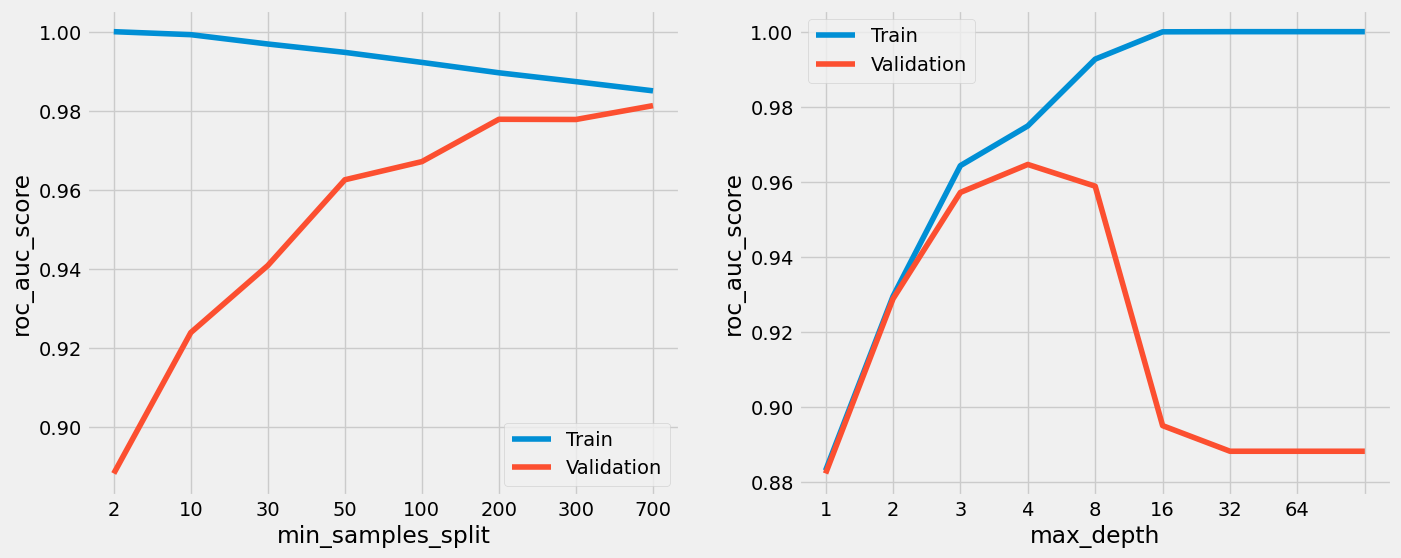

In [40]:
plot_decisionTree_roc(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)


In [37]:
def plot_decisionTree_accuracy(df, features, target, plot_accuracy = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_accuracy: boolean
    
    Return:
        fig: figures with accuracy_score curves for the DecisionTreeClassifier hyprerparameters min_samples_split and max_depth values.
        it's help to choose the best parameters to avoid overfitting. as accuracy may be not the best metric to evaluate cua our imbalanced dataset.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
    max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
    
    accuracy_minsamples_train = []
    accuracy_minsample_val = []
    accuracy_maxdepth_train = []
    accuracy_maxdepth_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_minsamples_train.append(accuracy_train)
        accuracy_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_maxdepth_train.append(accuracy_train)
        accuracy_maxdepth_val.append(accuracy_val)

    if plot_accuracy:
        fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(15,6),sharex=False, sharey=False)
        
        ax1.plot(accuracy_minsamples_train)
        ax1.plot(accuracy_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('accuracy_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(accuracy_maxdepth_train)
        ax2.plot(accuracy_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('accuracy_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
                

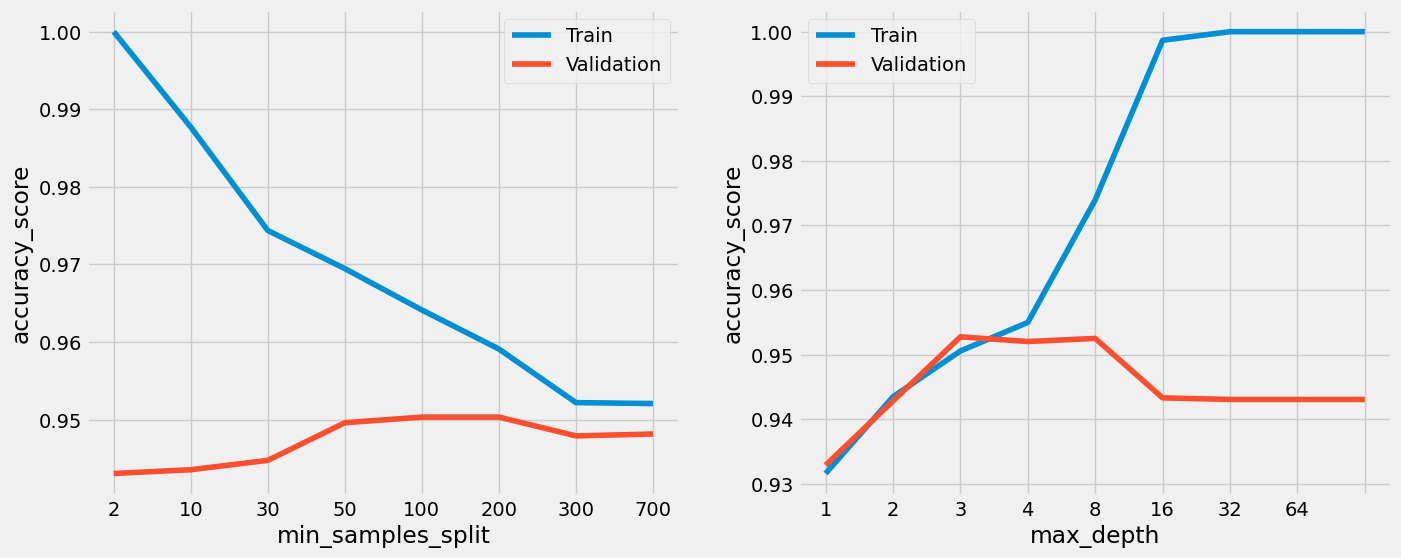

In [46]:
plot_decisionTree_accuracy(df_train, features=features_orignal, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

In [8]:
def plot_decisionTree_f1(df, features, target, plot_f1 = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_f1: boolean
    
    Return:
        fig: figures with f1_score curves for the DecisionTreeClassifier hyprerparameters min_samples_split and max_depth values.
        it's help to choose the best parameters to avoid overfitting. as accuracy may be not the best metric to evaluate cua our imbalanced dataset.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
    max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
    
    f1_minsamples_train = []
    f1_minsample_val = []
    f1_maxdepth_train = []
    f1_maxdepth_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_minsamples_train.append(accuracy_train)
        f1_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = DecisionTreeClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_maxdepth_train.append(accuracy_train)
        f1_maxdepth_val.append(accuracy_val)

    if plot_f1:
        fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(15,6),sharex=False, sharey=False)
        
        ax1.plot(f1_minsamples_train)
        ax1.plot(f1_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('f1_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(f1_maxdepth_train)
        ax2.plot(f1_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('f1_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
                

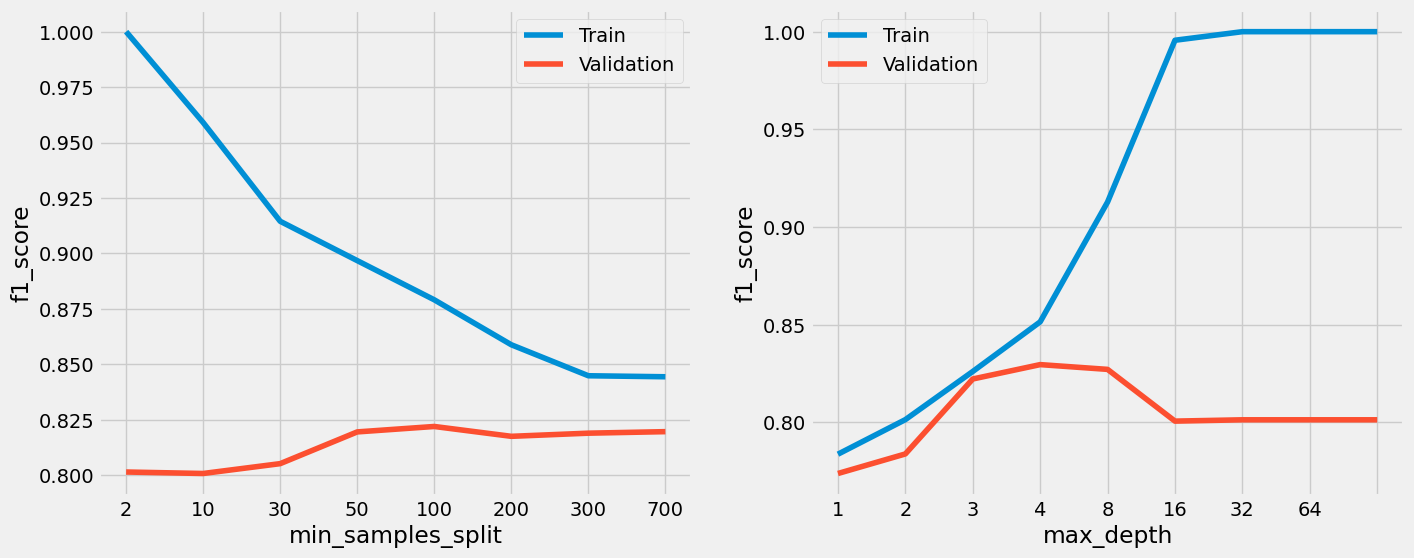

In [9]:
plot_decisionTree_f1(df_train, features=features_orignal, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

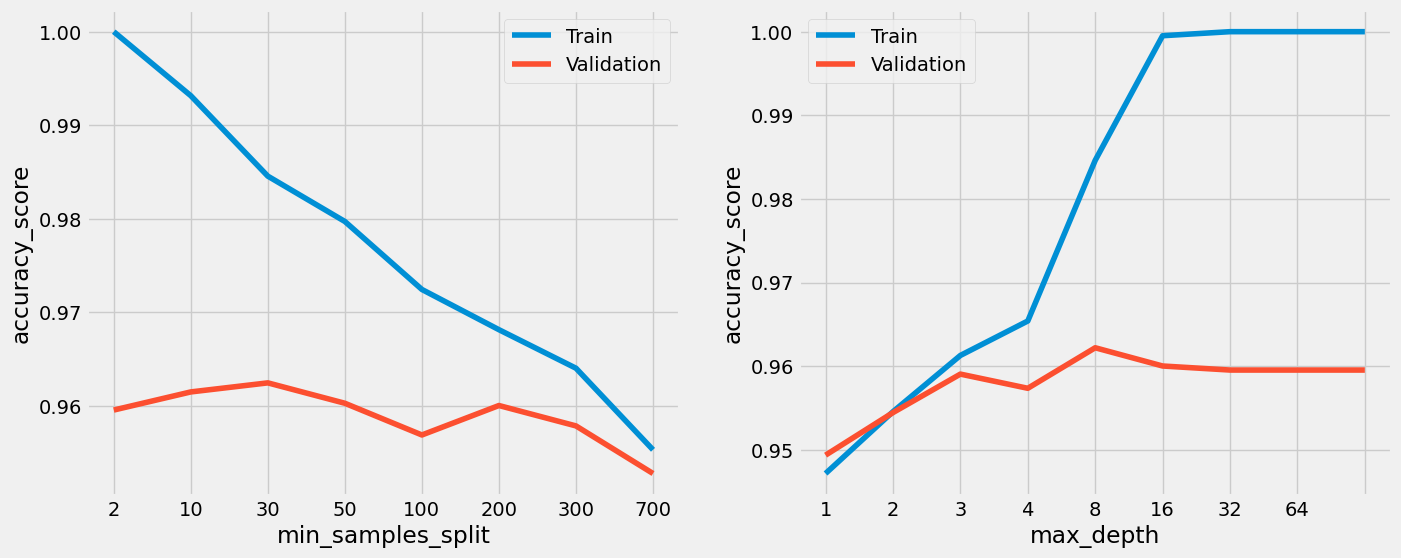

In [38]:
plot_decisionTree_accuracy(df_train, features=features_all, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

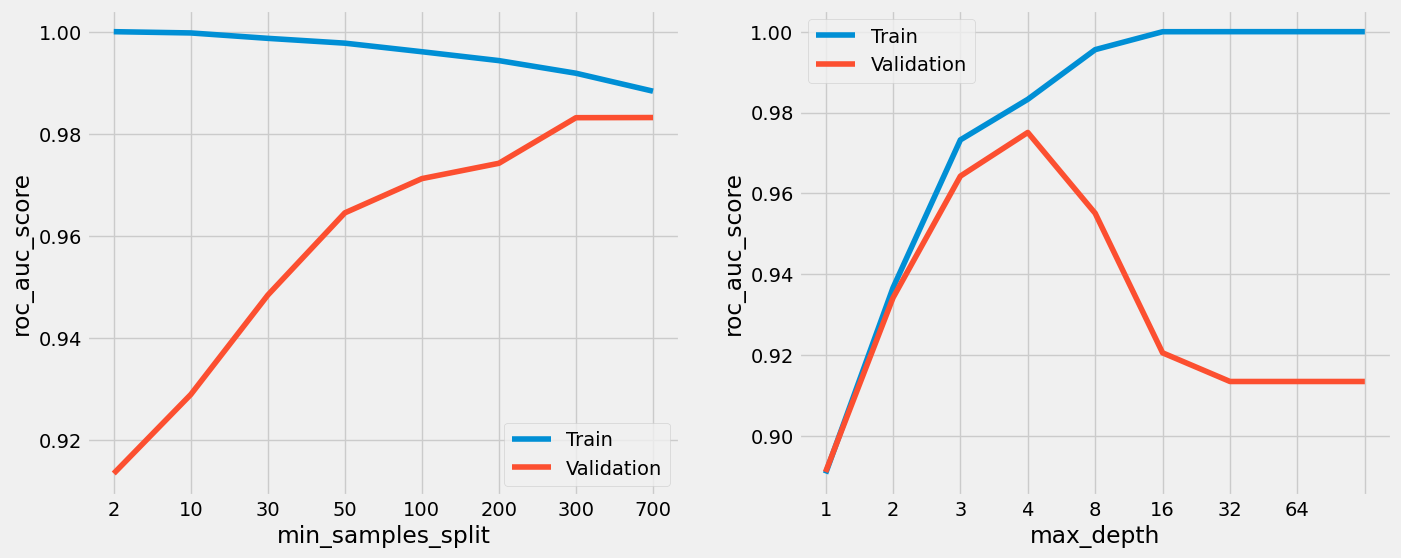

In [40]:
plot_decisionTree_roc(df_train, features=features_all, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

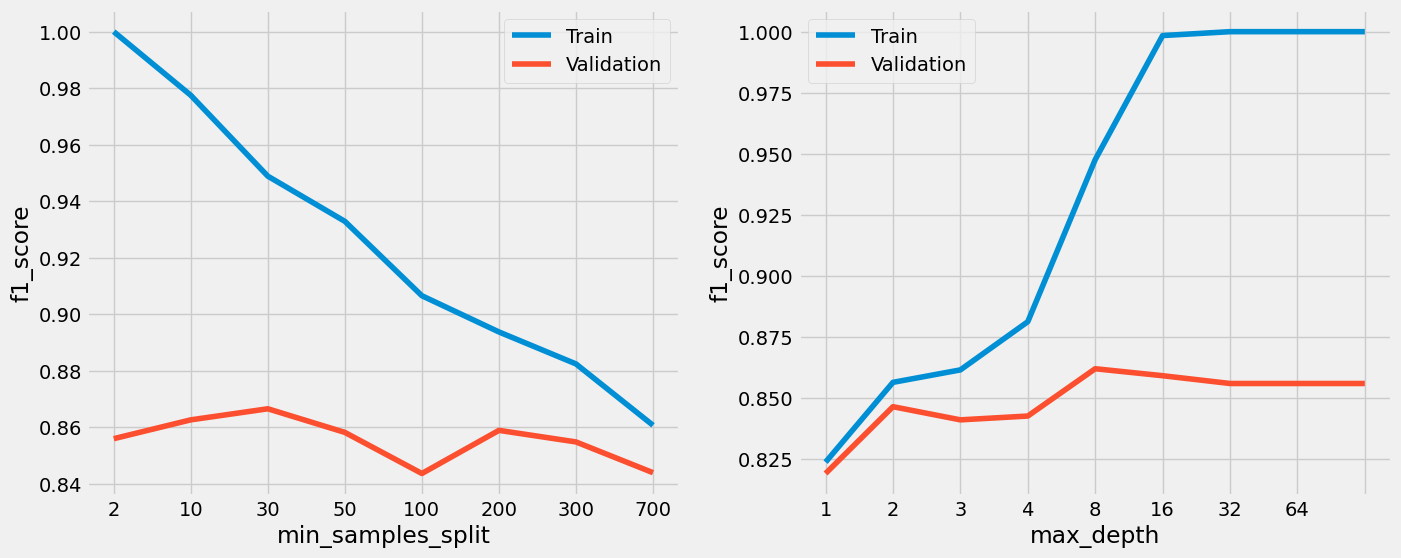

In [10]:
plot_decisionTree_f1(df_train, features=features_all, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

From plots above we can decide for original features that:
- best min_samples_split = 700
- best max_depth to avoid overfitting = 3 : 8 depths, i will use 4.

From plots above we can decide for all features that:
- best min_samples_split = 300
- best max_depth to avoid overfitting = 4.

#### RandomForestClassifier

In [41]:
def plot_randomForest_roc(df, features, target, plot_roc = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_roc: boolean
    
    Return:
        fig: figures with ROC curve fro the RandomForestClassifier hyprerparameters min_samples_split, n_estimators, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 300, 500, 700]
    max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 64, None] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    roc_minsamples_train = []
    roc_minsample_val = []
    roc_maxdepth_train = []
    roc_maxdepth_val = []
    roc_n_estimators_train = []
    roc_n_estimators_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.roc_auc_score(y_train, predictions_train)
        accuracy_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_minsamples_train.append(accuracy_train)
        roc_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train1 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val1 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train1 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.roc_auc_score(y_train, predictions_train1)
        accuracy_val1 = metrics.roc_auc_score(y_val, predictions_val1)
        roc_maxdepth_train.append(accuracy_train1)
        roc_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train2 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val2 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train2 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train2 = metrics.roc_auc_score(y_train, predictions_train2)
        accuracy_val2 = metrics.roc_auc_score(y_val, predictions_val2)
        roc_n_estimators_train.append(accuracy_train2)
        roc_n_estimators_val.append(accuracy_val2)

    

    if plot_roc:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(roc_minsamples_train)
        ax1.plot(roc_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('roc_auc_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(roc_maxdepth_train)
        ax2.plot(roc_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('roc_auc_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(roc_n_estimators_train)
        ax3.plot(roc_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('roc_auc_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


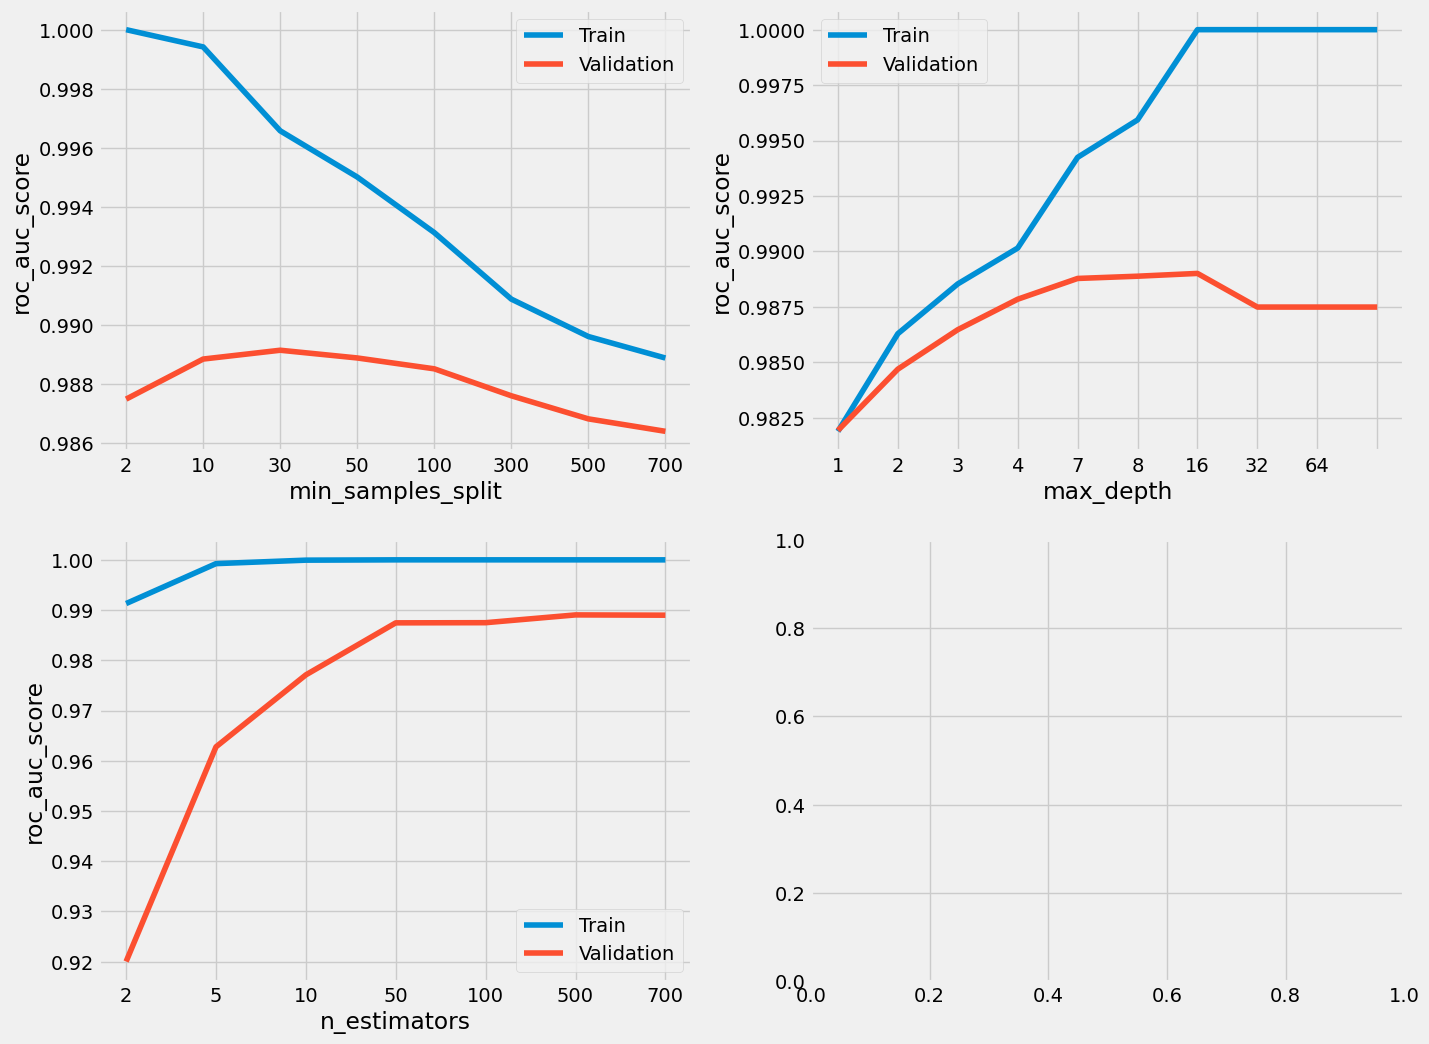

In [70]:
plot_randomForest_roc(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

In [43]:
def plot_randomForest_accuracy(df, features, target, plot_accuracy = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_accuracy: boolean
    
    Return:
        fig: figures with accuracy_score curve fro the RandomForestClassifier hyprerparameters min_samples_split, n_estimators, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 300, 500, 700]
    max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 64, None] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    accuracy_minsamples_train = []
    accuracy_minsample_val = []
    accuracy_maxdepth_train = []
    accuracy_maxdepth_val = []
    accuracy_n_estimators_train = []
    accuracy_n_estimators_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_minsamples_train.append(accuracy_train)
        accuracy_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
    
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train1 = metrics.accuracy_score(y_train, predictions_train1)
        accuracy_val1 = metrics.accuracy_score(y_val, predictions_val1)
        accuracy_maxdepth_train.append(accuracy_train1)
        accuracy_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
    
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.accuracy_score(y_train, predictions_train2)
        accuracy_val2 = metrics.accuracy_score(y_val, predictions_val2)
        accuracy_n_estimators_train.append(accuracy_train2)
        accuracy_n_estimators_val.append(accuracy_val2)
    

    if plot_accuracy:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(accuracy_minsamples_train)
        ax1.plot(accuracy_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('accuracy_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(accuracy_maxdepth_train)
        ax2.plot(accuracy_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('accuracy_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(accuracy_n_estimators_train)
        ax3.plot(accuracy_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('accuracy_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


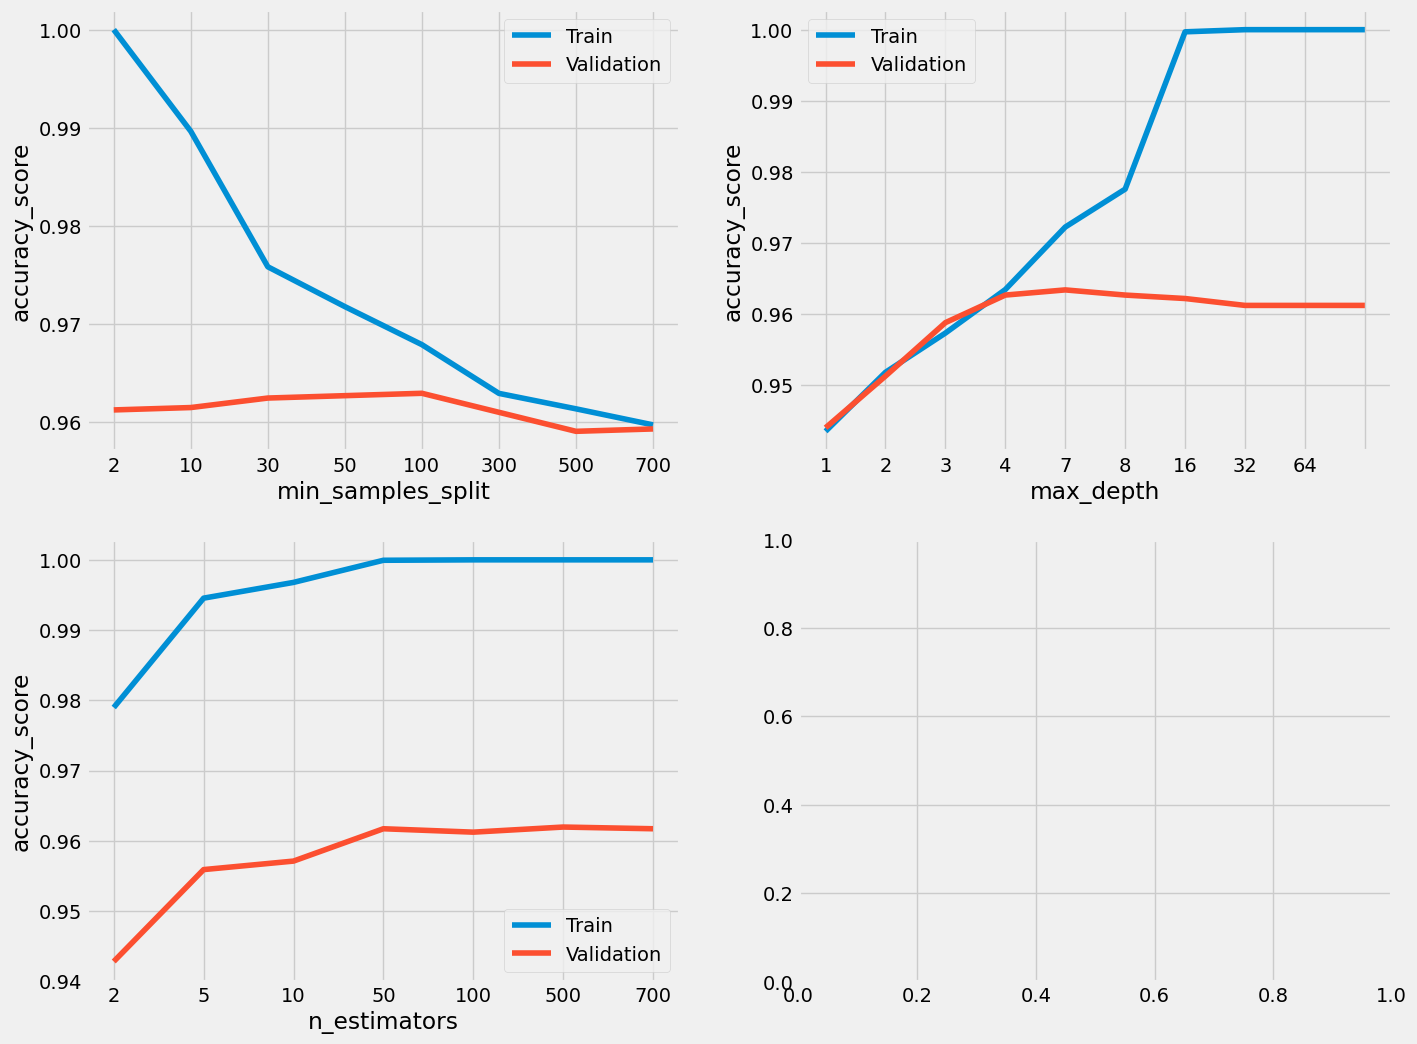

In [74]:
plot_randomForest_accuracy(df_train, features=features_orignal, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

In [11]:
def plot_randomForest_f1(df, features, target, plot_f1 = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_f1: boolean
    
    Return:
        fig: figures with f1_score curve fro the RandomForestClassifier hyprerparameters min_samples_split, n_estimators, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    min_samples_split_list = [2,10, 30, 50, 100, 300, 500, 700]
    max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 64, None] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    f1_minsamples_train = []
    f1_minsample_val = []
    f1_maxdepth_train = []
    f1_maxdepth_val = []
    f1_n_estimators_train = []
    f1_n_estimators_val = []
    

    for min_samples_split in min_samples_split_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(min_samples_split=min_samples_split,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_minsamples_train.append(accuracy_train)
        f1_minsample_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
    
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train1 = metrics.f1_score(y_train, predictions_train1)
        accuracy_val1 = metrics.f1_score(y_val, predictions_val1)
        f1_maxdepth_train.append(accuracy_train1)
        f1_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = RandomForestClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
    
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.f1_score(y_train, predictions_train2)
        accuracy_val2 = metrics.f1_score(y_val, predictions_val2)
        f1_n_estimators_train.append(accuracy_train2)
        f1_n_estimators_val.append(accuracy_val2)
    

    if plot_f1:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(f1_minsamples_train)
        ax1.plot(f1_minsample_val)
        ax1.set_xlabel("min_samples_split")
        ax1.set_ylabel('f1_score')
        ax1.set_xticks(range(len(min_samples_split_list)),labels=min_samples_split_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(f1_maxdepth_train)
        ax2.plot(f1_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('f1_score')
        ax2.set_xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(f1_n_estimators_train)
        ax3.plot(f1_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('f1_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


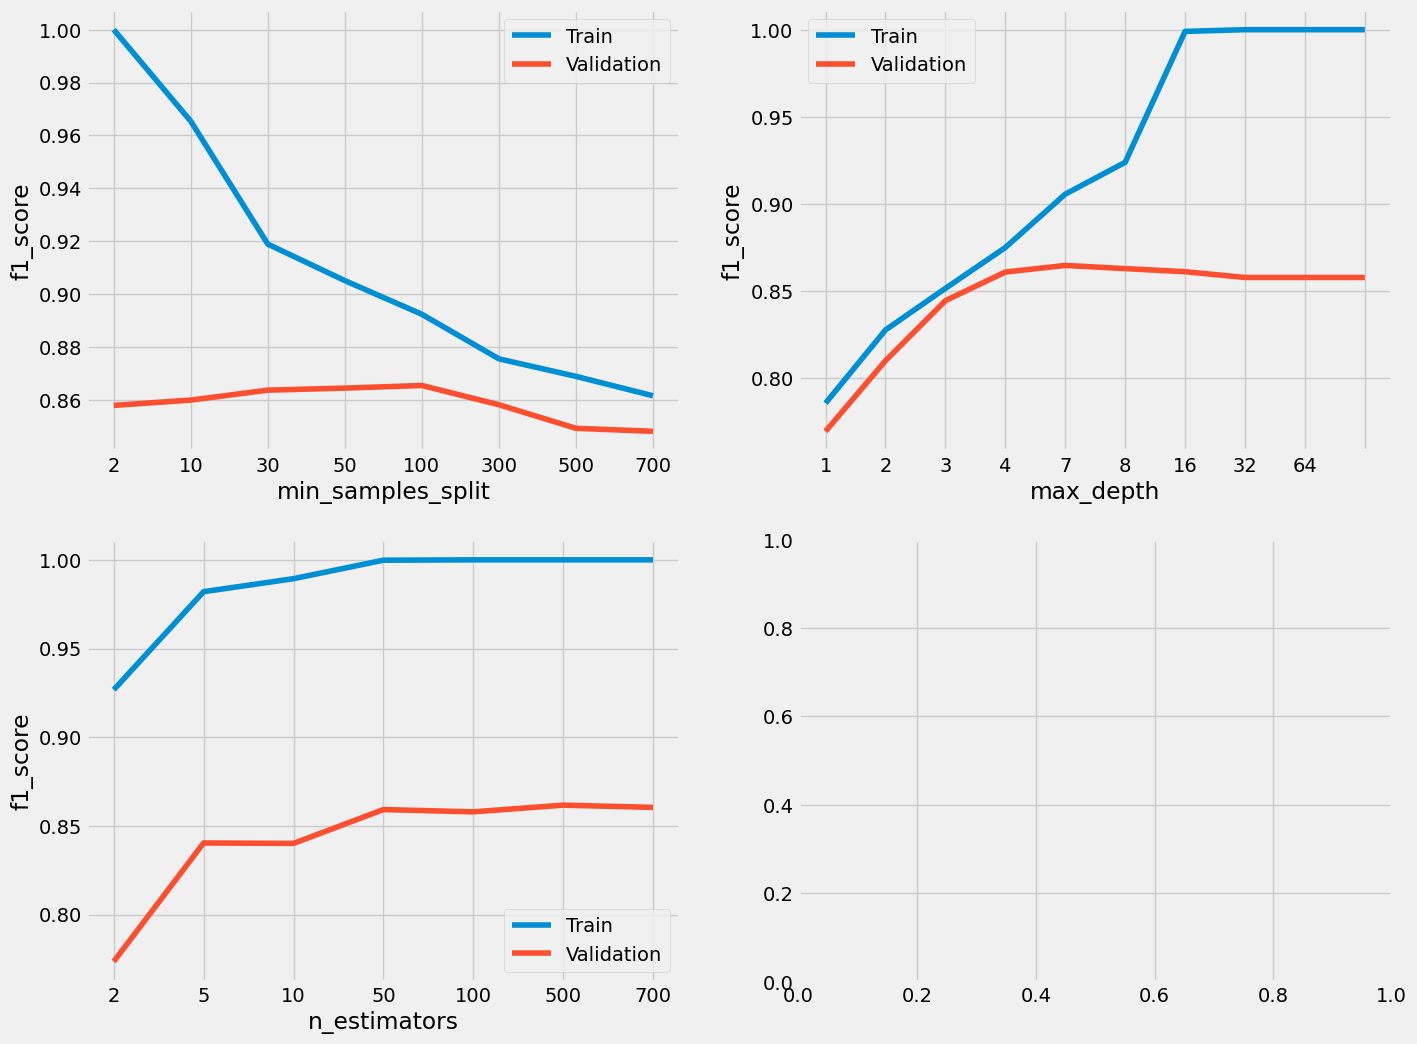

In [12]:
plot_randomForest_f1(df_train, features=features_orignal, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

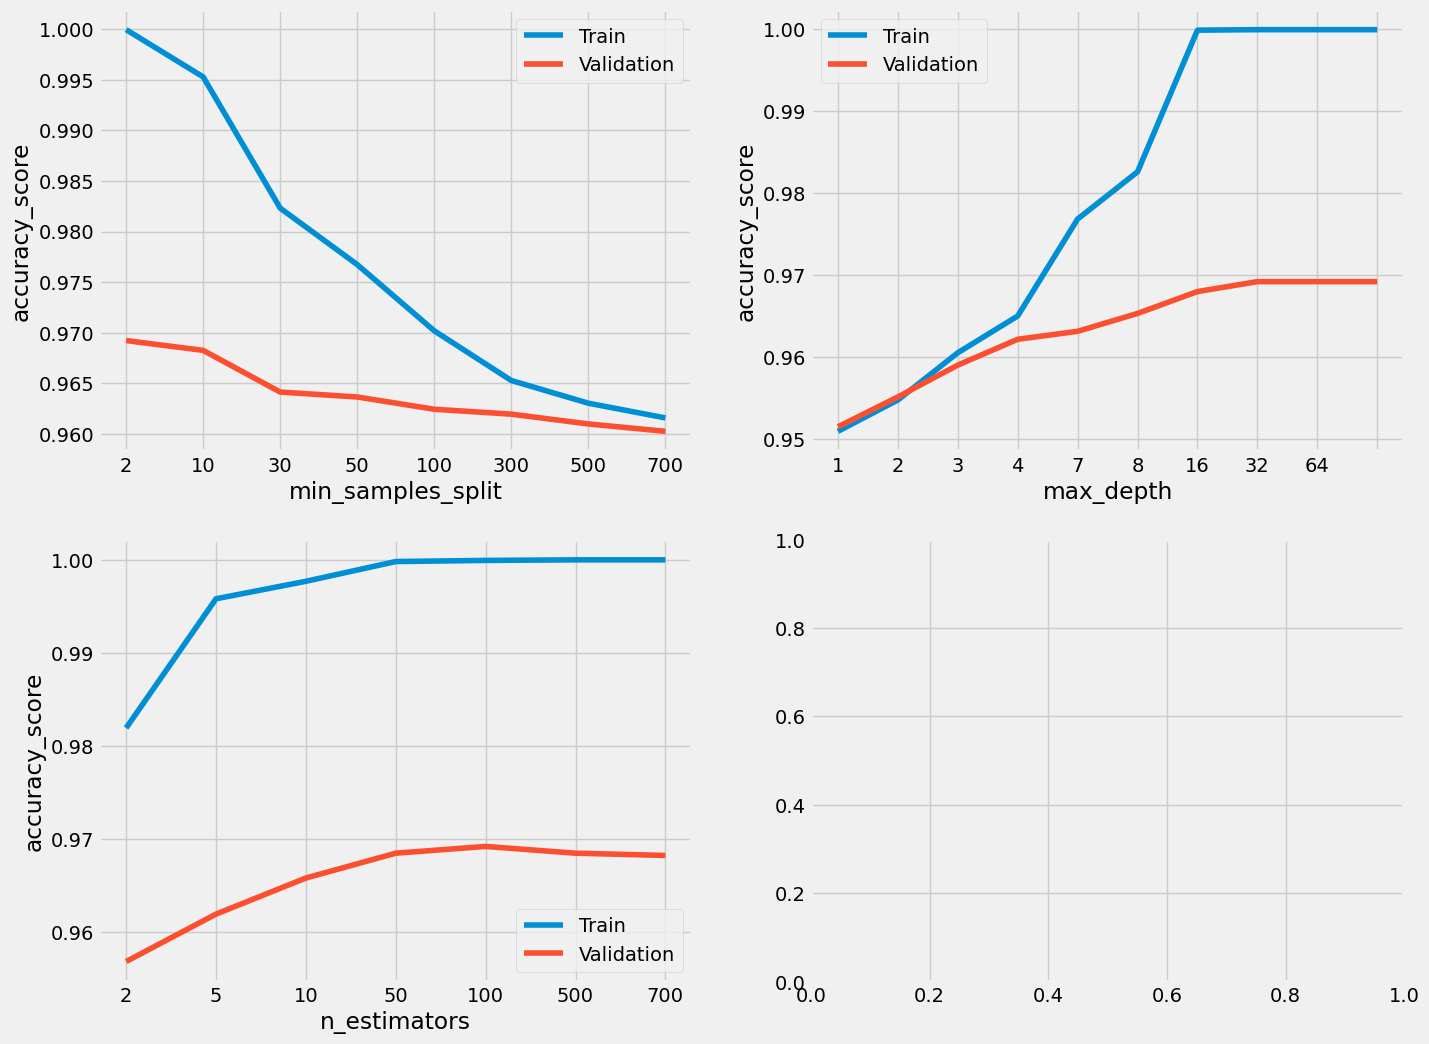

In [44]:
plot_randomForest_accuracy(df_train, features=features_all, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

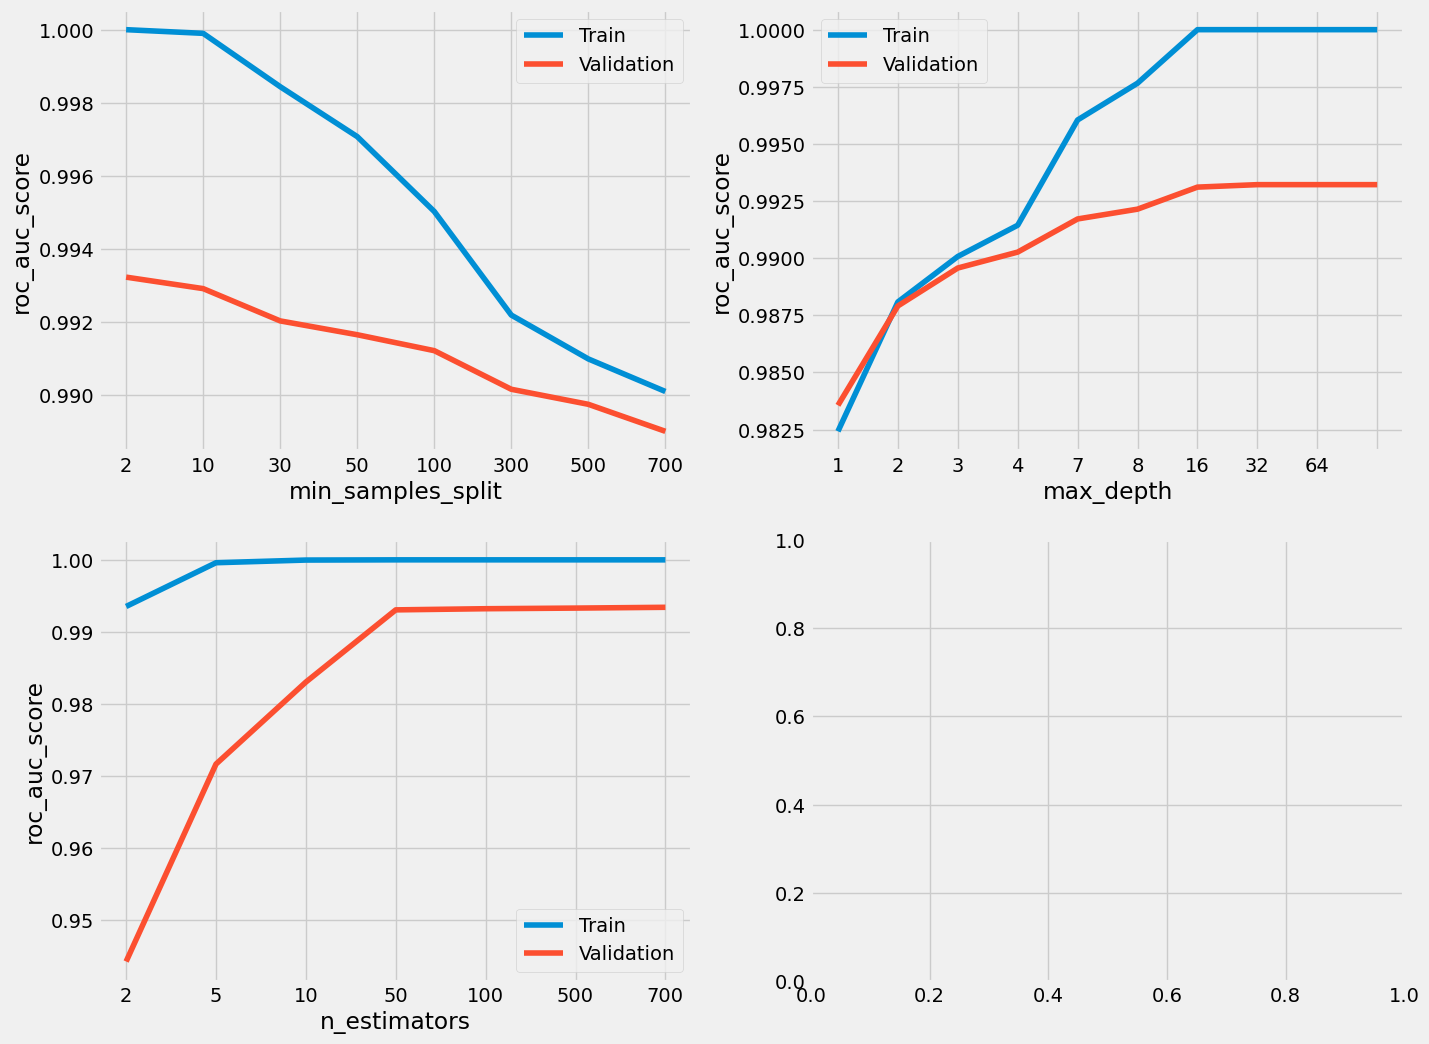

In [45]:
plot_randomForest_roc(df_train, features=features_all, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

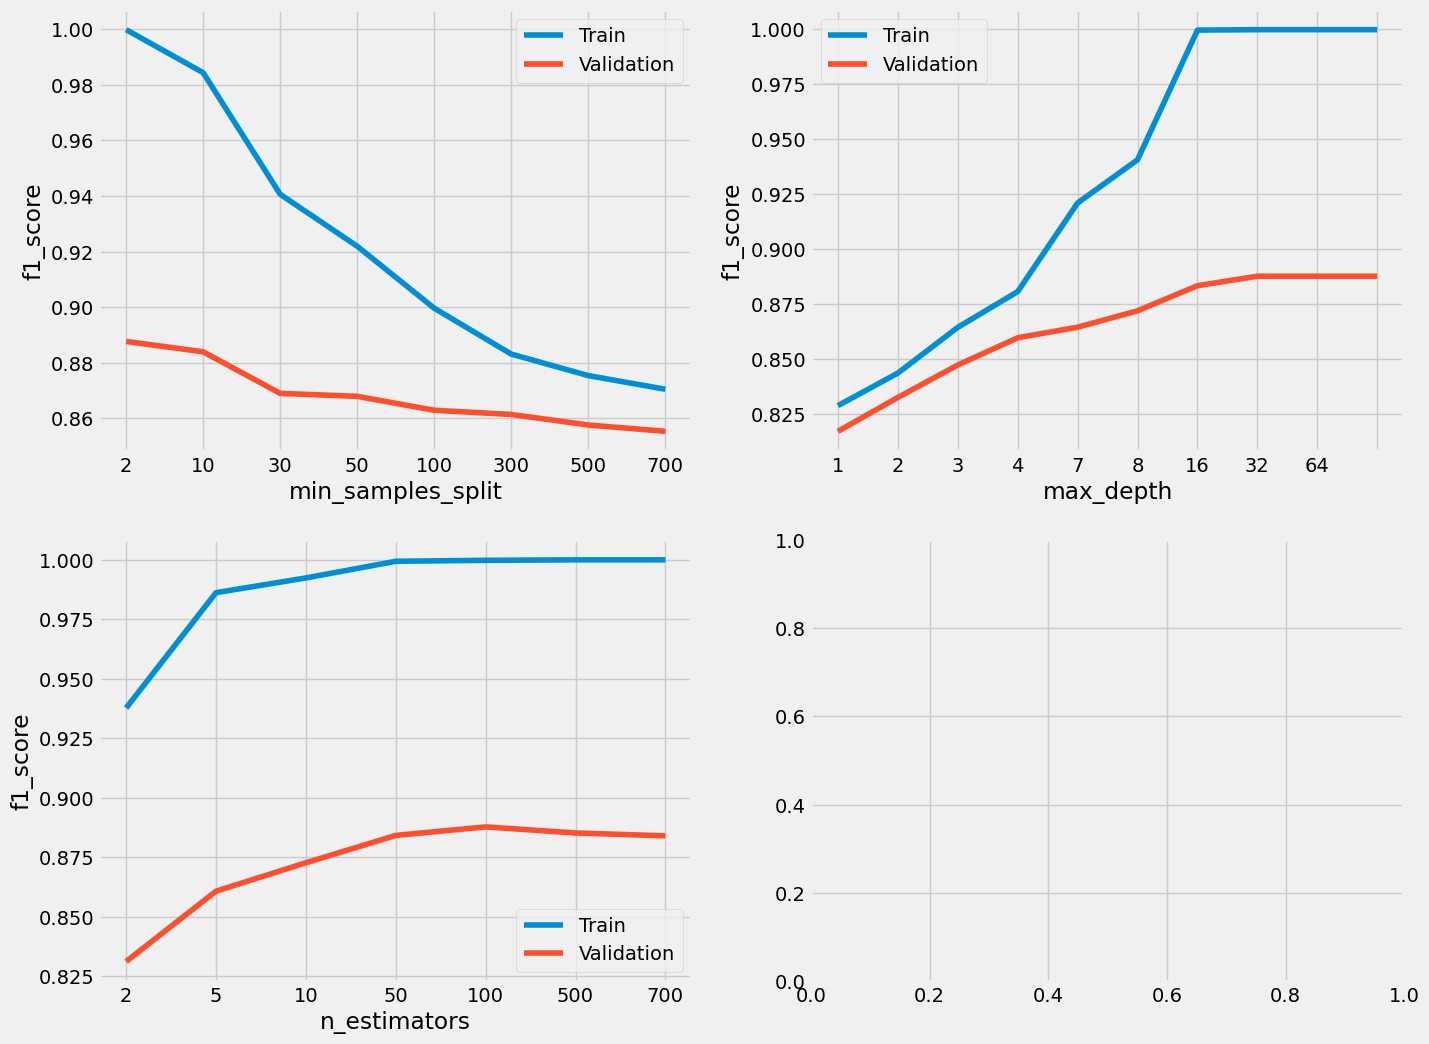

In [13]:
plot_randomForest_f1(df_train, features=features_all, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

We see from above that the best parameters for original features are:
- min_samples_split = 30
- max_depth = 8
- n_estimators = 500

We see from above that the best parameters for all features are:
- min_samples_split = 5
- max_depth = 16
- n_estimators = 100

#### KNeighborsClassifier

In [46]:
def plot_KNN_accuracy(df, features, target, plot_accuracy = True, RANDOM_STATE = 42):
    """
    Args:
        df (dataframe): train dataframe
        features (list): list of features
        target (str): target variable
        plot_accuracy (bool): plot accuracy curve
        RANDOM_STATE (int): random state
        
    Return:
        accuracy_score plot for train and validation for n_neighbors values from 1 to 21 ti help in finding best n_neighbors.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)
    
    accuracy_n_neighbors_train = []
    accuracy_n_neighbors_val = []
    
    for n_neighbors in range(1,22):
        model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)

        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_n_neighbors_train.append(accuracy_train)
        accuracy_n_neighbors_val.append(accuracy_val)    
    
    if plot_accuracy:
        fig, ax = plt.subplots(figsize=(15,6))
        ax.plot(accuracy_n_neighbors_train)
        ax.plot(accuracy_n_neighbors_val)
        ax.set_xlabel("n_neighbors")
        ax.set_ylabel('accuracy_score')
        ax.set_xticks(range(len(range(1,22))),labels=range(1,22))
        ax.legend(['Train','Validation'])

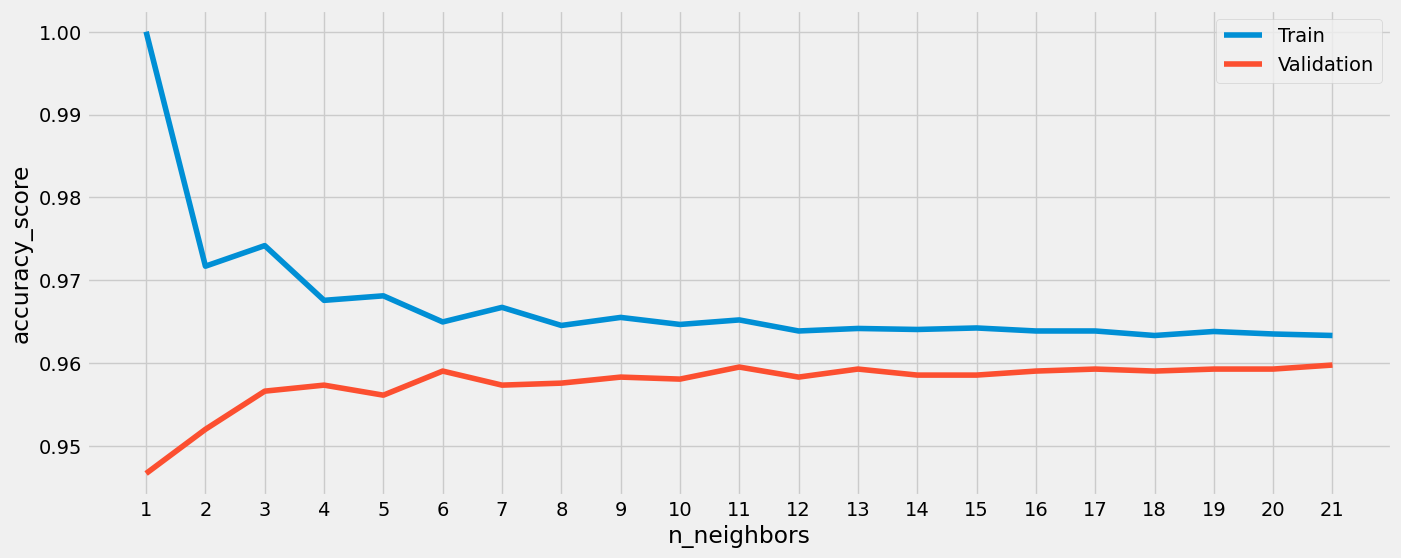

In [14]:
plot_KNN_accuracy(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

In [47]:
def plot_KNN_roc(df, features, target, plot_roc = True, RANDOM_STATE = 42):
    """
    Args:
        df (dataframe): train dataframe
        features (list): list of features
        target (str): target variable
        plot_roc (bool): plot roc curve
        RANDOM_STATE (int): random state
        
    Return:
        roc curve plot for train and validation for n_neighbors values from 1 to 50 ti help in finding best n_neighbors.  

    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)
    
    roc_n_neighbors_train = []
    roc_n_neighbors_val = []
    
    n_neighbors_list = [1,10,30,50,70,100]
    
    for n_neighbors in n_neighbors_list:
        model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train_scaled,y_train)        

        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1]
            predictions_val = model.predict_proba(X_val_scaled)[:,1]
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled)
            predictions_val = model.decision_function(X_val_scaled)
        else:
            predictions_train = model.predict(X_train_scaled)
            predictions_val = model.predict(X_val_scaled)
            
        
        roc_train = metrics.roc_auc_score(y_train, predictions_train)
        roc_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_n_neighbors_train.append(roc_train)
        roc_n_neighbors_val.append(roc_val)    
    
    if plot_roc:
        fig, ax = plt.subplots(figsize=(15,6))
        ax.plot(roc_n_neighbors_train)
        ax.plot(roc_n_neighbors_val)
        ax.set_xlabel("n_neighbors")
        ax.set_ylabel('roc_auc_score')
        ax.set_xticks(range(len(n_neighbors_list)),labels=n_neighbors_list)
        ax.legend(['Train','Validation'])

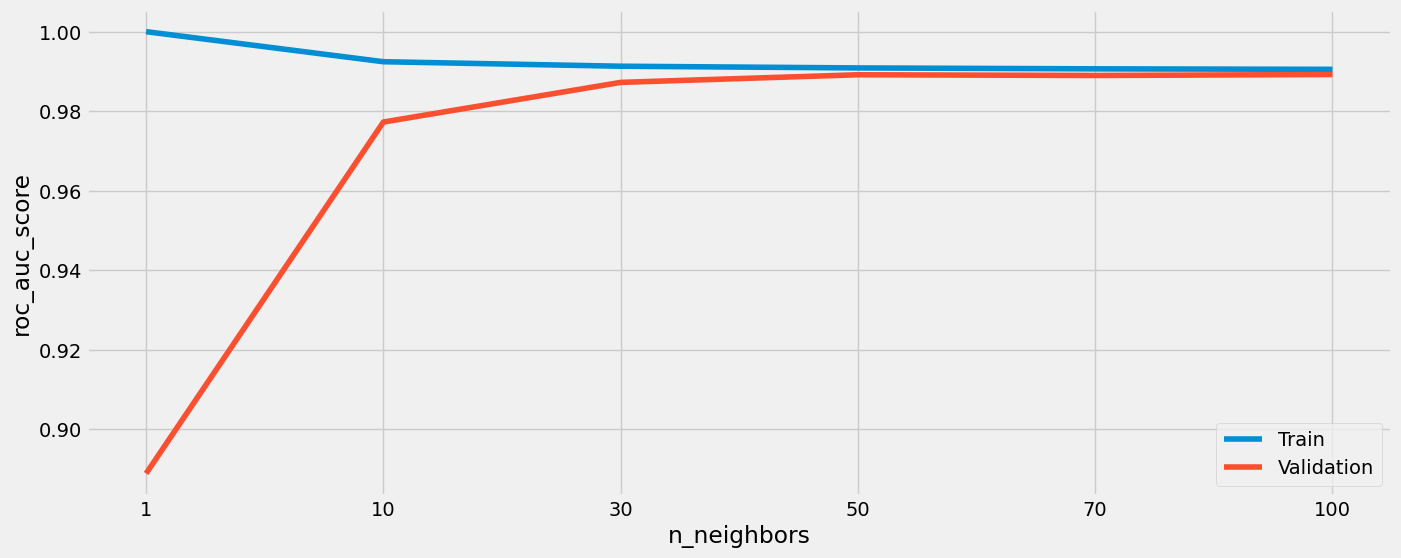

In [29]:
plot_KNN_roc(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

In [16]:
def plot_KNN_f1(df, features, target, plot_f1 = True, RANDOM_STATE = 42):
    """
    Args:
        df (dataframe): train dataframe
        features (list): list of features
        target (str): target variable
        plot_f1 (bool): plot accuracy curve
        RANDOM_STATE (int): random state
        
    Return:
        f1_score plot for train and validation for n_neighbors values from 1 to 50 to help in finding best n_neighbors.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)
    
    f1_n_neighbors_train = []
    f1_n_neighbors_val = []
    
    for n_neighbors in range(1,51):
        model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled)
        predictions_val = model.predict(X_val_scaled)

        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_n_neighbors_train.append(accuracy_train)
        f1_n_neighbors_val.append(accuracy_val)    
    
    if plot_f1:
        fig, ax = plt.subplots(figsize=(15,6))
        ax.plot(f1_n_neighbors_train)
        ax.plot(f1_n_neighbors_val)
        ax.set_xlabel("n_neighbors")
        ax.set_ylabel('f1_score')
        ax.set_xticks(range(len(range(1,51))),labels=range(1,51))
        ax.legend(['Train','Validation'])

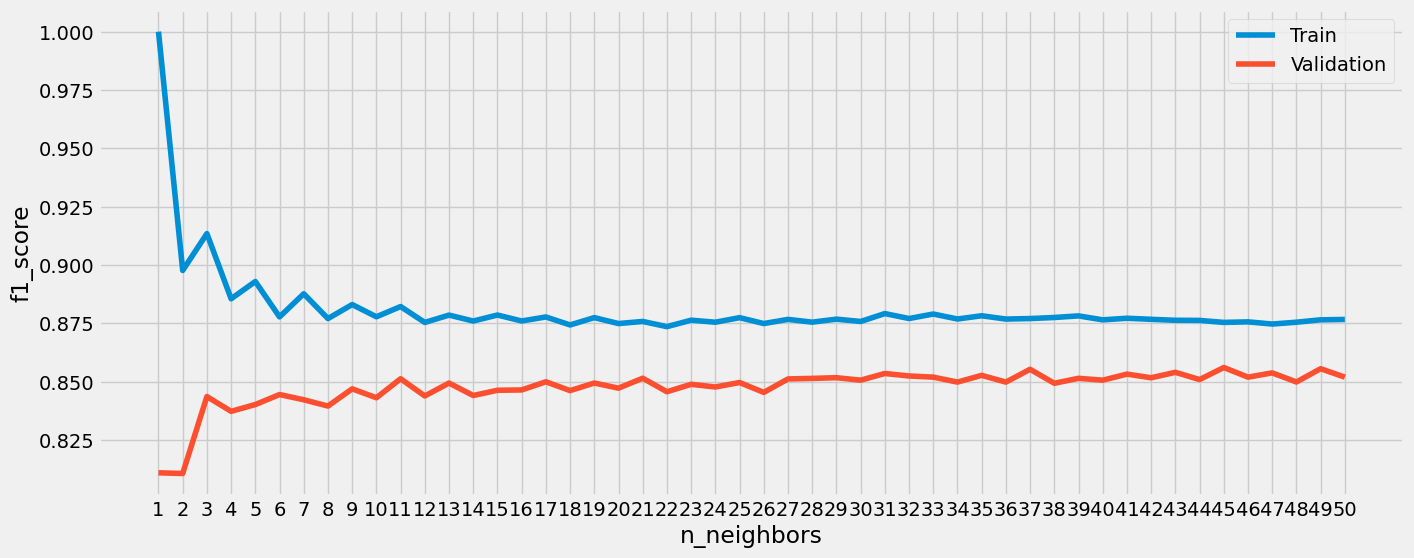

In [17]:
plot_KNN_f1(df_train, features=features_orignal, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

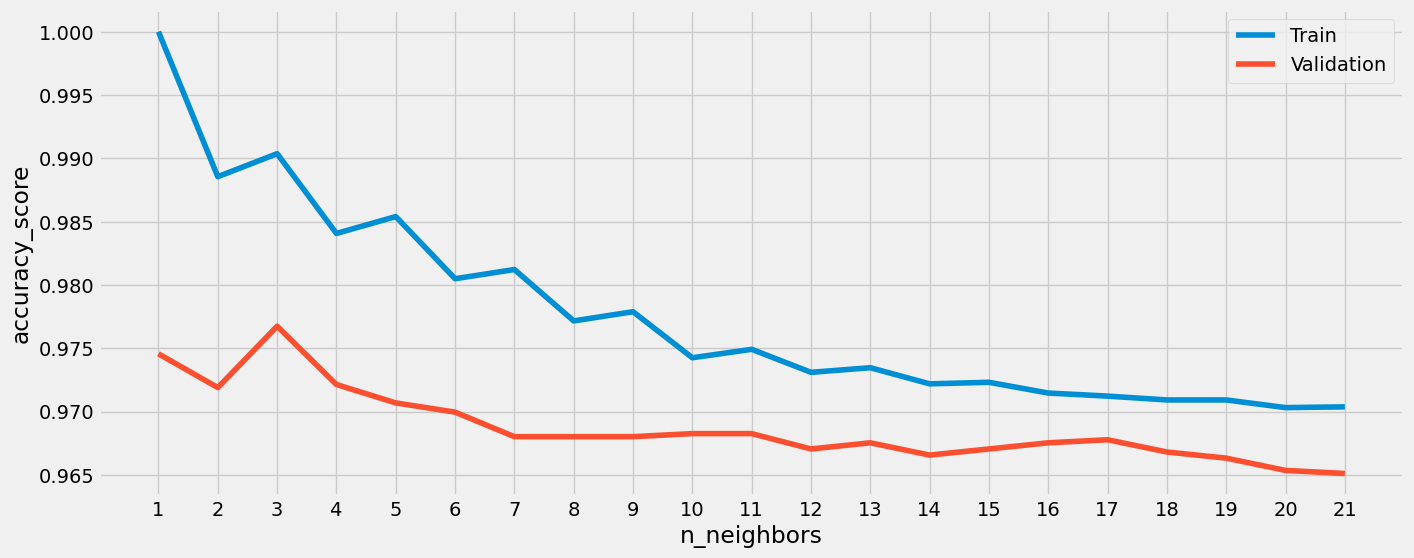

In [48]:
plot_KNN_accuracy(df_train, features=features_all, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

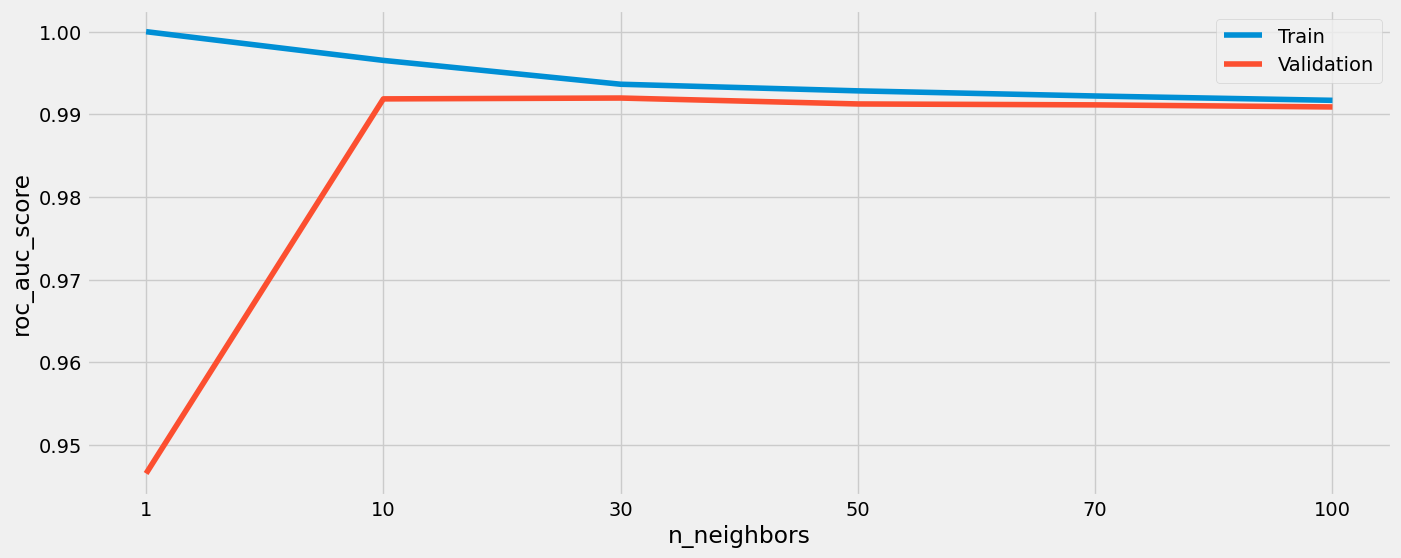

In [49]:
plot_KNN_roc(df_train, features=features_all, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

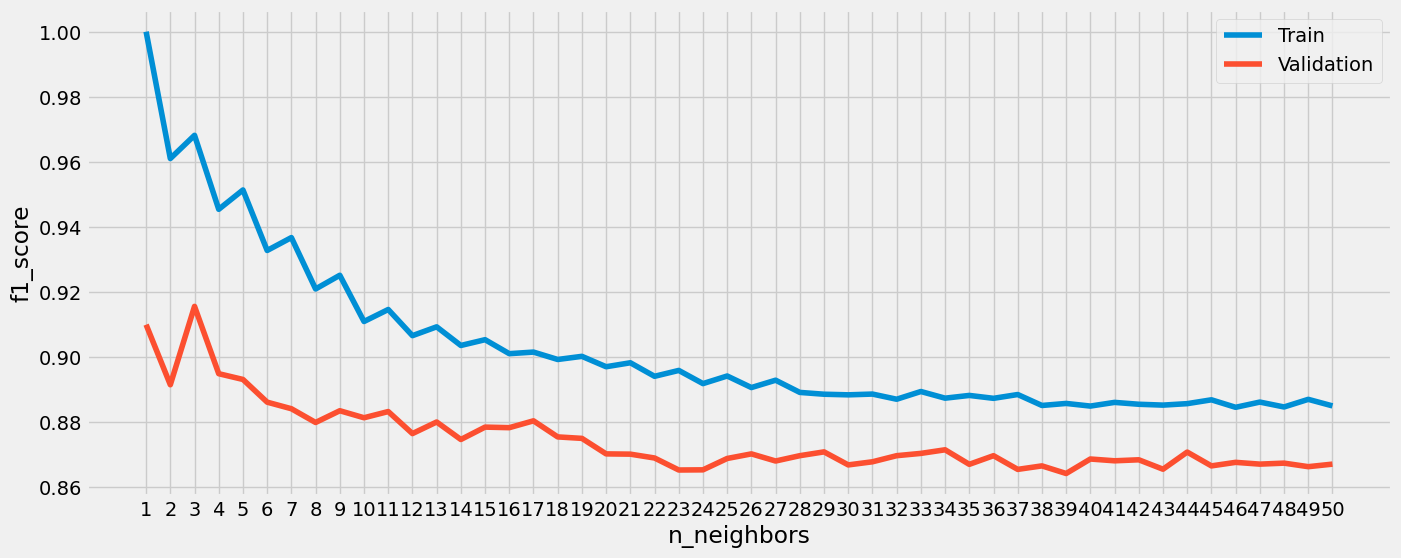

In [18]:
plot_KNN_f1(df_train, features=features_all, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

**From above best n_neighbors for original features is 50.**

**From above best n_neighbors for all features is 10.**

#### GaussianNB

In [19]:
NG_clf = GaussianNB()

X_train, X_val, y_train, y_val = split_data(df_train, features=features_orignal, target='bnc_label', print_shapes=True)
X_train_scaled, X_val_scaled = scale_data(X_train, X_val)

NG_clf.fit(X_train_scaled, y_train)

y_pred_train = NG_clf.predict(X_train_scaled)
y_pred_val = NG_clf.predict(X_val_scaled)
y_pred_train_proba = NG_clf.predict_proba(X_train_scaled)[:,1]
y_pred_val_proba = NG_clf.predict_proba(X_val_scaled)[:,1]


print(f"Accuracy on train dataset: {metrics.accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on validation dataset: {metrics.accuracy_score(y_val, y_pred_val)}")
print(f"ROC AUC on train dataset: {metrics.roc_auc_score(y_train, y_pred_train_proba)}")
print(f"ROC AUC on validation dataset: {metrics.roc_auc_score(y_val, y_pred_val_proba)}")
print(f"F1 score on train dataset: {metrics.f1_score(y_train, y_pred_train)}")
print(f"F1 score on validation dataset: {metrics.f1_score(y_val, y_pred_val)}")

X_train shape: (16504, 24)
X_val shape: (4127, 24)
y_train shape: (16504,)
y_val shape: (4127,)
Accuracy on train dataset: 0.8679108095007271
Accuracy on validation dataset: 0.8776350860189
ROC AUC on train dataset: 0.9892056722023375
ROC AUC on validation dataset: 0.9886639775903866
F1 score on train dataset: 0.696463380673907
F1 score on validation dataset: 0.6963319302465424


In [20]:
NG_clf = GaussianNB()

X_train, X_val, y_train, y_val = split_data(df_train, features=features_all, target='bnc_label', print_shapes=True)
X_train_scaled, X_val_scaled = scale_data(X_train, X_val)

NG_clf.fit(X_train_scaled, y_train)

y_pred_train = NG_clf.predict(X_train_scaled)
y_pred_val = NG_clf.predict(X_val_scaled)
y_pred_train_proba = NG_clf.predict_proba(X_train_scaled)[:,1]
y_pred_val_proba = NG_clf.predict_proba(X_val_scaled)[:,1]


print(f"Accuracy on train dataset: {metrics.accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy on validation dataset: {metrics.accuracy_score(y_val, y_pred_val)}")
print(f"ROC AUC on train dataset: {metrics.roc_auc_score(y_train, y_pred_train_proba)}")
print(f"ROC AUC on validation dataset: {metrics.roc_auc_score(y_val, y_pred_val_proba)}")
print(f"F1 score on train dataset: {metrics.f1_score(y_train, y_pred_train)}")
print(f"F1 score on validation dataset: {metrics.f1_score(y_val, y_pred_val)}")

X_train shape: (16504, 66)
X_val shape: (4127, 66)
y_train shape: (16504,)
y_val shape: (4127,)
Accuracy on train dataset: 0.8523388269510421
Accuracy on validation dataset: 0.860673612793797
ROC AUC on train dataset: 0.9607840532630059
ROC AUC on validation dataset: 0.9622296908045578
F1 score on train dataset: 0.6735432016075016
F1 score on validation dataset: 0.6693502012650948


#### LightGBM

In [52]:
def plot_LightGBM_roc(df, features, target, plot_roc = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_roc: boolean
    
    Return:
        fig: figures with ROC curve fro the LGBMClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    roc_lreate_train = []
    roc_lreate_val = []
    roc_maxdepth_train = []
    roc_maxdepth_val = []
    roc_n_estimators_train = []
    roc_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.roc_auc_score(y_train, predictions_train)
        accuracy_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_lreate_train.append(accuracy_train)
        roc_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train1 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val1 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train1 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.roc_auc_score(y_train, predictions_train1)
        accuracy_val1 = metrics.roc_auc_score(y_val, predictions_val1)
        roc_maxdepth_train.append(accuracy_train1)
        roc_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train2 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val2 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train2 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train2 = metrics.roc_auc_score(y_train, predictions_train2)
        accuracy_val2 = metrics.roc_auc_score(y_val, predictions_val2)
        roc_n_estimators_train.append(accuracy_train2)
        roc_n_estimators_val.append(accuracy_val2)

    
    
    if plot_roc:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(roc_lreate_train)
        ax1.plot(roc_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('roc_auc_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(roc_maxdepth_train)
        ax2.plot(roc_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('roc_auc_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(roc_n_estimators_train)
        ax3.plot(roc_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('roc_auc_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


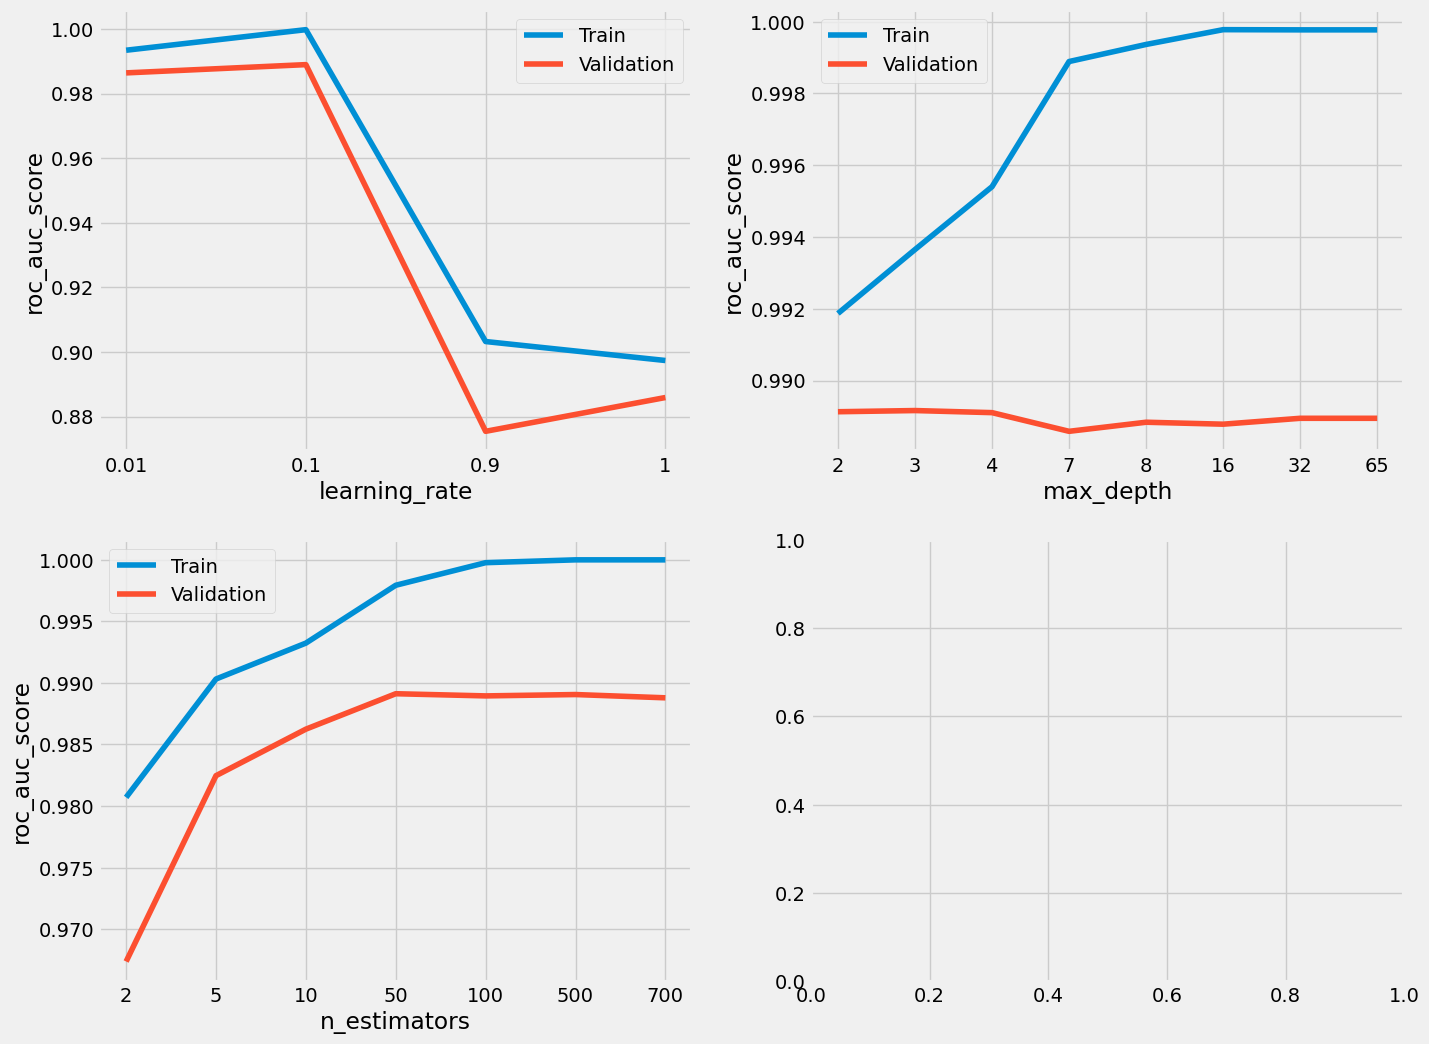

In [40]:
plot_LightGBM_roc(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

In [53]:
def plot_LightGBM_accuracy(df, features, target, plot_accuracy = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_accuracy: boolean
    
    Return:
        fig: figures with accuracy_score curve for the LGBMClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    accuracy_lreate_train = []
    accuracy_lreate_val = []
    accuracy_maxdepth_train = []
    accuracy_maxdepth_val = []
    accuracy_n_estimators_train = []
    accuracy_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset

        
        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_lreate_train.append(accuracy_train)
        accuracy_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.accuracy_score(y_train, predictions_train1)
        accuracy_val1 = metrics.accuracy_score(y_val, predictions_val1)
        accuracy_maxdepth_train.append(accuracy_train1)
        accuracy_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.accuracy_score(y_train, predictions_train2)
        accuracy_val2 = metrics.accuracy_score(y_val, predictions_val2)
        accuracy_n_estimators_train.append(accuracy_train2)
        accuracy_n_estimators_val.append(accuracy_val2)

    
    if plot_accuracy:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(accuracy_lreate_train)
        ax1.plot(accuracy_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('accuracy_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(accuracy_maxdepth_train)
        ax2.plot(accuracy_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('accuracy_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(accuracy_n_estimators_train)
        ax3.plot(accuracy_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('accuracy_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


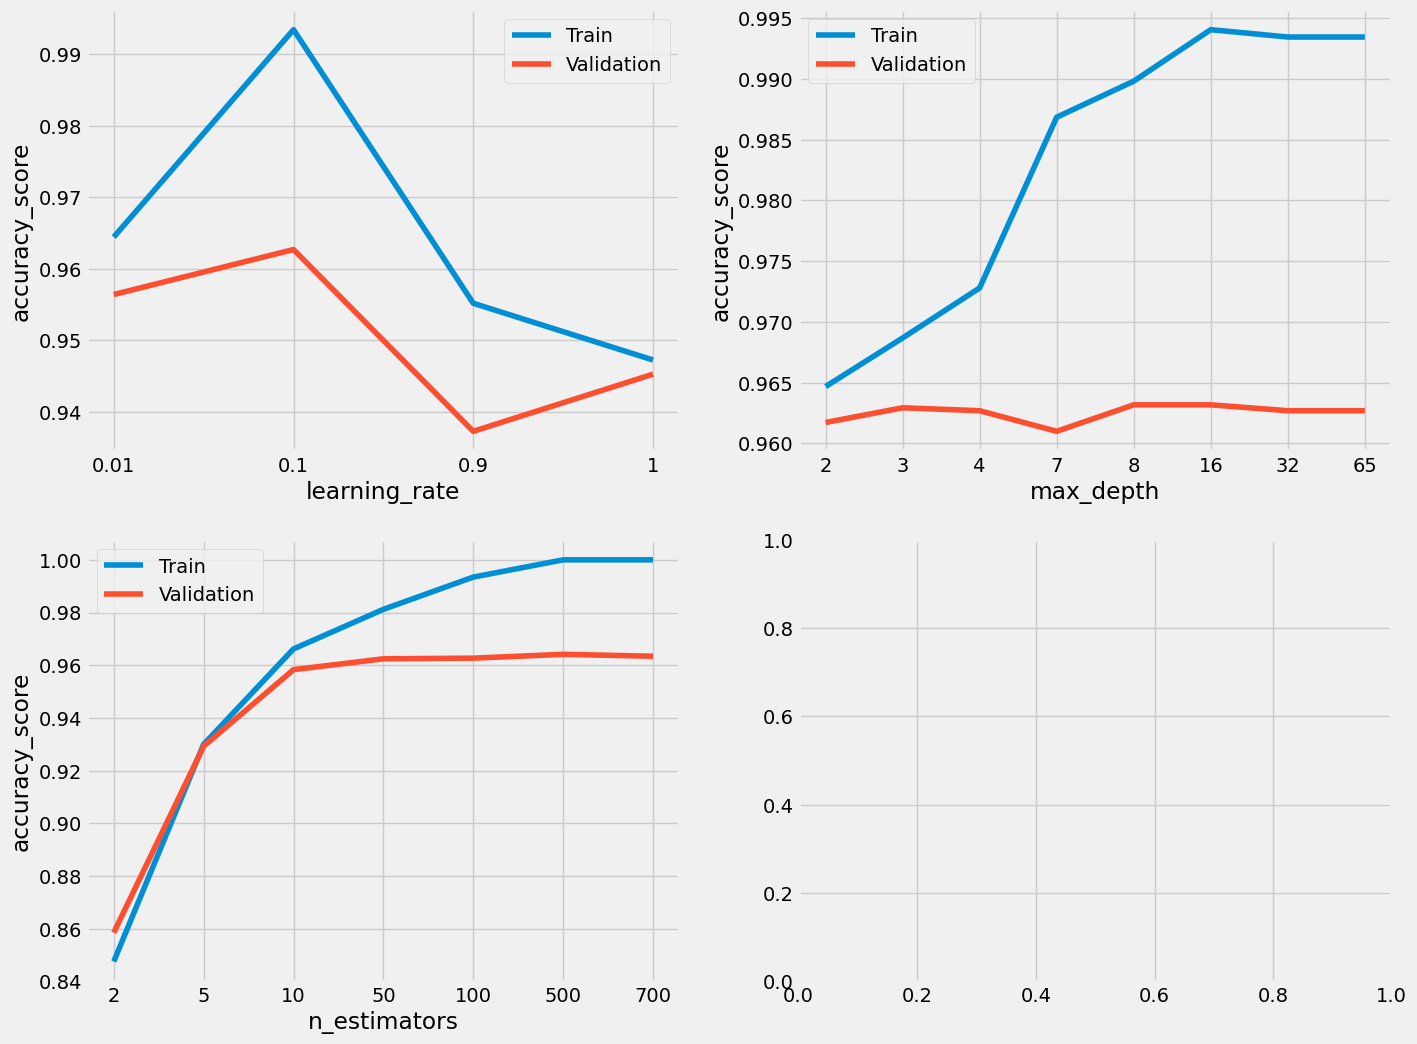

In [46]:
plot_LightGBM_accuracy(df_train, features=features_orignal, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

In [21]:
def plot_LightGBM_f1(df, features, target, plot_f1 = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_f1: boolean
    
    Return:
        fig: figures with f1_score curve for the LGBMClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    f1_lreate_train = []
    f1_lreate_val = []
    f1_maxdepth_train = []
    f1_maxdepth_val = []
    f1_n_estimators_train = []
    f1_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset

        
        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_lreate_train.append(accuracy_train)
        f1_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.f1_score(y_train, predictions_train1)
        accuracy_val1 = metrics.f1_score(y_val, predictions_val1)
        f1_maxdepth_train.append(accuracy_train1)
        f1_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = LGBMClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.f1_score(y_train, predictions_train2)
        accuracy_val2 = metrics.f1_score(y_val, predictions_val2)
        f1_n_estimators_train.append(accuracy_train2)
        f1_n_estimators_val.append(accuracy_val2)

    
    if plot_f1:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(f1_lreate_train)
        ax1.plot(f1_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('f1_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(f1_maxdepth_train)
        ax2.plot(f1_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('f1_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(f1_n_estimators_train)
        ax3.plot(f1_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('f1_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


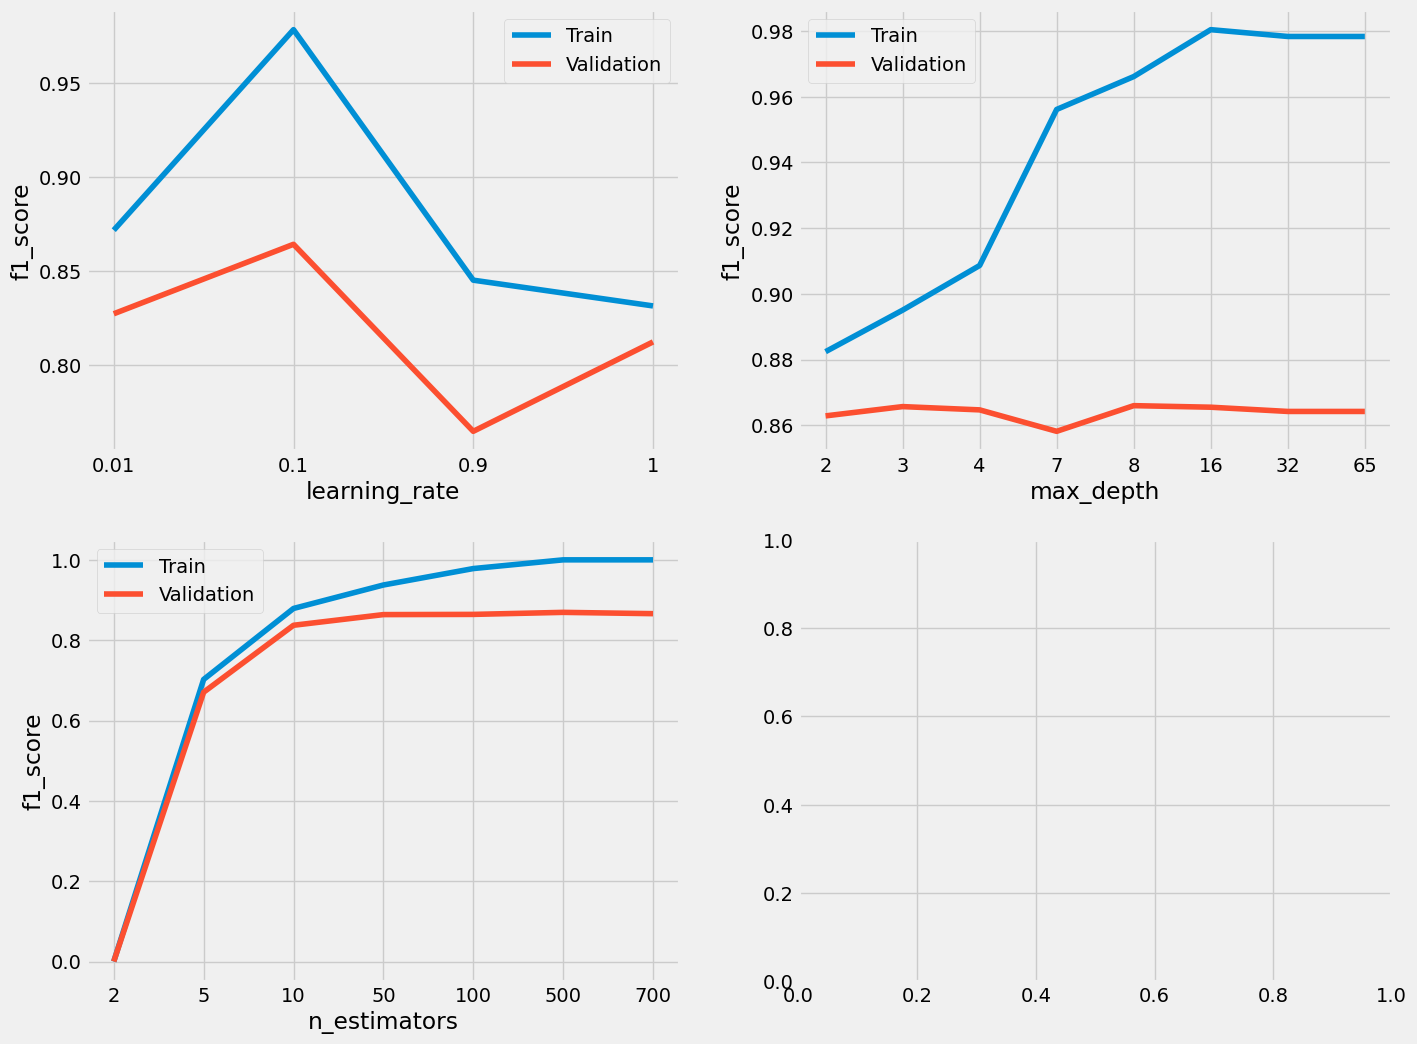

In [22]:
plot_LightGBM_f1(df_train, features=features_orignal, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

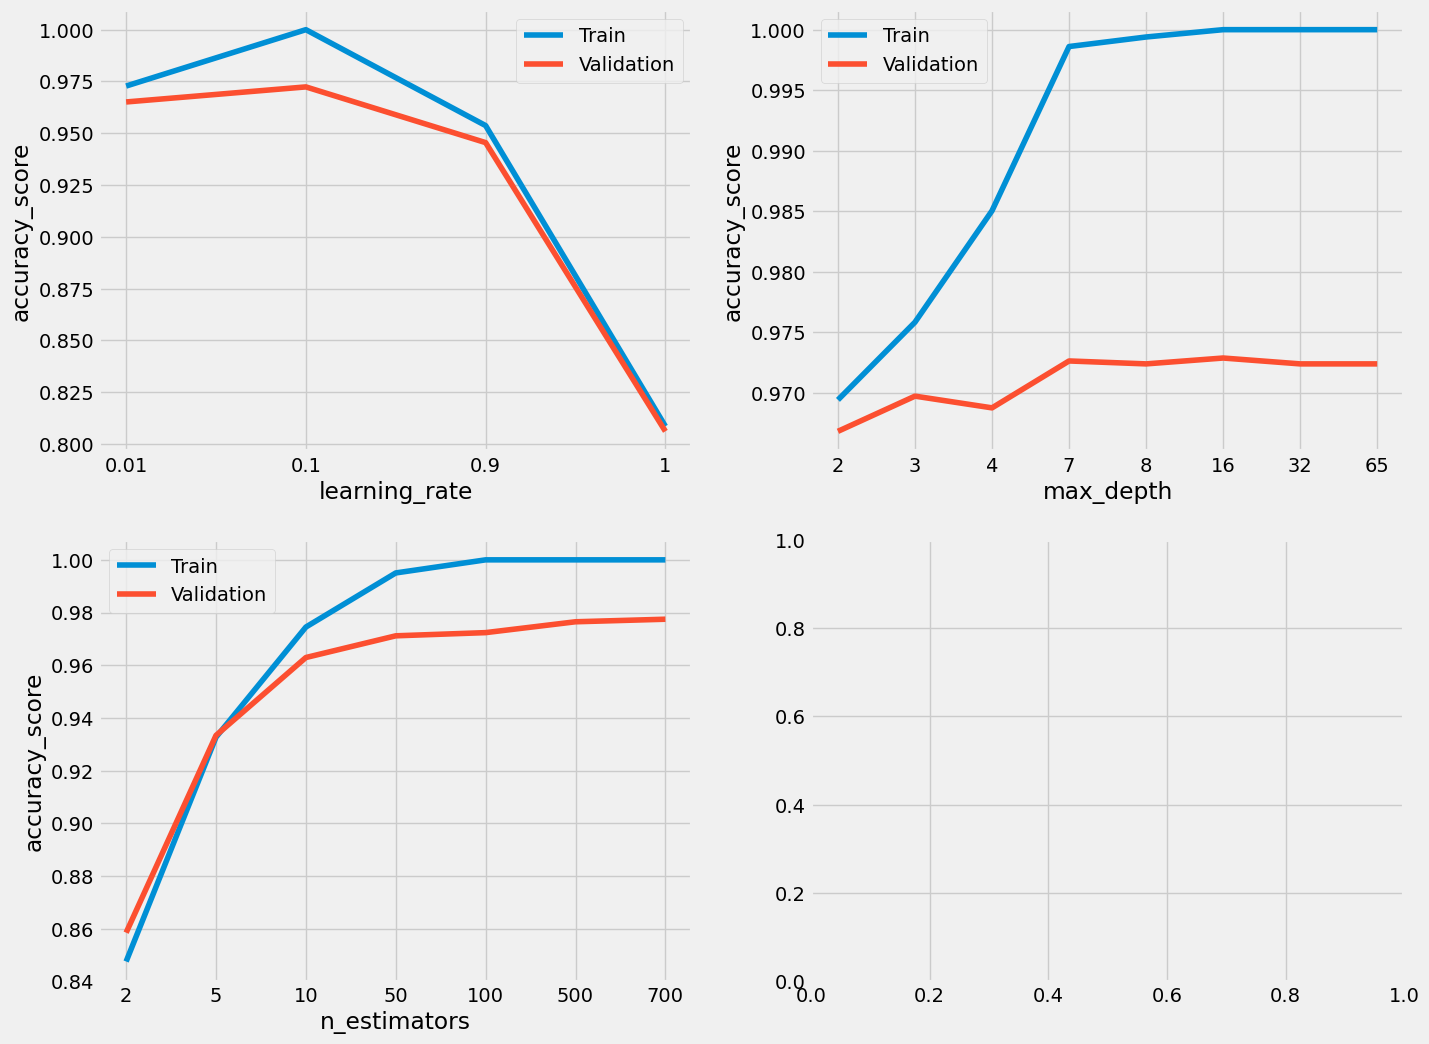

In [54]:
plot_LightGBM_accuracy(df_train, features=features_all, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

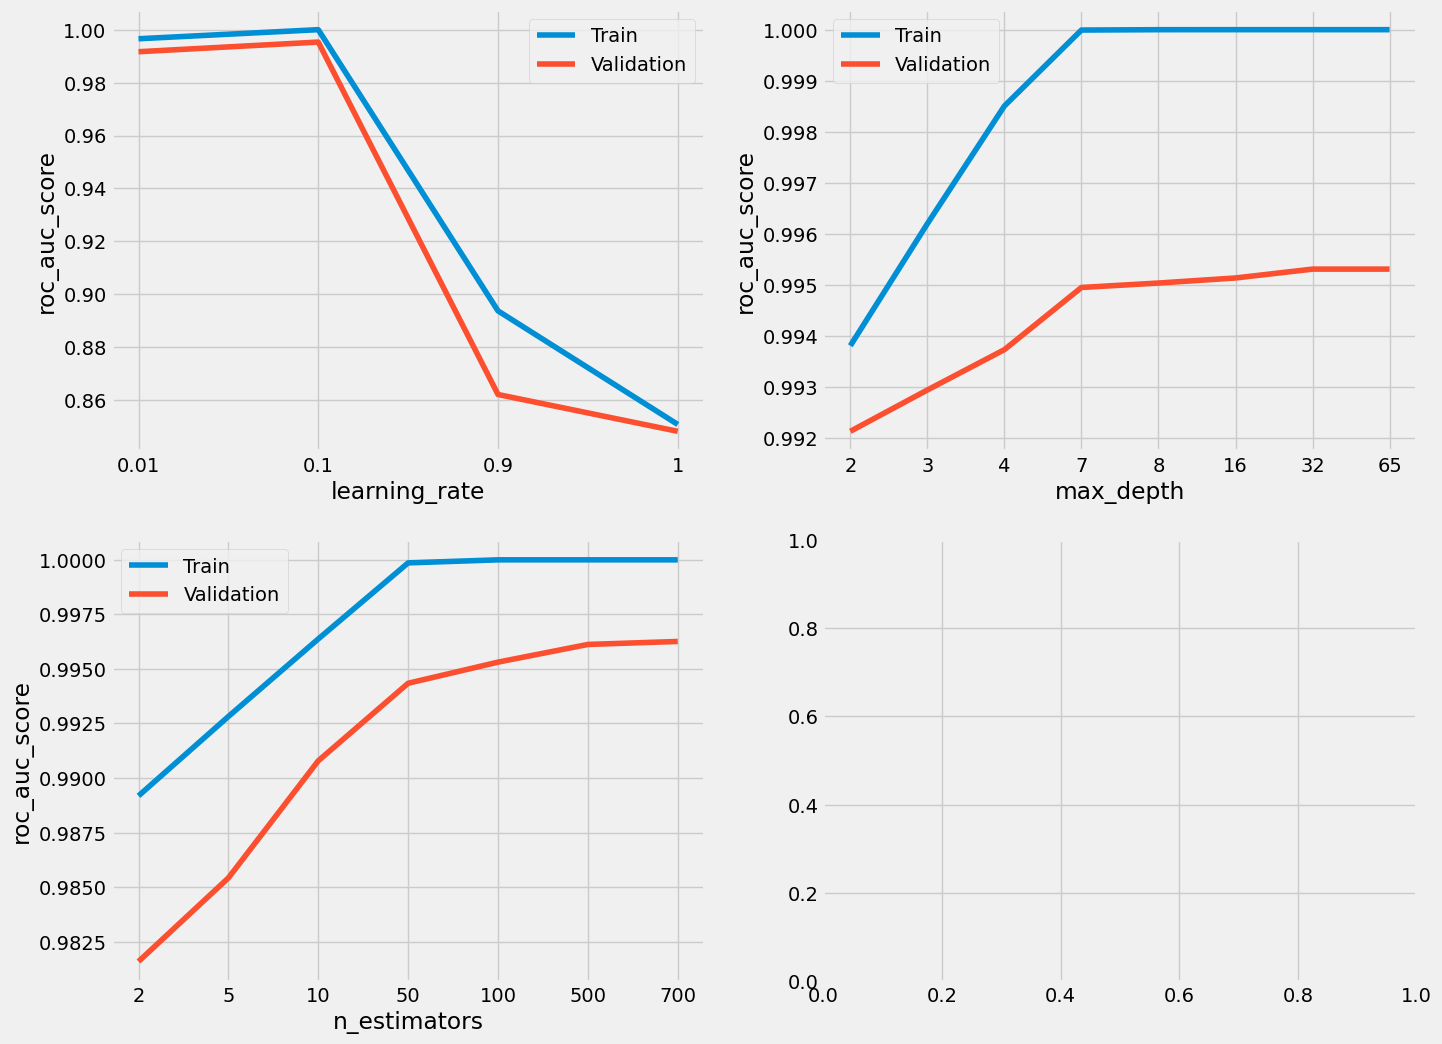

In [55]:
plot_LightGBM_roc(df_train, features=features_all, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

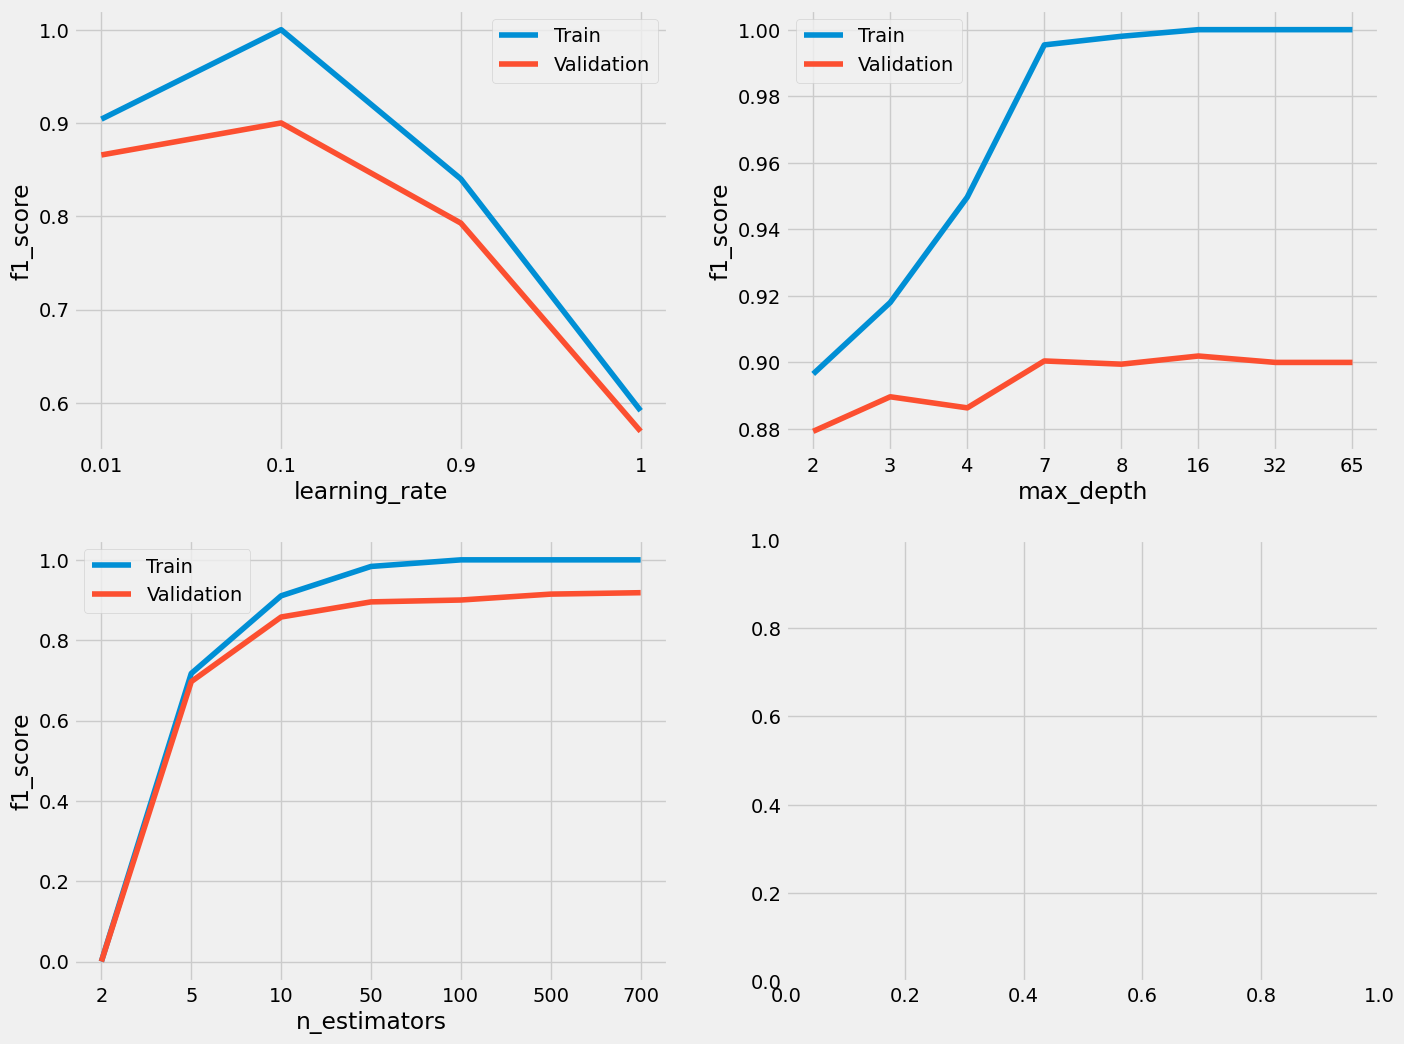

In [23]:
plot_LightGBM_f1(df_train, features=features_all, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

From the plot above we can say that best hyperparameters for original features are:
- learning_rate = 0.1
- max_depth = 4
- n_estimators = 50

From the plot above we can say that best hyperparameters for all features are:
- learning_rate = 0.1
- max_depth = 7
- n_estimators = 500

#### XGBClassifier

In [29]:
def plot_xgb_roc(df, features, target, plot_roc = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_roc: boolean
    
    Return:
        fig: figures with ROC curve fro the XGBClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    roc_lreate_train = []
    roc_lreate_val = []
    roc_maxdepth_train = []
    roc_maxdepth_val = []
    roc_n_estimators_train = []
    roc_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        if hasattr(model, 'predict_proba'):
            predictions_train = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train = metrics.roc_auc_score(y_train, predictions_train)
        accuracy_val = metrics.roc_auc_score(y_val, predictions_val)
        roc_lreate_train.append(accuracy_train)
        roc_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train1 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val1 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train1 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.roc_auc_score(y_train, predictions_train1)
        accuracy_val1 = metrics.roc_auc_score(y_val, predictions_val1)
        roc_maxdepth_train.append(accuracy_train1)
        roc_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        if hasattr(model, 'predict_proba'):
            predictions_train2 = model.predict_proba(X_train_scaled)[:,1] ## The predicted probabilities for the train dataset
            predictions_val2 = model.predict_proba(X_val_scaled)[:,1] ## The predicted probabilities for the validation dataset
        elif hasattr(model, 'decision_function'):
            predictions_train2 = model.decision_function(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.decision_function(X_val_scaled) ## The predicted values for the test dataset
        else:
            predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
            predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train2 = metrics.roc_auc_score(y_train, predictions_train2)
        accuracy_val2 = metrics.roc_auc_score(y_val, predictions_val2)
        roc_n_estimators_train.append(accuracy_train2)
        roc_n_estimators_val.append(accuracy_val2)

    
    
    if plot_roc:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(roc_lreate_train)
        ax1.plot(roc_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('roc_auc_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(roc_maxdepth_train)
        ax2.plot(roc_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('roc_auc_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(roc_n_estimators_train)
        ax3.plot(roc_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('roc_auc_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


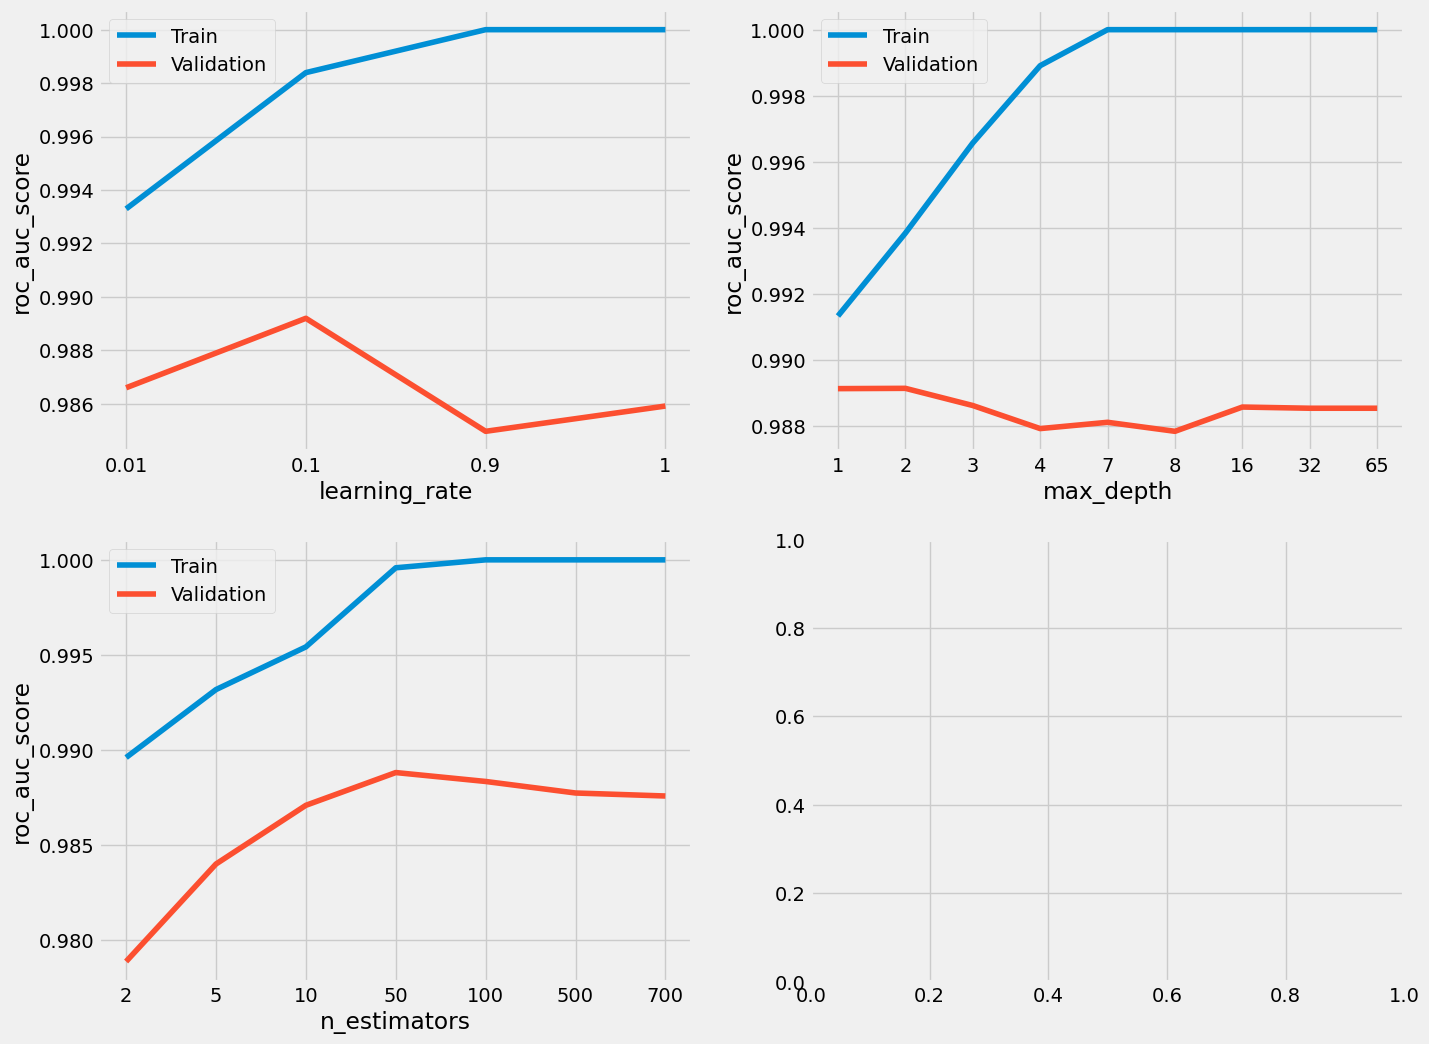

In [57]:
plot_xgb_roc(df_train, features=features_orignal, target='bnc_label', plot_roc=True, RANDOM_STATE=42)

In [57]:
def plot_xgb_accuracy(df, features, target, plot_accuracy = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_accuracy: boolean
    
    Return:
        fig: figures with accuracy_score curve for the XGBClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    accuracy_lreate_train = []
    accuracy_lreate_val = []
    accuracy_maxdepth_train = []
    accuracy_maxdepth_val = []
    accuracy_n_estimators_train = []
    accuracy_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset

        
        accuracy_train = metrics.accuracy_score(y_train, predictions_train)
        accuracy_val = metrics.accuracy_score(y_val, predictions_val)
        accuracy_lreate_train.append(accuracy_train)
        accuracy_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.accuracy_score(y_train, predictions_train1)
        accuracy_val1 = metrics.accuracy_score(y_val, predictions_val1)
        accuracy_maxdepth_train.append(accuracy_train1)
        accuracy_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.accuracy_score(y_train, predictions_train2)
        accuracy_val2 = metrics.accuracy_score(y_val, predictions_val2)
        accuracy_n_estimators_train.append(accuracy_train2)
        accuracy_n_estimators_val.append(accuracy_val2)

    
    if plot_accuracy:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(accuracy_lreate_train)
        ax1.plot(accuracy_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('accuracy_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(accuracy_maxdepth_train)
        ax2.plot(accuracy_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('accuracy_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(accuracy_n_estimators_train)
        ax3.plot(accuracy_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('accuracy_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])


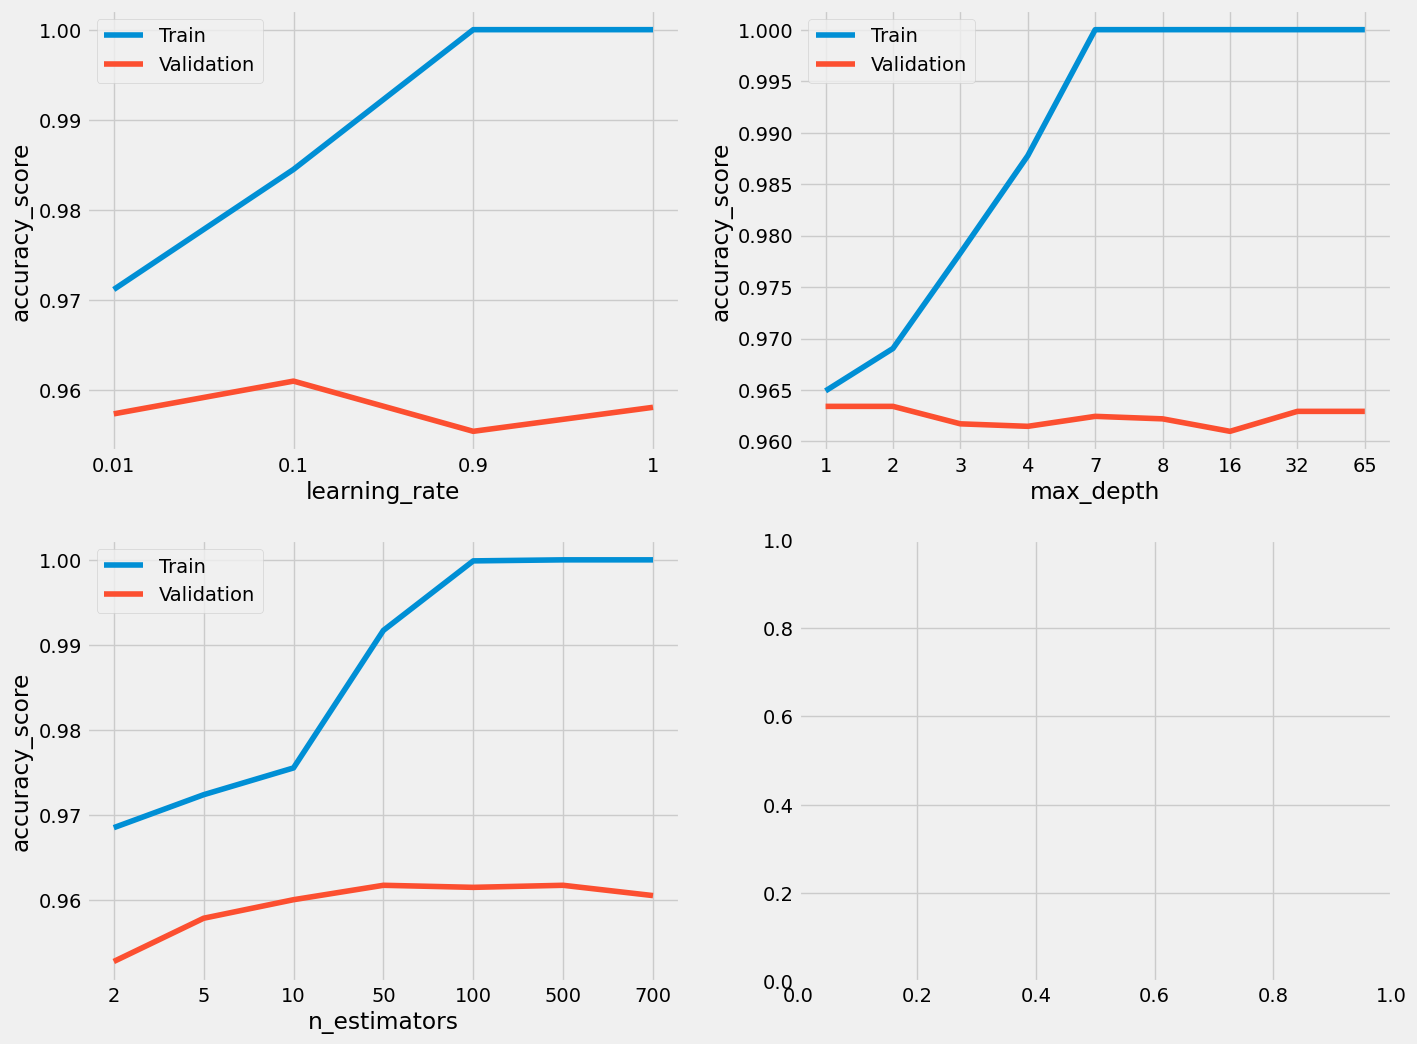

In [59]:
plot_xgb_accuracy(df_train, features=features_orignal, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

In [24]:
def plot_xgb_f1(df, features, target, plot_f1 = True, RANDOM_STATE = 42):
    
    """
    Args:
        df: dataframe
        features: list of features
        target: target variable
        plot_f1: boolean
    
    Return:
        fig: figures with f1_score curve for the XGBClassifier hyprerparameters n_estimator, learning_rate, and max_depth values.
        it's help to choose the best parameters to avoid overfitting.
        
    """
    
    X_train, X_val, y_train, y_val = split_data(df, features, target)
    X_train_scaled, X_val_scaled = scale_data(X_train, X_val)   
    
    learning_rate_list = [0.01, 0.1, 0.9, 1]
    max_depth_list = [2, 3, 4, 7, 8, 16, 32, 65] # None means that there is no depth limit.
    n_estimators_list = [2,5,10,50,100,500,700]
    
    f1_lreate_train = []
    f1_lreate_val = []
    f1_maxdepth_train = []
    f1_maxdepth_val = []
    f1_n_estimators_train = []
    f1_n_estimators_val = []
    

    for learning_rates in learning_rate_list:
        
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(learning_rate=learning_rates,random_state=RANDOM_STATE).fit(X_train_scaled,y_train)        

        predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset

        
        accuracy_train = metrics.f1_score(y_train, predictions_train)
        accuracy_val = metrics.f1_score(y_val, predictions_val)
        f1_lreate_train.append(accuracy_train)
        f1_lreate_val.append(accuracy_val)

    for max_depth in max_depth_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(max_depth = max_depth,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train1 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val1 = model.predict(X_val_scaled) ## The predicted values for the test dataset
        
        
        accuracy_train1 = metrics.f1_score(y_train, predictions_train1)
        accuracy_val1 = metrics.f1_score(y_val, predictions_val1)
        f1_maxdepth_train.append(accuracy_train1)
        f1_maxdepth_val.append(accuracy_val1)

    for n_estimator in n_estimators_list:
    
        # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
        model = XGBClassifier(n_estimators=n_estimator,random_state = RANDOM_STATE).fit(X_train_scaled,y_train) 
        
        predictions_train2 = model.predict(X_train_scaled) ## The predicted values for the train dataset
        predictions_val2 = model.predict(X_val_scaled) ## The predicted values for the test dataset
    
        
        accuracy_train2 = metrics.f1_score(y_train, predictions_train2)
        accuracy_val2 = metrics.f1_score(y_val, predictions_val2)
        f1_n_estimators_train.append(accuracy_train2)
        f1_n_estimators_val.append(accuracy_val2)

    
    if plot_f1:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,12),sharex=False, sharey=False)
        
        ax1.plot(f1_lreate_train)
        ax1.plot(f1_lreate_val)
        ax1.set_xlabel("learning_rate")
        ax1.set_ylabel('f1_score')
        ax1.set_xticks(range(len(learning_rate_list)),labels=learning_rate_list)
        ax1.legend(['Train','Validation'])
        
        ax2.plot(f1_maxdepth_train)
        ax2.plot(f1_maxdepth_val)
        ax2.set_xlabel('max_depth')
        ax2.set_ylabel('f1_score')
        ax2.set_xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
        ax2.legend(['Train','Validation'])
        
        ax3.plot(f1_n_estimators_train)
        ax3.plot(f1_n_estimators_val)
        ax3.set_xlabel('n_estimators')
        ax3.set_ylabel('f1_score')
        ax3.set_xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list)
        ax3.legend(['Train','Validation'])

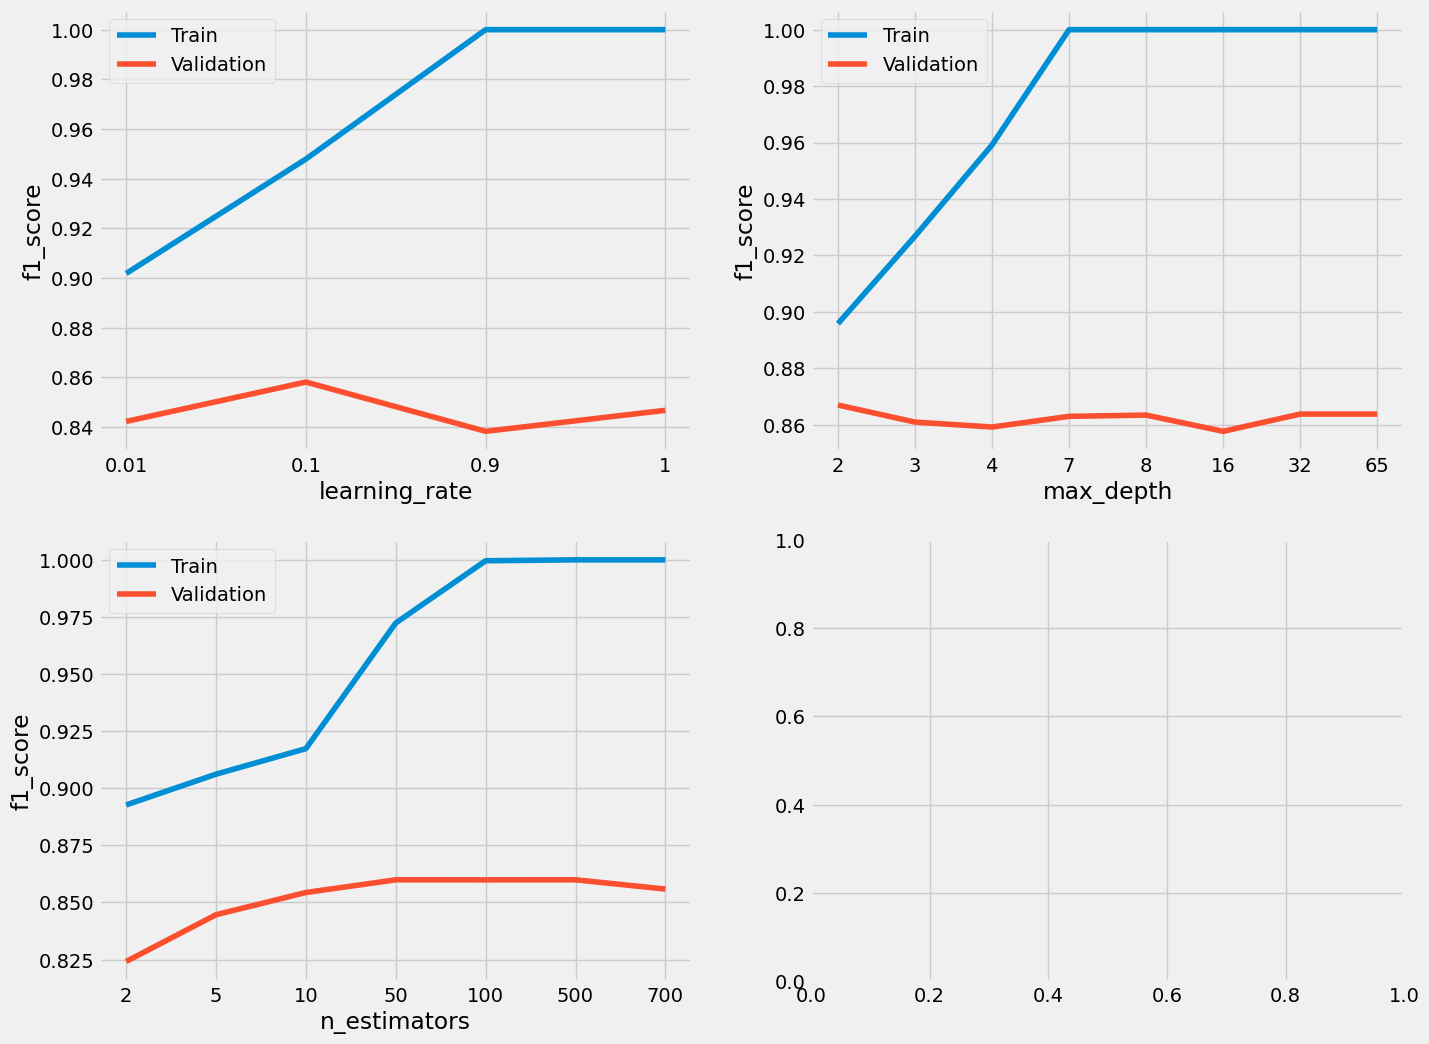

In [25]:
plot_xgb_f1(df_train, features=features_orignal, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

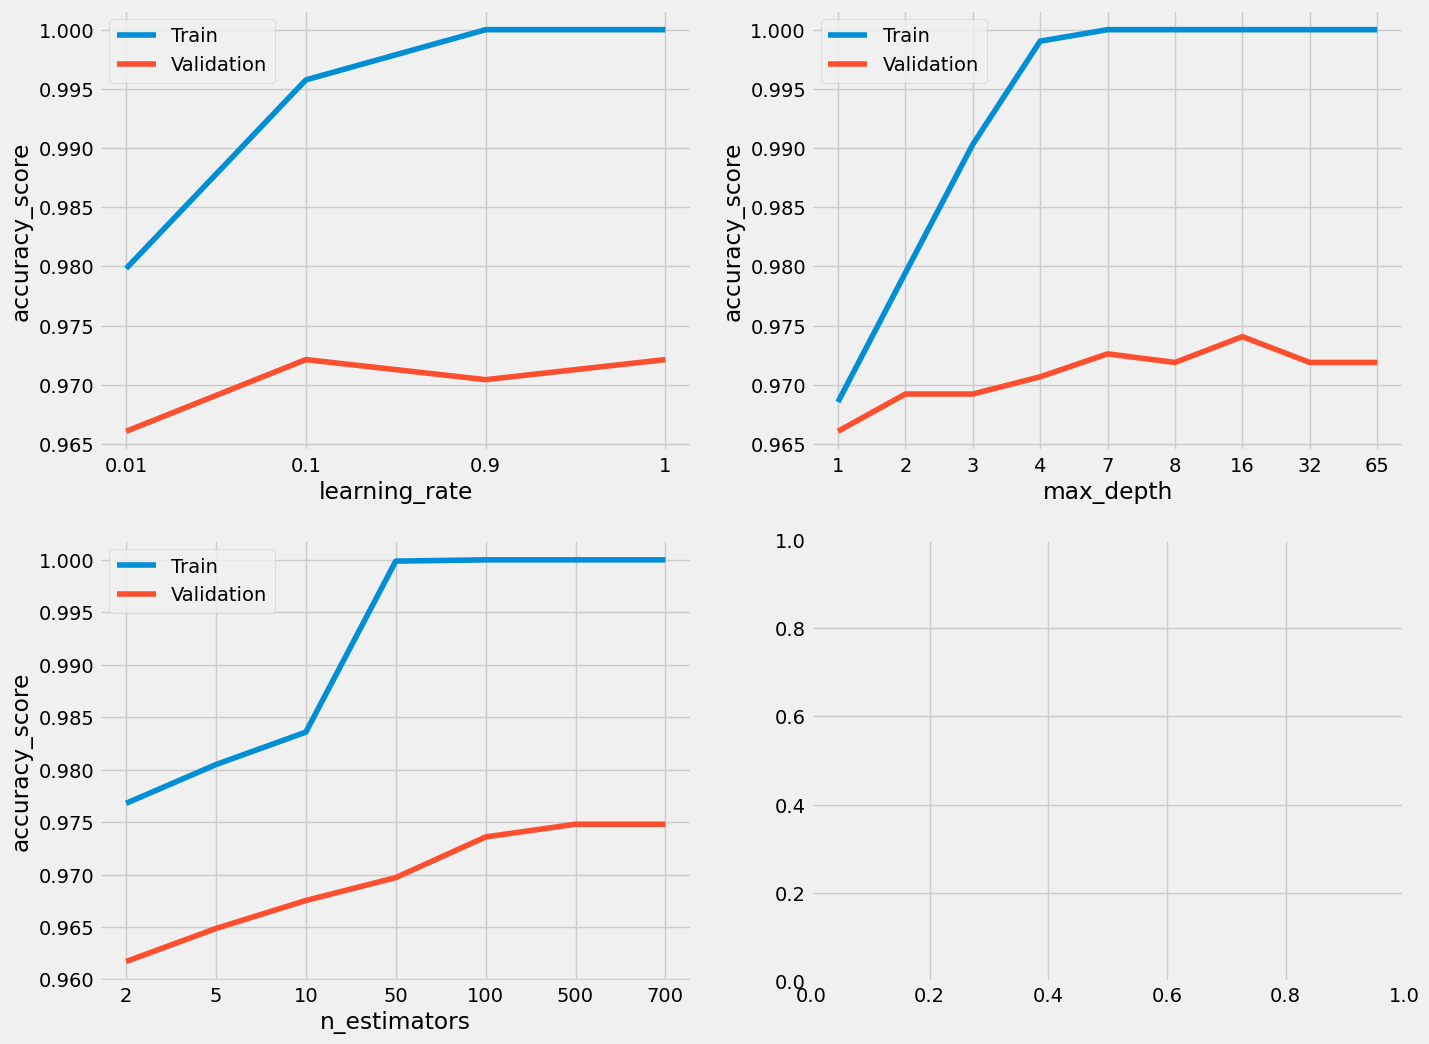

In [58]:
plot_xgb_accuracy(df_train, features=features_all, target='bnc_label', plot_accuracy=True, RANDOM_STATE=42)

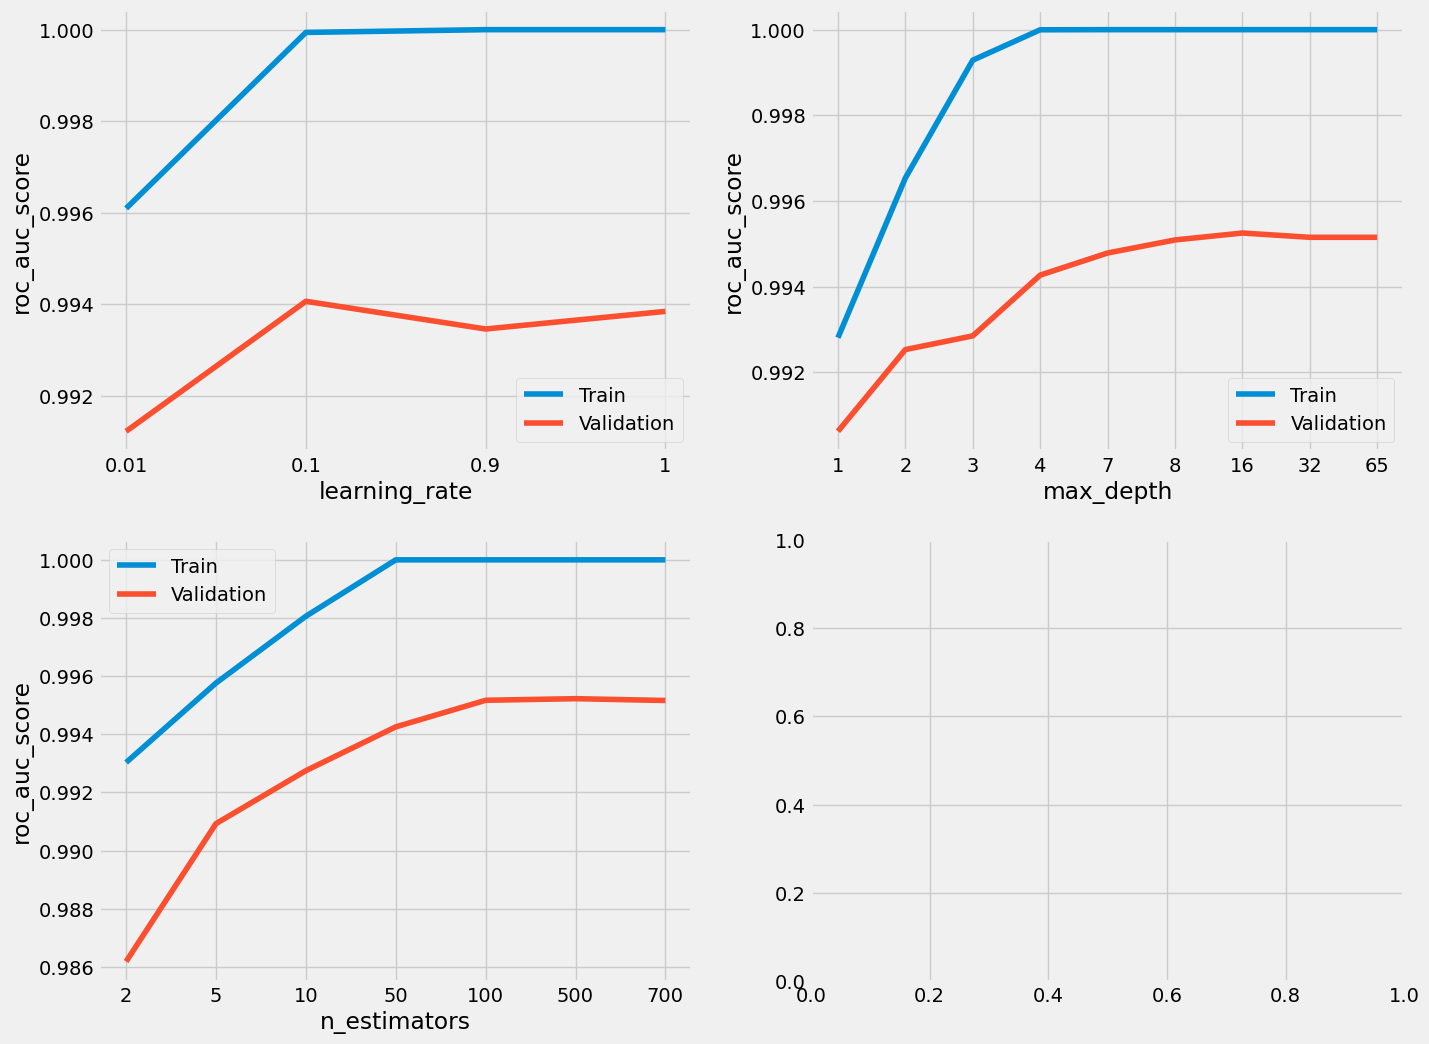

In [30]:
plot_xgb_roc(df_train, features=features_all, target='bnc_label', plot_roc = True, RANDOM_STATE=42)

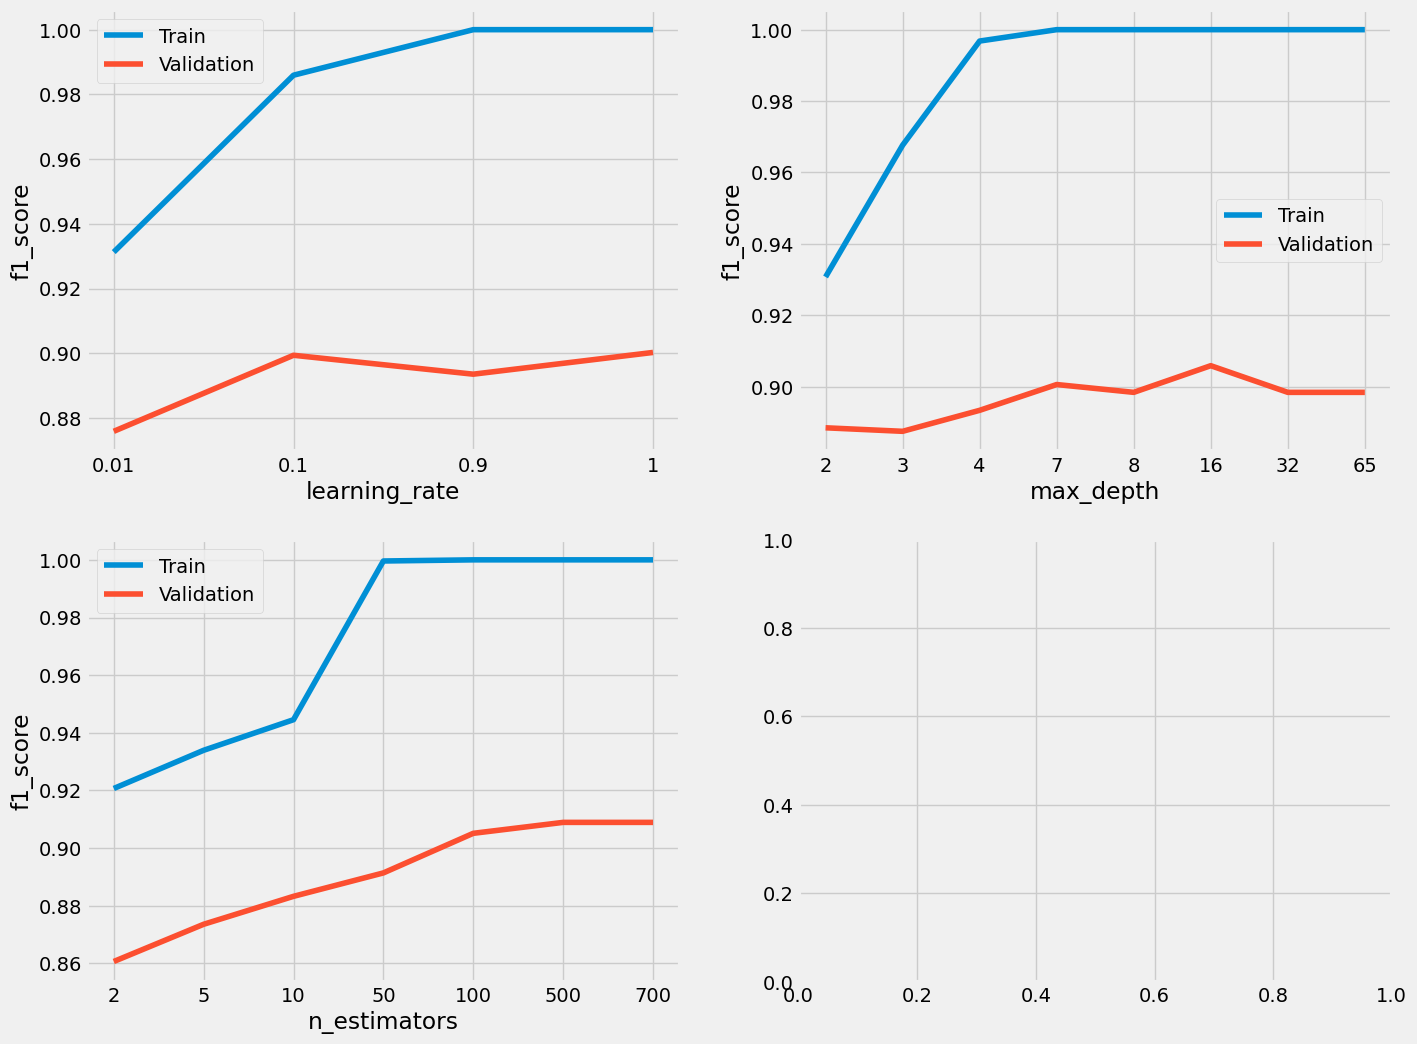

In [28]:
plot_xgb_f1(df_train, features=features_all, target='bnc_label', plot_f1=True, RANDOM_STATE=42)

From the plot we can say that best hypereparameters for original features are:
- learning_rate = 0.1
- max_depth = 2
- n_estimators = 50

From the plot we can say that best hypereparameters for all features are:
- learning_rate = 0.1
- max_depth = 16
- n_estimators = 500

## Binary_clf metrics

### Metrics dataframes

In [6]:
def split_metric_data(df_train, df_test, features, target):
    """
    Args:
        df_train (dataframe): train dataframe
        df_test (dataframe): test dataframe 
        features (list): list of features
        target (str): target variable
                
    Return:
        X_train_scaled (dataframe): scaled train dataframe
        X_test_scaled (dataframe): scaled test dataframe
        y_train (dataframe): train target
        y_test (dataframe): test target
    """
    
    X_train = df_train[features]
    y_train = df_train[target]
    
    X_test = df_test[features]
    y_test = df_test[target]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [7]:
def binary_clf(model, clf, df_train, df_test, features, target):
    """
    Args:
        model (str): model name
        clf (classifier object): classifier object from sklearn
        df_test (dataframe): test dataframe
        df_train (dataframe): train dataframe
        features (list): list of features
        target (str): target variable
        RANDOM_STATE (int): random state
        
    Return:
        df_predictions (dataframe): dataframe with predictions [y_pred] and probabilities [y_score]
        
    """
    # split the data
    X_train_scaled, X_test_scaled, y_train, y_test = split_metric_data(df_train, df_test, features, target)
    
    # fit the model
    model_fit = clf.fit(X_train_scaled, y_train)
    y_pred = model_fit.predict(X_test_scaled)
    
    if hasattr(model_fit, 'predict_proba'):
        y_score = model_fit.predict_proba(X_test_scaled)[:,1]
    elif hasattr(model_fit, 'decision_function'):
        y_score = model_fit.decision_function(X_test_scaled)
    else:
        y_score = y_pred
        
    # create dataframe with predictions and probabilities
    predictions = {'y_pred': y_pred, 'y_score': y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return df_predictions    
    

#### LogisticRegression

In [8]:
lgt_clf = LogisticRegression(random_state=42)
LogisticRegression_df = binary_clf('LogisticRegression B', lgt_clf, df_train, df_test, features_orignal, 'bnc_label')

In [9]:
LogisticRegression_df1 = binary_clf('LogisticRegression A', lgt_clf, df_train, df_test, features_all, 'bnc_label')

#### DecisionTreeClassifier

In [10]:
clf_DecisionTree = DecisionTreeClassifier(min_samples_split=700, max_depth=4, random_state=42)
DecisionTree_df = binary_clf('DecisionTree B', clf_DecisionTree, df_train, df_test, features_orignal, 'bnc_label')

In [11]:
clf_DecisionTree1 = DecisionTreeClassifier(min_samples_split=300, max_depth=4, random_state=42)
DecisionTree_df1 = binary_clf('DecisionTree A', clf_DecisionTree1, df_train, df_test, features_all, 'bnc_label')

#### RandomForestClassifier

In [12]:
rnft_clf = RandomForestClassifier(n_estimators= 500, min_samples_split= 30, max_depth= 8, random_state=42)
RandomForestClassifier_df = binary_clf('RandomForestClassifier B', rnft_clf, df_train, df_test, features_orignal, 'bnc_label')

In [13]:
rnft_clf1 = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, max_depth= 16, random_state=42)
RandomForestClassifier_df1 = binary_clf('RandomForestClassifier A', rnft_clf1, df_train, df_test, features_all, 'bnc_label')

#### KNN

In [14]:
KNN_clf = KNeighborsClassifier(n_neighbors= 50)
KNN_df = binary_clf('KNeighborsClassifier B', KNN_clf, df_train, df_test, features_orignal, 'bnc_label')

In [15]:
KNN_clf1 = KNeighborsClassifier(n_neighbors= 10)
KNN_df1 = binary_clf('KNeighborsClassifier A', KNN_clf1, df_train, df_test, features_all, 'bnc_label')

#### GaussianNB

In [16]:
NB_clf = GaussianNB()
GaussianNB_df = binary_clf('GaussianNB B', NB_clf, df_train, df_test, features_orignal, 'bnc_label')

In [17]:
GaussianNB_df1 = binary_clf('GaussianNB A', NB_clf, df_train, df_test, features_all, 'bnc_label')

#### LightGBM

In [18]:
LightGBM_clf = LGBMClassifier(n_estimators= 50, learning_rate= 0.1, max_depth= 4, random_state=42)
LGBMClassifier_df = binary_clf('LGBMClassifier B', LightGBM_clf, df_train, df_test, features_orignal, 'bnc_label')

In [19]:
LightGBM_clf1 = LGBMClassifier(n_estimators= 500, learning_rate= 0.1, max_depth= 7, random_state=42)
LGBMClassifier_df1 = binary_clf('LGBMClassifier A', LightGBM_clf1, df_train, df_test, features_all, 'bnc_label')

#### XGBClassifier

In [20]:
xgb_clf = XGBClassifier(n_estimators= 50, learning_rate= 0.1, max_depth= 2, random_state=42)
XGBClassifier_df = binary_clf('XGBClassifier B', xgb_clf, df_train, df_test, features_orignal, 'bnc_label')

In [21]:
xgb_clf1 = XGBClassifier(n_estimators= 500, learning_rate= 0.1, max_depth= 16, random_state=42)
XGBClassifier_df1 = binary_clf('XGBClassifier A', xgb_clf1, df_train, df_test, features_all, 'bnc_label')

### Metrics Visualization

In [22]:
def binary_clf_metrics(model, y_test, y_score, y_pred, plot_out = True, print_out= True):
    
    """
    model (str): the model name
    y_test (array): the true labels
    y_score (array): the predicted probabilities
    y_pred (array): the predicted labels
    plot_out (bool): whether to plot the ROC curves
    print_out (bool): whether to print the metrics
    
    Return:
        df_metric (dataframe): the metrics of the model
        df_roc_thresh (dataframe): the metrics of the model for different thresholds of ROC
        df_prc_thresh (dataframe): the metrics of the model for different thresholds of Precision-Recall
    """
    
    binaryclf_metric = {
        " Accuracy": metrics.accuracy_score(y_test, y_pred),
        " Precision": metrics.precision_score(y_test, y_pred),
        " Recall": metrics.recall_score(y_test, y_pred),
        " F1": metrics.f1_score(y_test, y_pred),
        " ROC AUC": metrics.roc_auc_score(y_test, y_score)
    }
    
    df_metric = pd.DataFrame.from_dict(binaryclf_metric, orient='index')
    df_metric.columns = [model]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
    
    auc = metrics.auc(fpr, tpr)
    
    # let's get maintenance capacity for thresholds_roc
    engine_roc = []
    for thr in thresholds:
        """
        here we get the mean of every row that satisfiy the condition which to be class as 1.
        every row represent 100 engine we have in our dataset
        """
        engine_roc.append((y_score >= thr).mean())
    engine_roc = np.array(engine_roc)
    
    roc_thresh = {
        'thresholds_roc': thresholds,
        'TPR': tpr,
        'FPR': fpr,
        'maintenance_capacity_roc': engine_roc
    }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    """
    let's get ather classification mertrics
    - we know that from thruth data that positive calss = 25, and negative class = 75
    - positive class = 25 = TP + FN
    - negative class = 75 = FP + TN
    - we will try here to get TP, FP, TN, FN THREN GET TNR, FNR. we already know TPR and FPR
    
    - we know that 
        - TPR (Recall = sensitivity) = TP / (TP + FN)
        - FPR (1 - Specificity) = FP / (FP + TN)
        - TNR (Specificity) = TN / (FP + TN)
        - FNR (1 - Recall/Sensitivity) = FN / (FN + TP)
    
    """
    
    df_roc_thresh['TP'] = df_roc_thresh['TPR'] * 25
    df_roc_thresh['FP'] = df_roc_thresh['FPR'] * 75
    df_roc_thresh['TN'] = (1 - df_roc_thresh['FPR']) * 75
    df_roc_thresh['FN'] = (1 - df_roc_thresh['TPR']) * 25
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN'] / (df_roc_thresh['FP'] + df_roc_thresh['TN'])
    df_roc_thresh['FNR'] = df_roc_thresh['FN'] / (df_roc_thresh['FN'] + df_roc_thresh['TP'])
    
    df_roc_thresh['Model'] = model
    
    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)
    
    """
    append value 1 to the end of threshold array cuz precision_recall_curve() does not provide threshold for last point on the curve which point is (1,0).
    by addind 1 you asscoiating this point with threshold 1.
    """
    thresh_prc = np.append(thresh_prc,1)

    # let's get maintenance capacity for thresh_prc
    engine_prc = []
    for thr in thresh_prc:
        """
        here we get the mean of every row that satisfiy the condition which to be class as 1.
        every row represent 100 engine we have in our dataset
        """
        engine_prc.append((y_score >= thr).mean())
    engine_prc = np.array(engine_prc)
    
    thr_prc = {
        'thresholds_prc': thresh_prc,
        'Precision': precision,
        'Recall': recall,
        'maintenance_capacity_prc': engine_prc
    }

    df_prc_thresh = pd.DataFrame.from_dict(thr_prc)
    
    if print_out:
        print(f"Model: {model}\n")
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metric)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['thresholds_roc', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'maintenance_capacity_roc']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['thresholds_prc', 'Precision', 'Recall', 'maintenance_capacity_prc']])

    if plot_out:
        fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,13),sharex=False, sharey=False)
        fig.set_size_inches(20,13)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.06, 1.0]) # -0.05 better for visualization
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower right", fontsize='small')

        ax3.plot(thresholds, fpr, color='red', lw=2, label='FPR')
        ax3.plot(thresholds, tpr, color='green', lw=2, label='TPR')
        ax3.plot(thresholds, engine_roc, color='blue', lw=2, label='Maintenance Capacity')
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold_roc')
        ax3.set_ylabel('%')
        ax3.legend(loc="upper right", fontsize='small')
        
        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engine_prc, color='blue',label='Maintenance Capacity') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold_prc')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return df_metric, df_roc_thresh, df_prc_thresh
    

In [23]:
X_train_scaled_orignal, X_test_scaled_orignal, y_train_orignal, y_test_orignal = split_metric_data(df_train, df_test, features_orignal, 'bnc_label')
X_train_scaled_all, X_test_scaled_all, y_train_all, y_test_all = split_metric_data(df_train, df_test, features_all, 'bnc_label')

#### LogisticRegression

Model: LogisticRegression B

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
            LogisticRegression B
 Accuracy               0.920000
 Precision              0.947368
 Recall                 0.720000
 F1                     0.818182
 ROC AUC                0.978133

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0     1.995204e+00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1     9.952036e-01   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2     5.651582e-01  18.0   0.0  75.0   7.0  0.72  0.000000  1.000000  0.28   
3     4.726806e-01  18.0   2.0  73.0   7.0  0

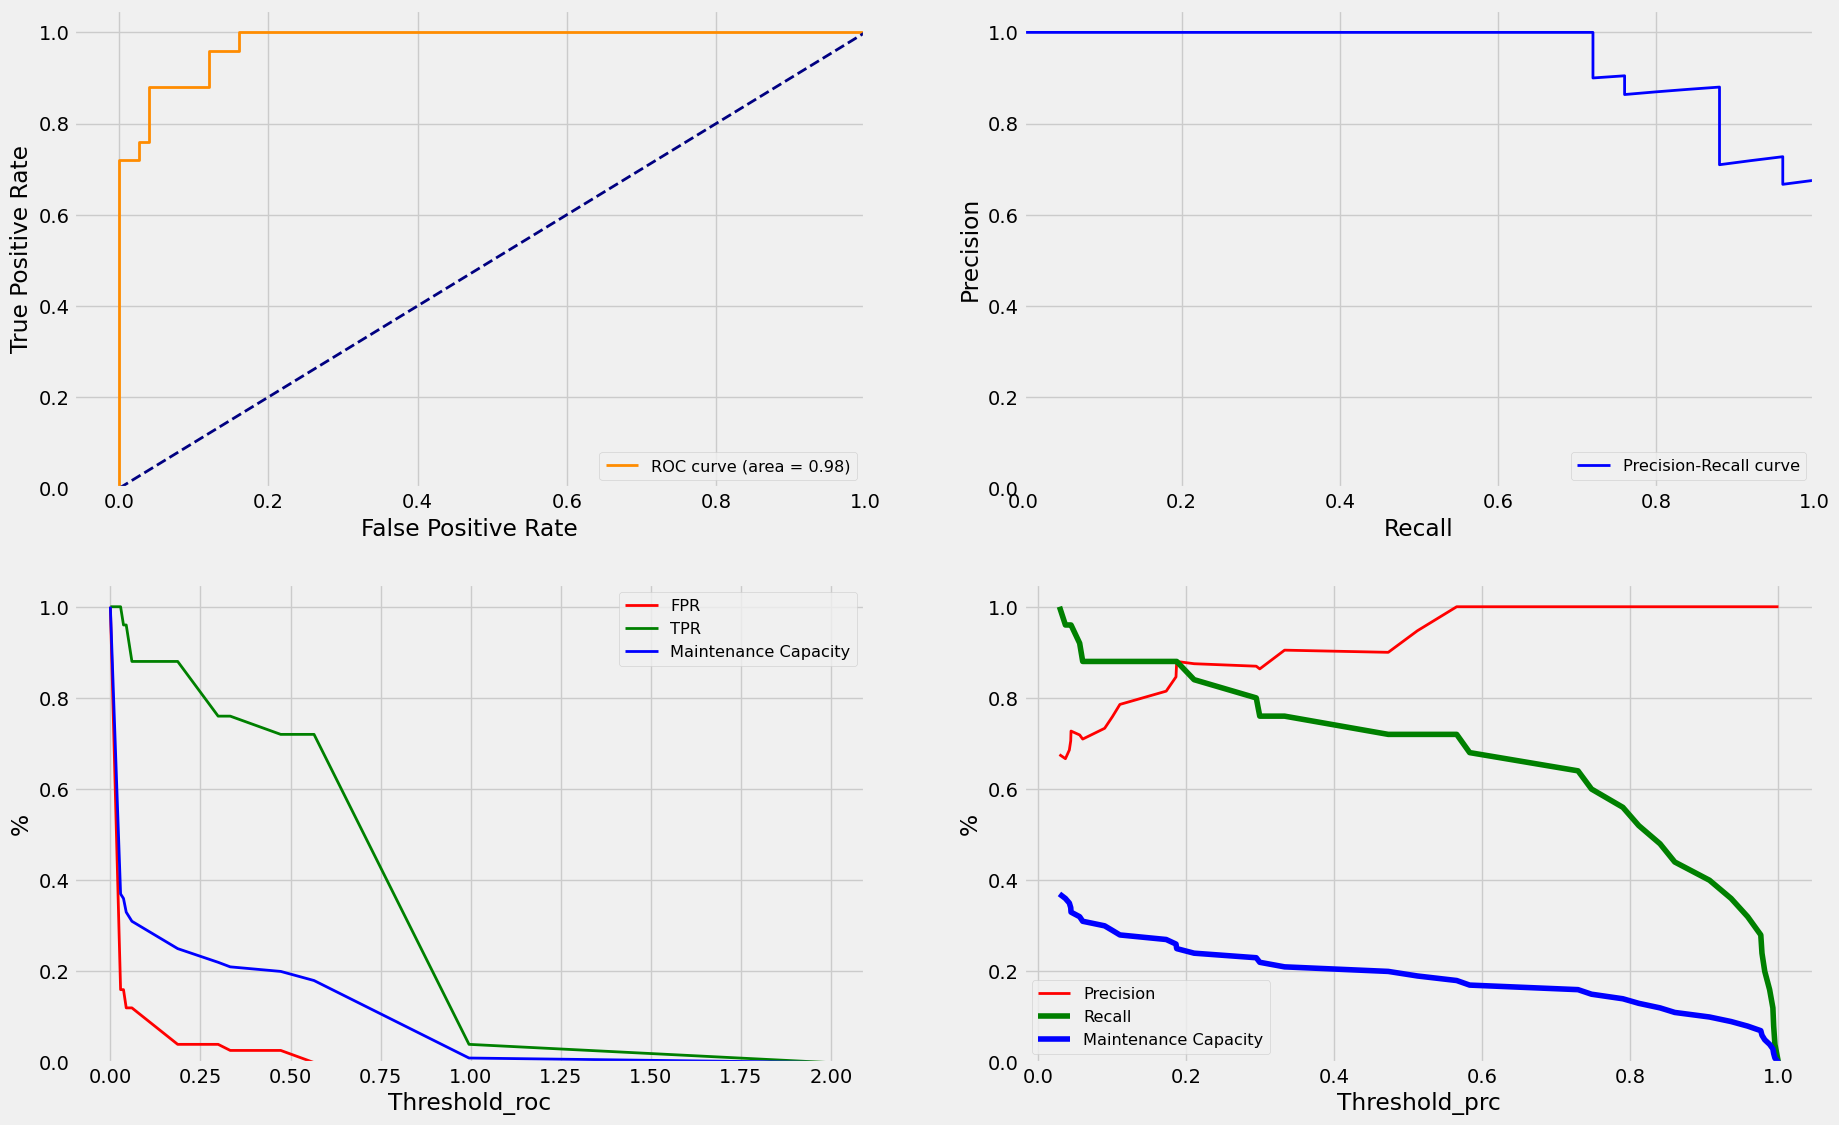

In [24]:
# Logistic Regression before feature selection plot
metrics_lgrb, roc_lgrb, prc_lgrb = binary_clf_metrics('LogisticRegression B', y_test_orignal, LogisticRegression_df.y_score, LogisticRegression_df.y_pred, plot_out=True, print_out=True)

Model: LogisticRegression A

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
            LogisticRegression A
 Accuracy               0.920000
 Precision              0.947368
 Recall                 0.720000
 F1                     0.818182
 ROC AUC                0.983467

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0     1.993942e+00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1     9.939424e-01   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2     8.095792e-01  16.0   0.0  75.0   9.0  0.64  0.000000  1.000000  0.36   
3     7.699451e-01  16.0   1.0  74.0   9.0  0

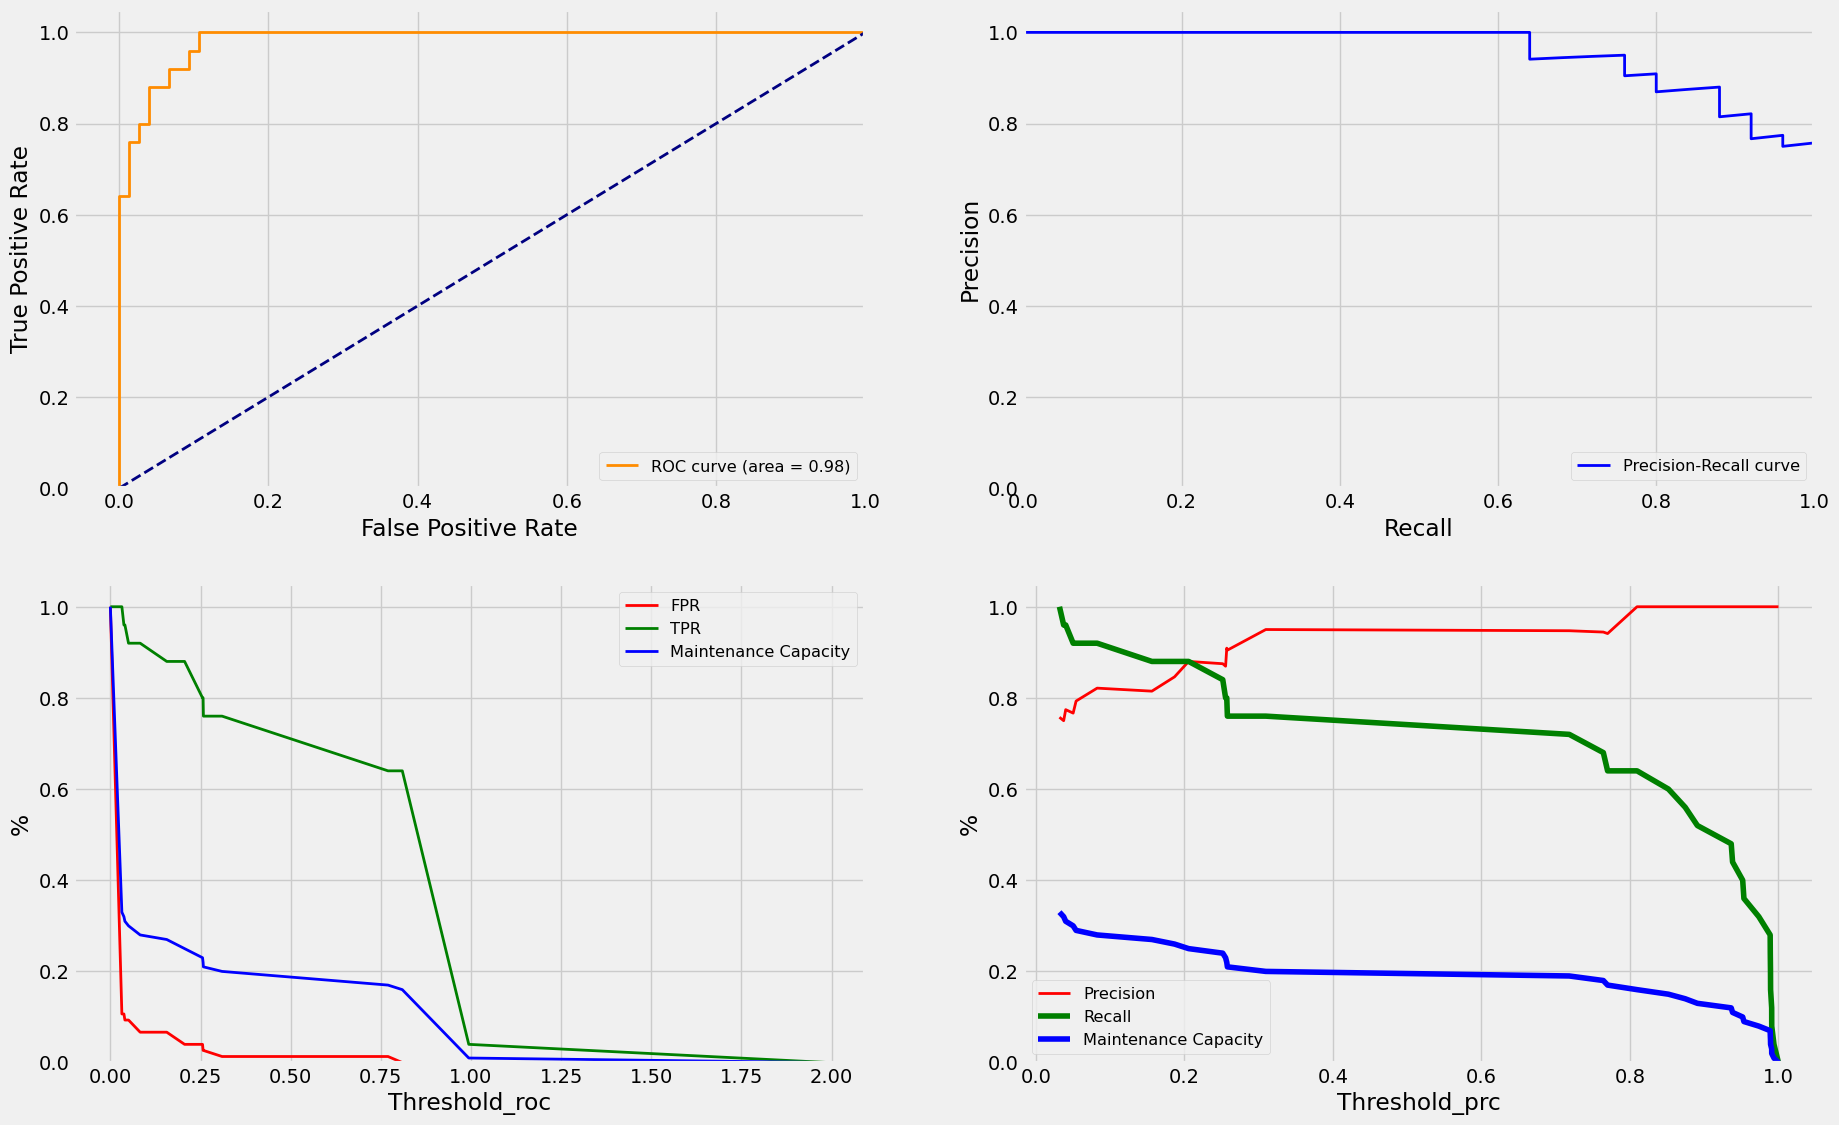

In [25]:
# Logistic Regression after feature selection plot
metrics_lgra, roc_lgra, prc_lgra = binary_clf_metrics('LogisticRegression A', y_test_all, LogisticRegression_df1.y_score, LogisticRegression_df1.y_pred, plot_out=True, print_out=True)

In [26]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

LogisticRegression B  LogisticRegression A
 Accuracy               0.920000              0.920000
 Precision              0.947368              0.947368
 Recall                 0.720000              0.720000
 F1                     0.818182              0.818182
 ROC AUC                0.978133              0.983467

#### DecisionTreeClassifier

Model: DecisionTree B

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
            DecisionTree B
 Accuracy         0.920000
 Precision        0.947368
 Recall           0.720000
 F1               0.818182
 ROC AUC          0.933333

ROC Thresholds:

   thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0        1.966102   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1        0.966102   9.0   1.0  74.0  16.0  0.36  0.013333  0.986667  0.64   
2        0.547619  18.0   1.0  74.0   7.0  0.72  0.013333  0.986667  0.28   
3        0.484848  19.0   2.0  73.0   6.0  0.76  0.026667  0.973333  0.24   
4        0.198

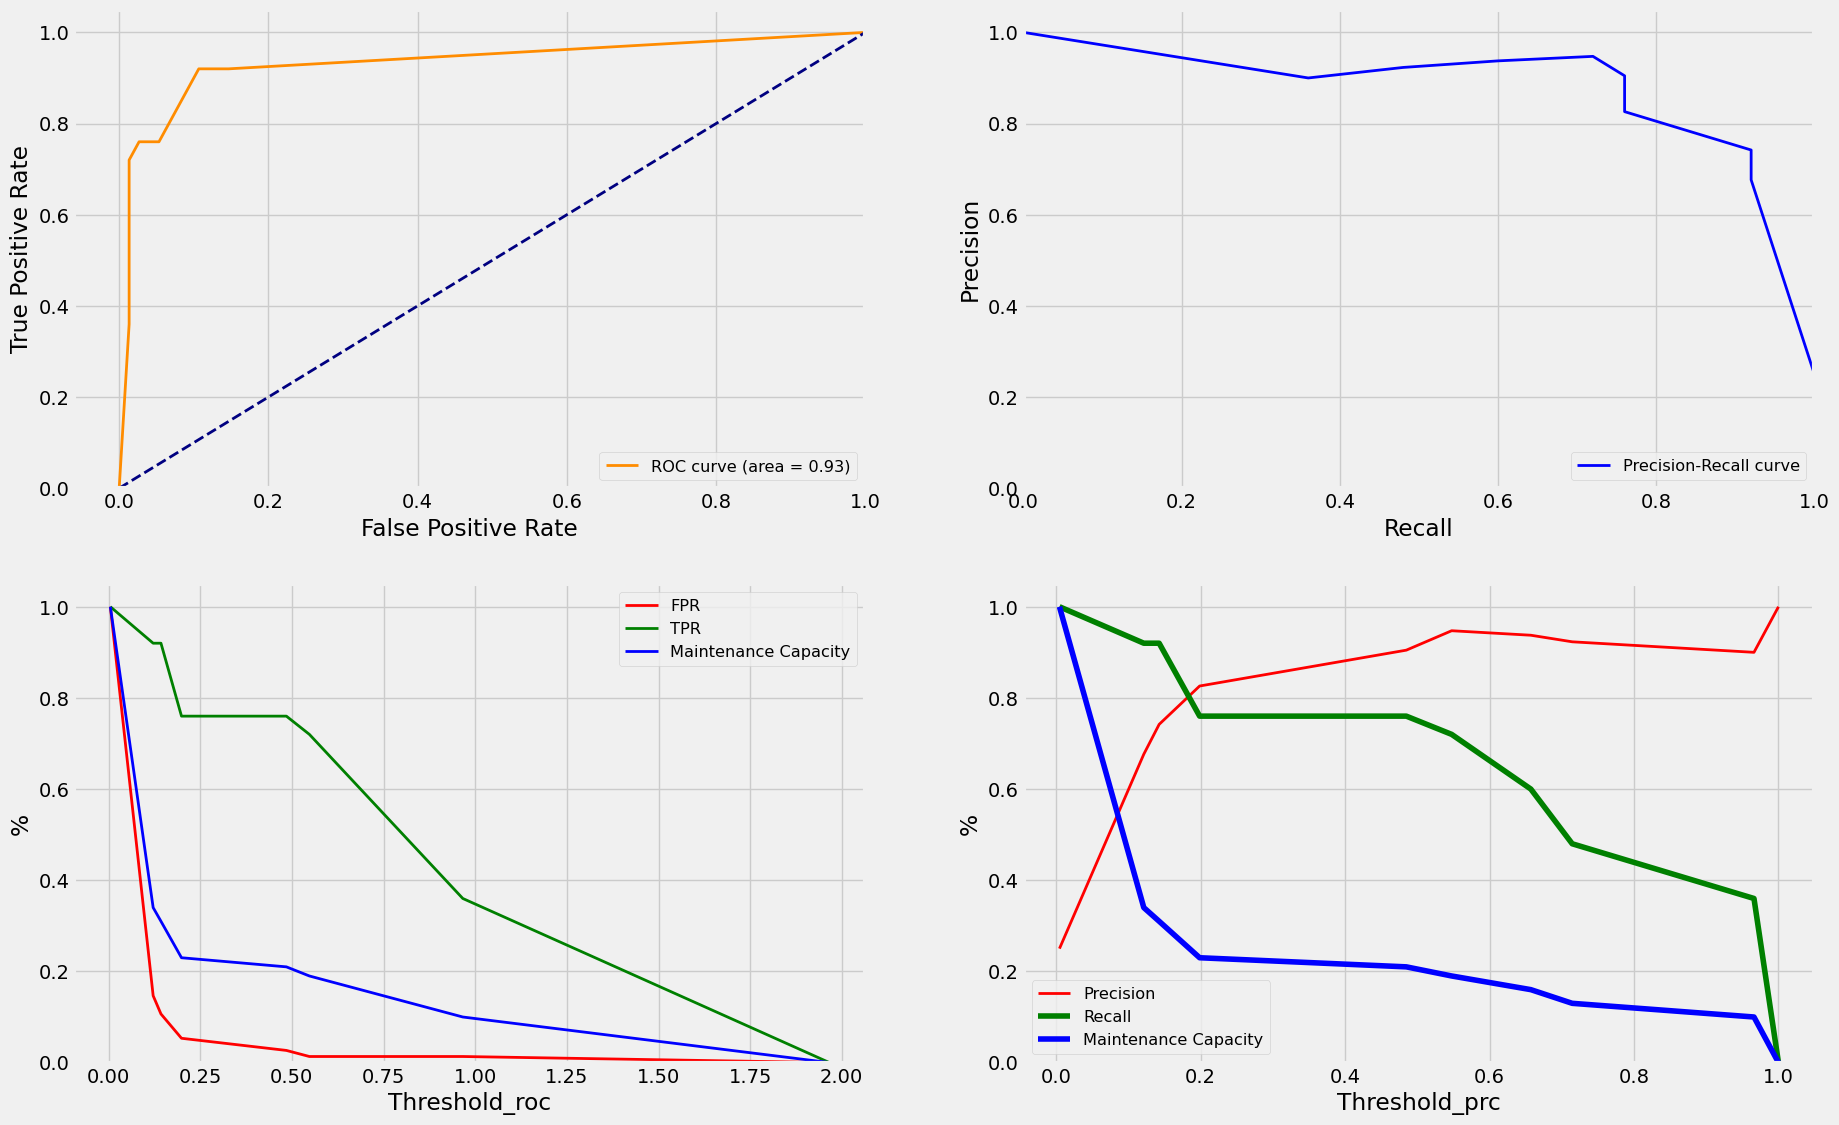

In [27]:
# decision tree before feature selection plot
metrics_dctb, roc_dctb, prc_dctb = binary_clf_metrics('DecisionTree B', y_test_orignal, DecisionTree_df.y_score, DecisionTree_df.y_pred, plot_out=True, print_out=True)

Model: DecisionTree A

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
            DecisionTree A
 Accuracy         0.910000
 Precision        0.944444
 Recall           0.680000
 F1               0.790698
 ROC AUC          0.920000

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         1.994329   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         0.994329   9.0   0.0  75.0  16.0  0.36  0.000000  1.000000  0.64   
2         0.951807  10.0   0.0  75.0  15.0  0.40  0.000000  1.000000  0.60   
3         0.891697  12.0   0.0  75.0  13.0  0.48  0.000000  1.000000  0.52   
4        

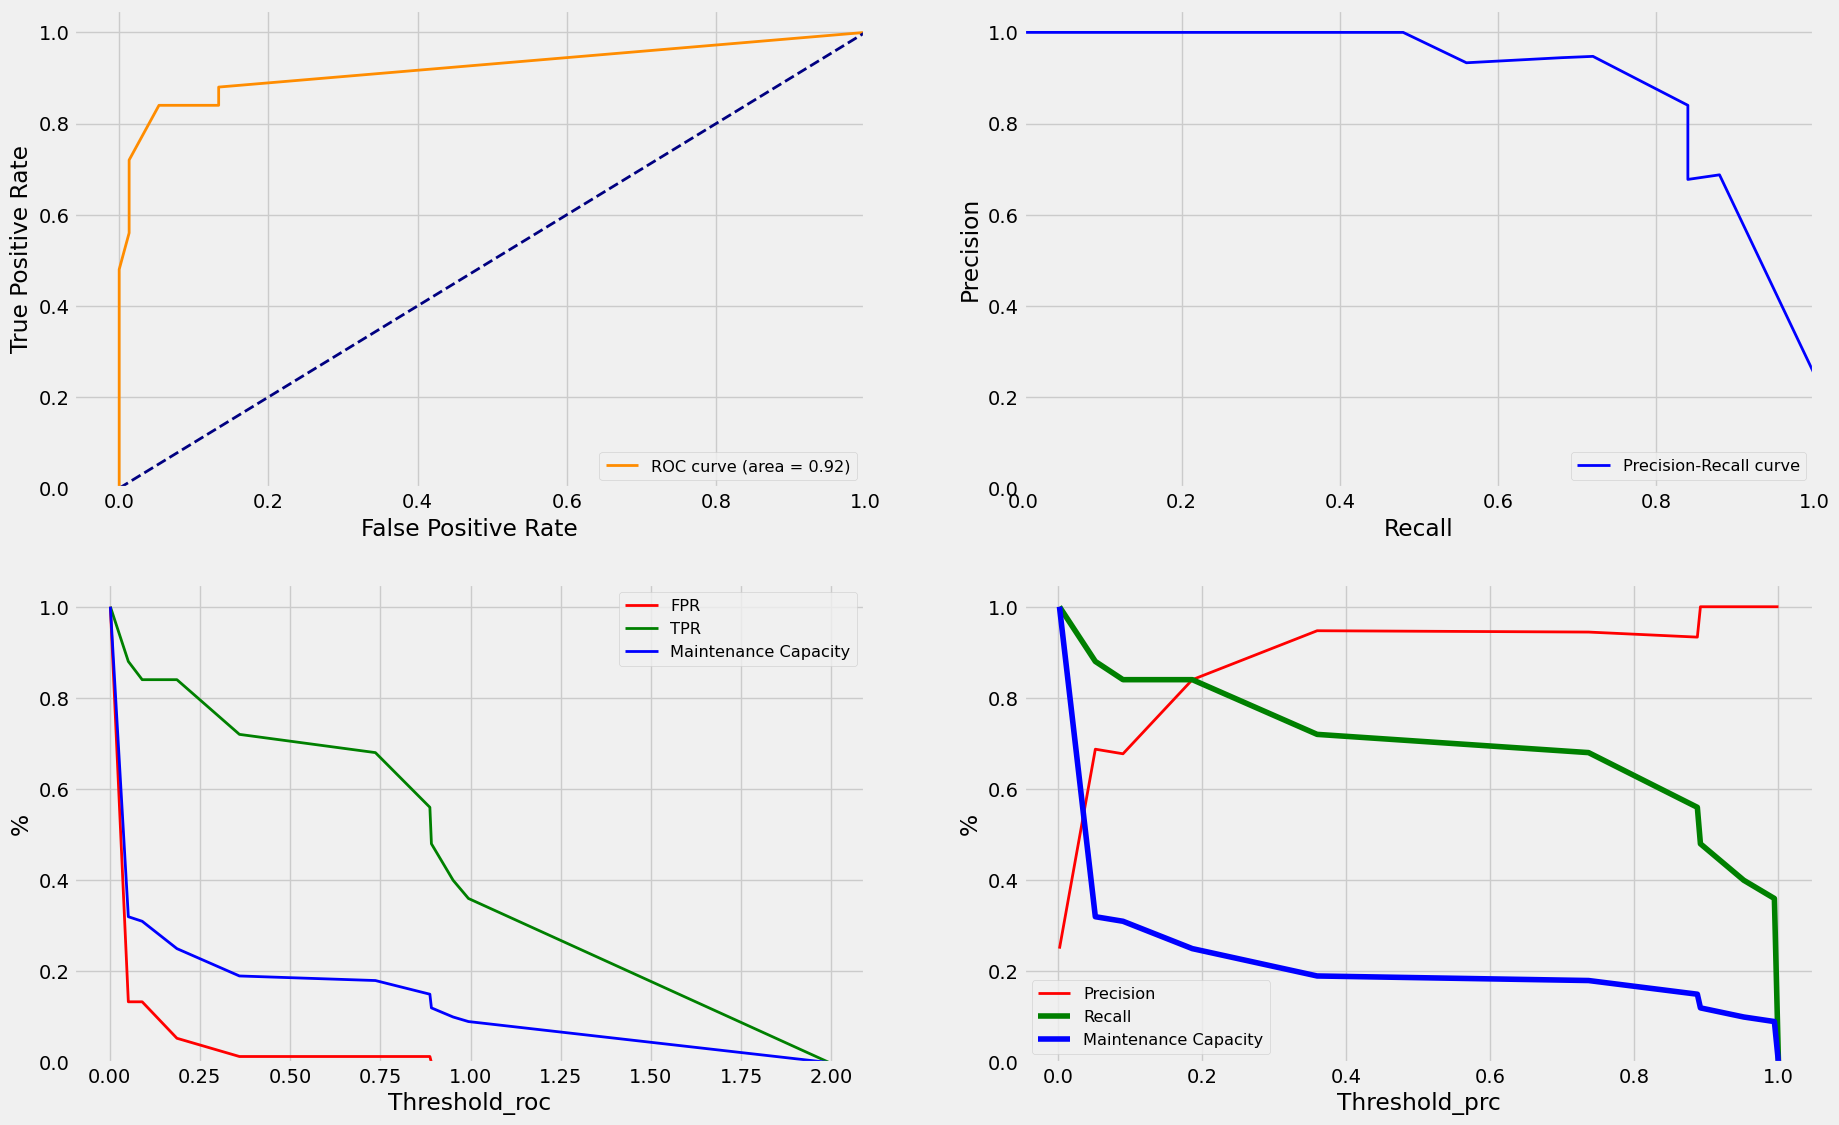

In [28]:
# decision tree after feature selection plot
metrics_dcta, roc_dcta, prc_dcta = binary_clf_metrics('DecisionTree A', y_test_all, DecisionTree_df1.y_score, DecisionTree_df1.y_pred, plot_out=True, print_out=True)

In [29]:
metrics_dct = pd.concat([metrics_dctb, metrics_dcta], axis=1)
metrics_dct

DecisionTree B  DecisionTree A
 Accuracy         0.920000        0.910000
 Precision        0.947368        0.944444
 Recall           0.720000        0.680000
 F1               0.818182        0.790698
 ROC AUC          0.933333        0.920000

#### RandomForestClassifier

Model: RandomForest B

Confusion Matrix:
[[74  1]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.95      0.72      0.82        25

    accuracy                           0.92       100
   macro avg       0.93      0.85      0.88       100
weighted avg       0.92      0.92      0.92       100


Metrics:
            RandomForest B
 Accuracy         0.920000
 Precision        0.947368
 Recall           0.720000
 F1               0.818182
 ROC AUC          0.982933

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         1.993197   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         0.993197   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2         0.727064  16.0   0.0  75.0   9.0  0.64  0.000000  1.000000  0.36   
3         0.590017  16.0   1.0  74.0   9.0  0.64  0.013333  0.986667  0.36   
4        

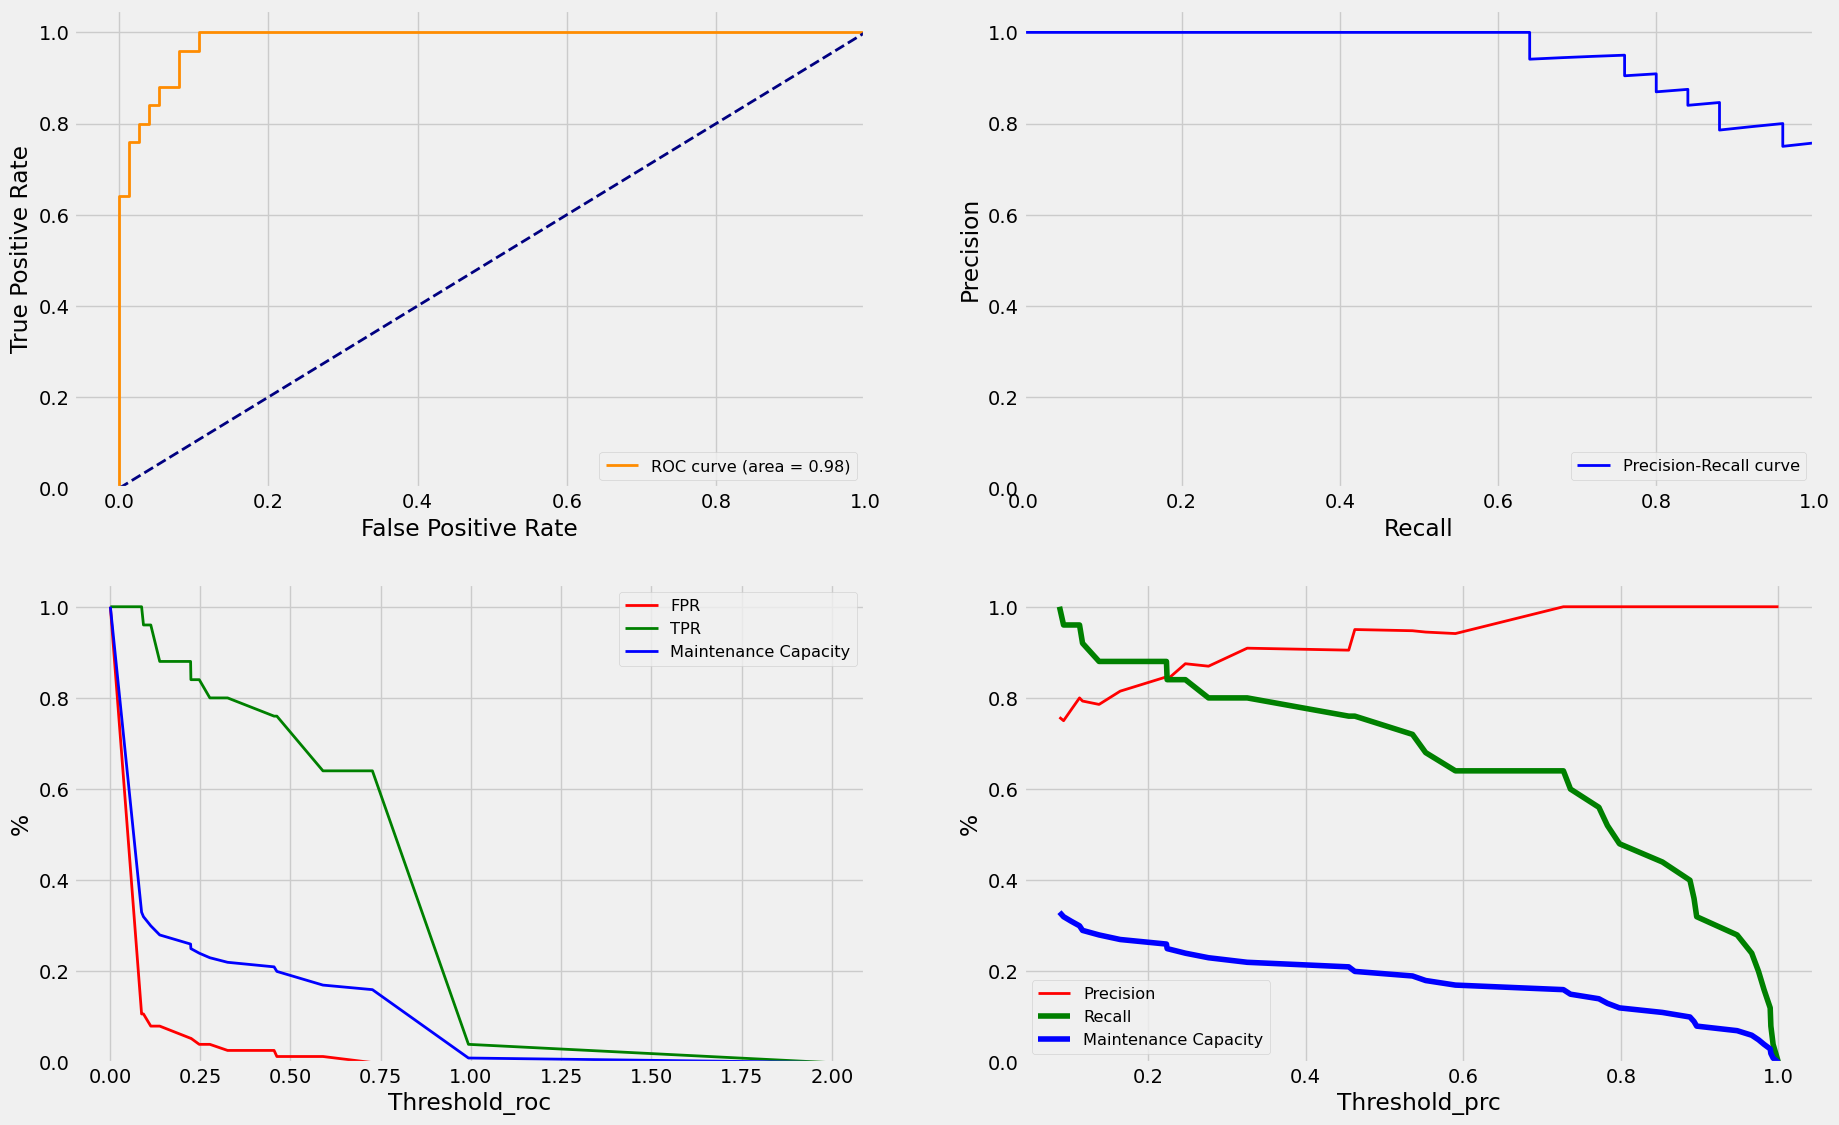

In [30]:
# Random Forest before feature selection plot
metrics_rfcb, roc_rfcb, prc_rfcb = binary_clf_metrics('RandomForest B', y_test_orignal, RandomForestClassifier_df.y_score, RandomForestClassifier_df.y_pred, plot_out=True, print_out=True)

Model: RandomForest A

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
            RandomForest A
 Accuracy         0.910000
 Precision        0.944444
 Recall           0.680000
 F1               0.790698
 ROC AUC          0.981867

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         2.000000   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         1.000000   2.0   0.0  75.0  23.0  0.08  0.000000  1.000000  0.92   
2         0.847857  15.0   0.0  75.0  10.0  0.60  0.000000  1.000000  0.40   
3         0.845500  15.0   1.0  74.0  10.0  0.60  0.013333  0.986667  0.40   
4        

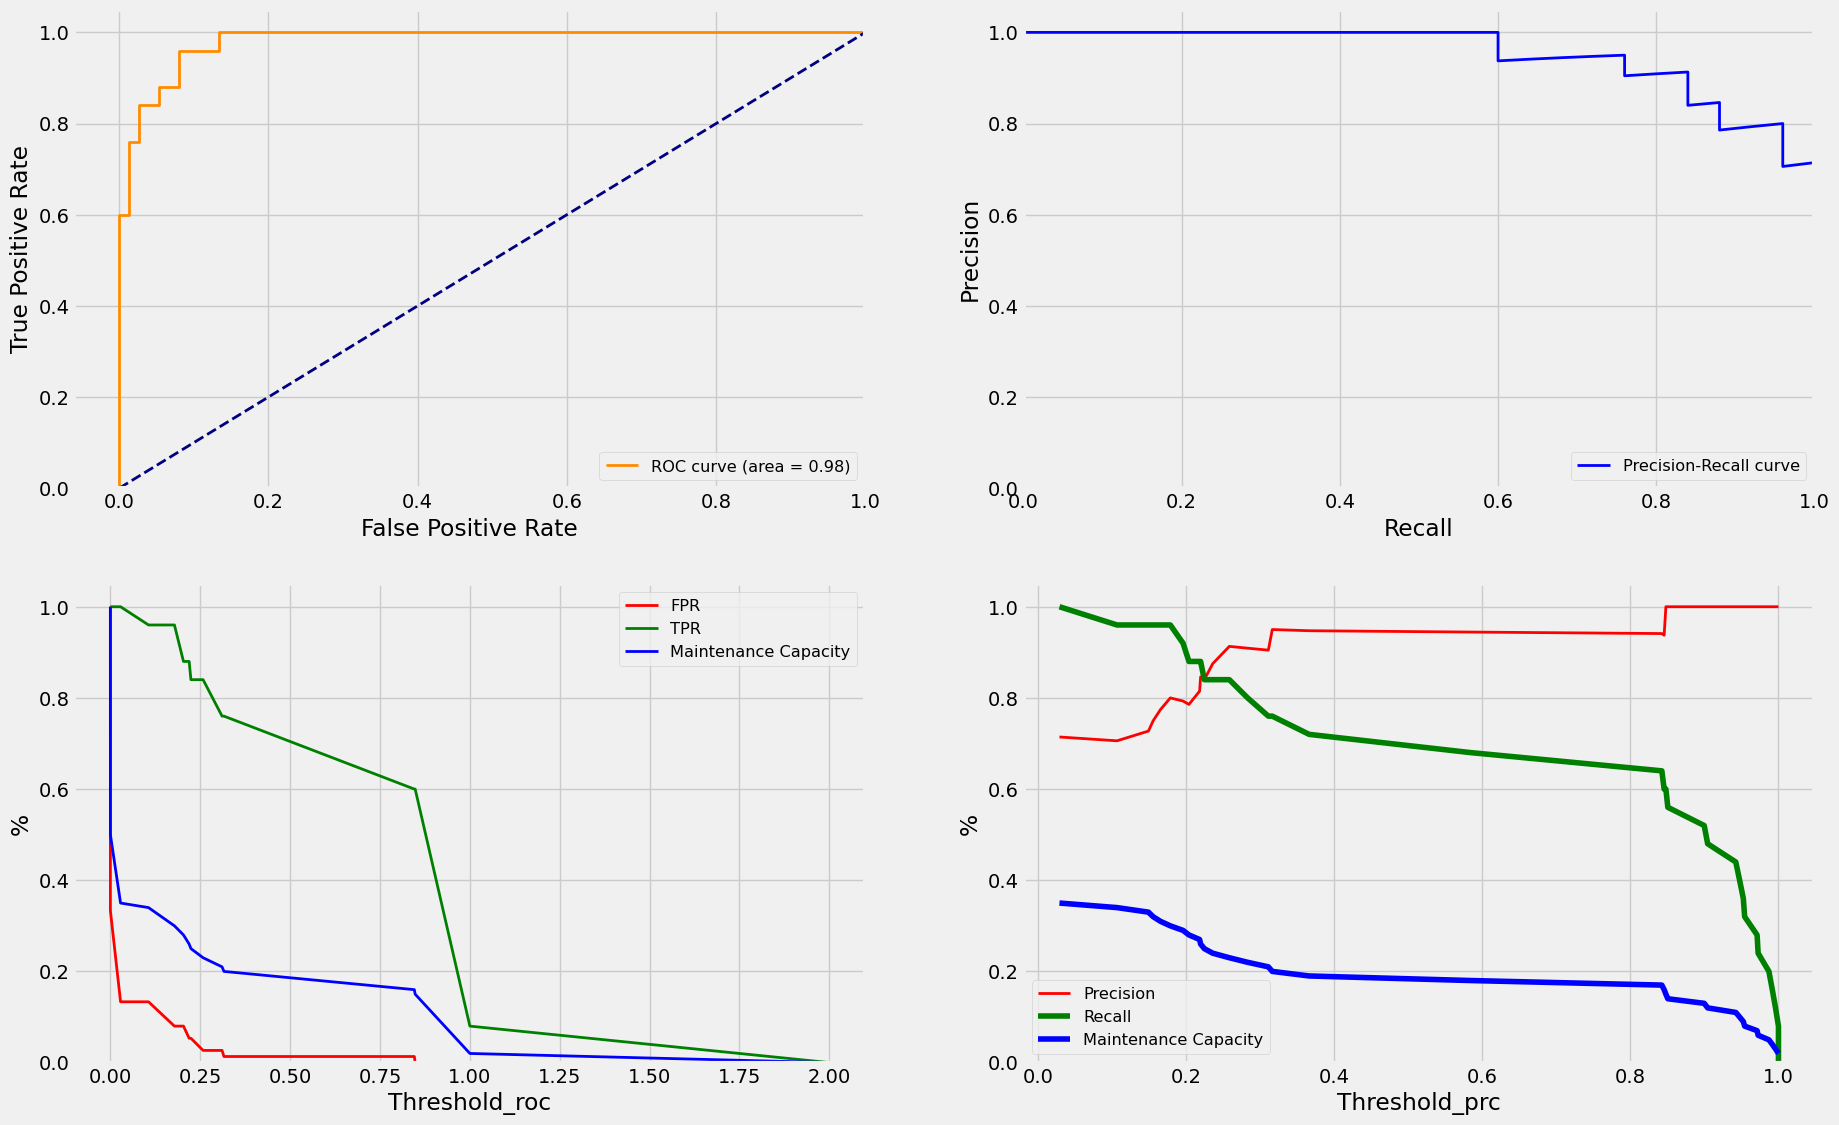

In [31]:
# Random Forest after feature selection plot
metrics_rfca, roc_rfca, prc_rfca = binary_clf_metrics('RandomForest A', y_test_all, RandomForestClassifier_df1.y_score, RandomForestClassifier_df1.y_pred, plot_out=True, print_out=True)

In [32]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

RandomForest B  RandomForest A
 Accuracy         0.920000        0.910000
 Precision        0.947368        0.944444
 Recall           0.720000        0.680000
 F1               0.818182        0.790698
 ROC AUC          0.982933        0.981867

#### KNN

Model: KNN B

Confusion Matrix:
[[73  2]
 [ 7 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        75
           1       0.90      0.72      0.80        25

    accuracy                           0.91       100
   macro avg       0.91      0.85      0.87       100
weighted avg       0.91      0.91      0.91       100


Metrics:
               KNN B
 Accuracy   0.910000
 Precision  0.900000
 Recall     0.720000
 F1         0.800000
 ROC AUC    0.984533

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0             2.00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1             1.00   4.0   0.0  75.0  21.0  0.16  0.000000  1.000000  0.84   
2             0.98   5.0   0.0  75.0  20.0  0.20  0.000000  1.000000  0.80   
3             0.96   9.0   0.0  75.0  16.0  0.36  0.000000  1.000000  0.64   
4             0.94  10.0   0.0  75.0  15.0  0.40  0.00

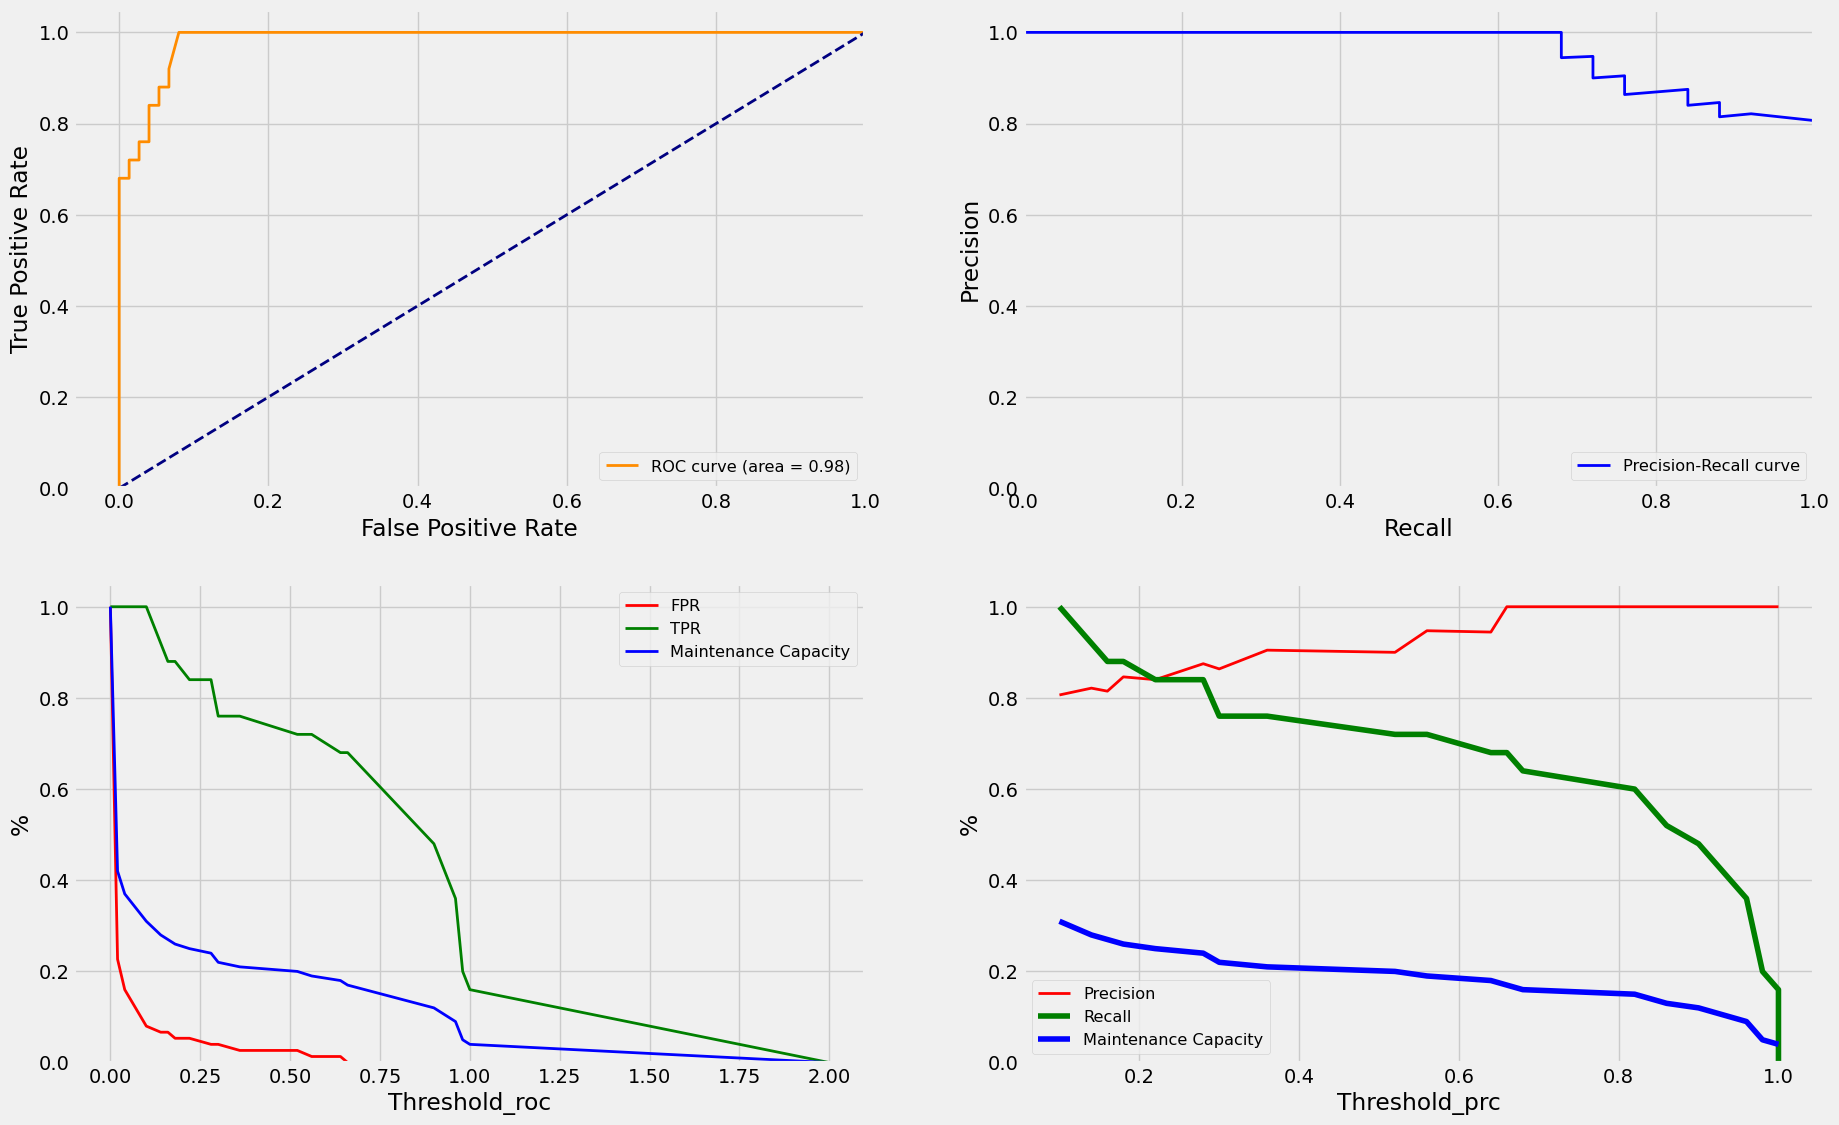

In [33]:
# KNN before feature selection plot
metrics_knnb, roc_knnb, prc_knnb = binary_clf_metrics('KNN B', y_test_orignal, KNN_df.y_score, KNN_df.y_pred, plot_out=True, print_out=True)

Model: KNN A

Confusion Matrix:
[[74  1]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        75
           1       0.94      0.64      0.76        25

    accuracy                           0.90       100
   macro avg       0.92      0.81      0.85       100
weighted avg       0.90      0.90      0.89       100


Metrics:
               KNN A
 Accuracy   0.900000
 Precision  0.941176
 Recall     0.640000
 F1         0.761905
 ROC AUC    0.982933

ROC Thresholds:

   thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0             2.0   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1             1.0   8.0   0.0  75.0  17.0  0.32  0.000000  1.000000  0.68   
2             0.9  14.0   0.0  75.0  11.0  0.56  0.000000  1.000000  0.44   
3             0.8  15.0   0.0  75.0  10.0  0.60  0.000000  1.000000  0.40   
4             0.7  15.0   1.0  74.0  10.0  0.60  0.013333  

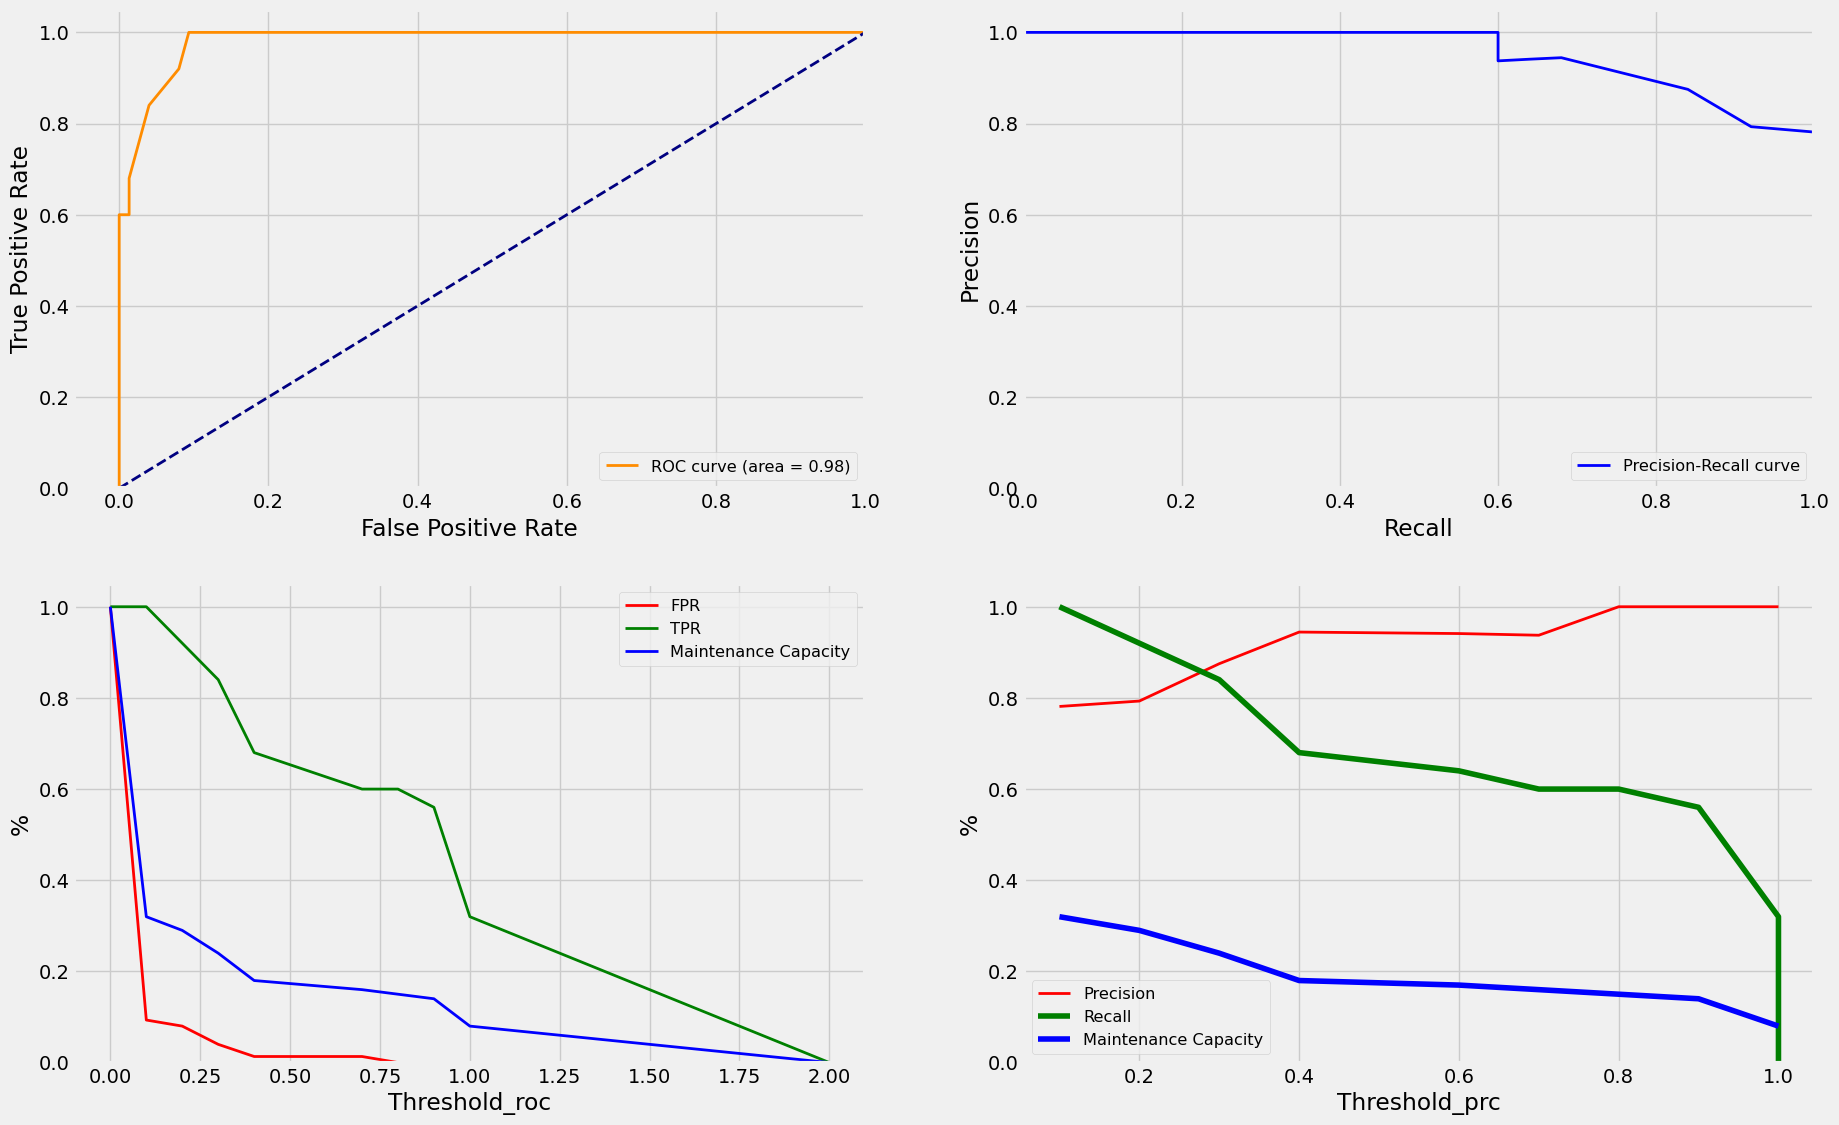

In [34]:
# KNN after feature selection plot
metrics_knna, roc_knna, prc_knna = binary_clf_metrics('KNN A', y_test_all, KNN_df1.y_score, KNN_df1.y_pred, plot_out=True, print_out=True)

In [35]:
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn

KNN B     KNN A
 Accuracy   0.910000  0.900000
 Precision  0.900000  0.941176
 Recall     0.720000  0.640000
 F1         0.800000  0.761905
 ROC AUC    0.984533  0.982933

#### GaussianNB

Model: GaussianNB B

Confusion Matrix:
[[62 13]
 [ 0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        75
           1       0.66      1.00      0.79        25

    accuracy                           0.87       100
   macro avg       0.83      0.91      0.85       100
weighted avg       0.91      0.87      0.88       100


Metrics:
            GaussianNB B
 Accuracy       0.870000
 Precision      0.657895
 Recall         1.000000
 F1             0.793651
 ROC AUC        0.987733

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         2.000000   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         1.000000  15.0   0.0  75.0  10.0  0.60  0.000000  1.000000  0.40   
2         1.000000  17.0   0.0  75.0   8.0  0.68  0.000000  1.000000  0.32   
3         1.000000  17.0   1.0  74.0   8.0  0.68  0.013333  0.986667  0.32   
4         1.000000  18.

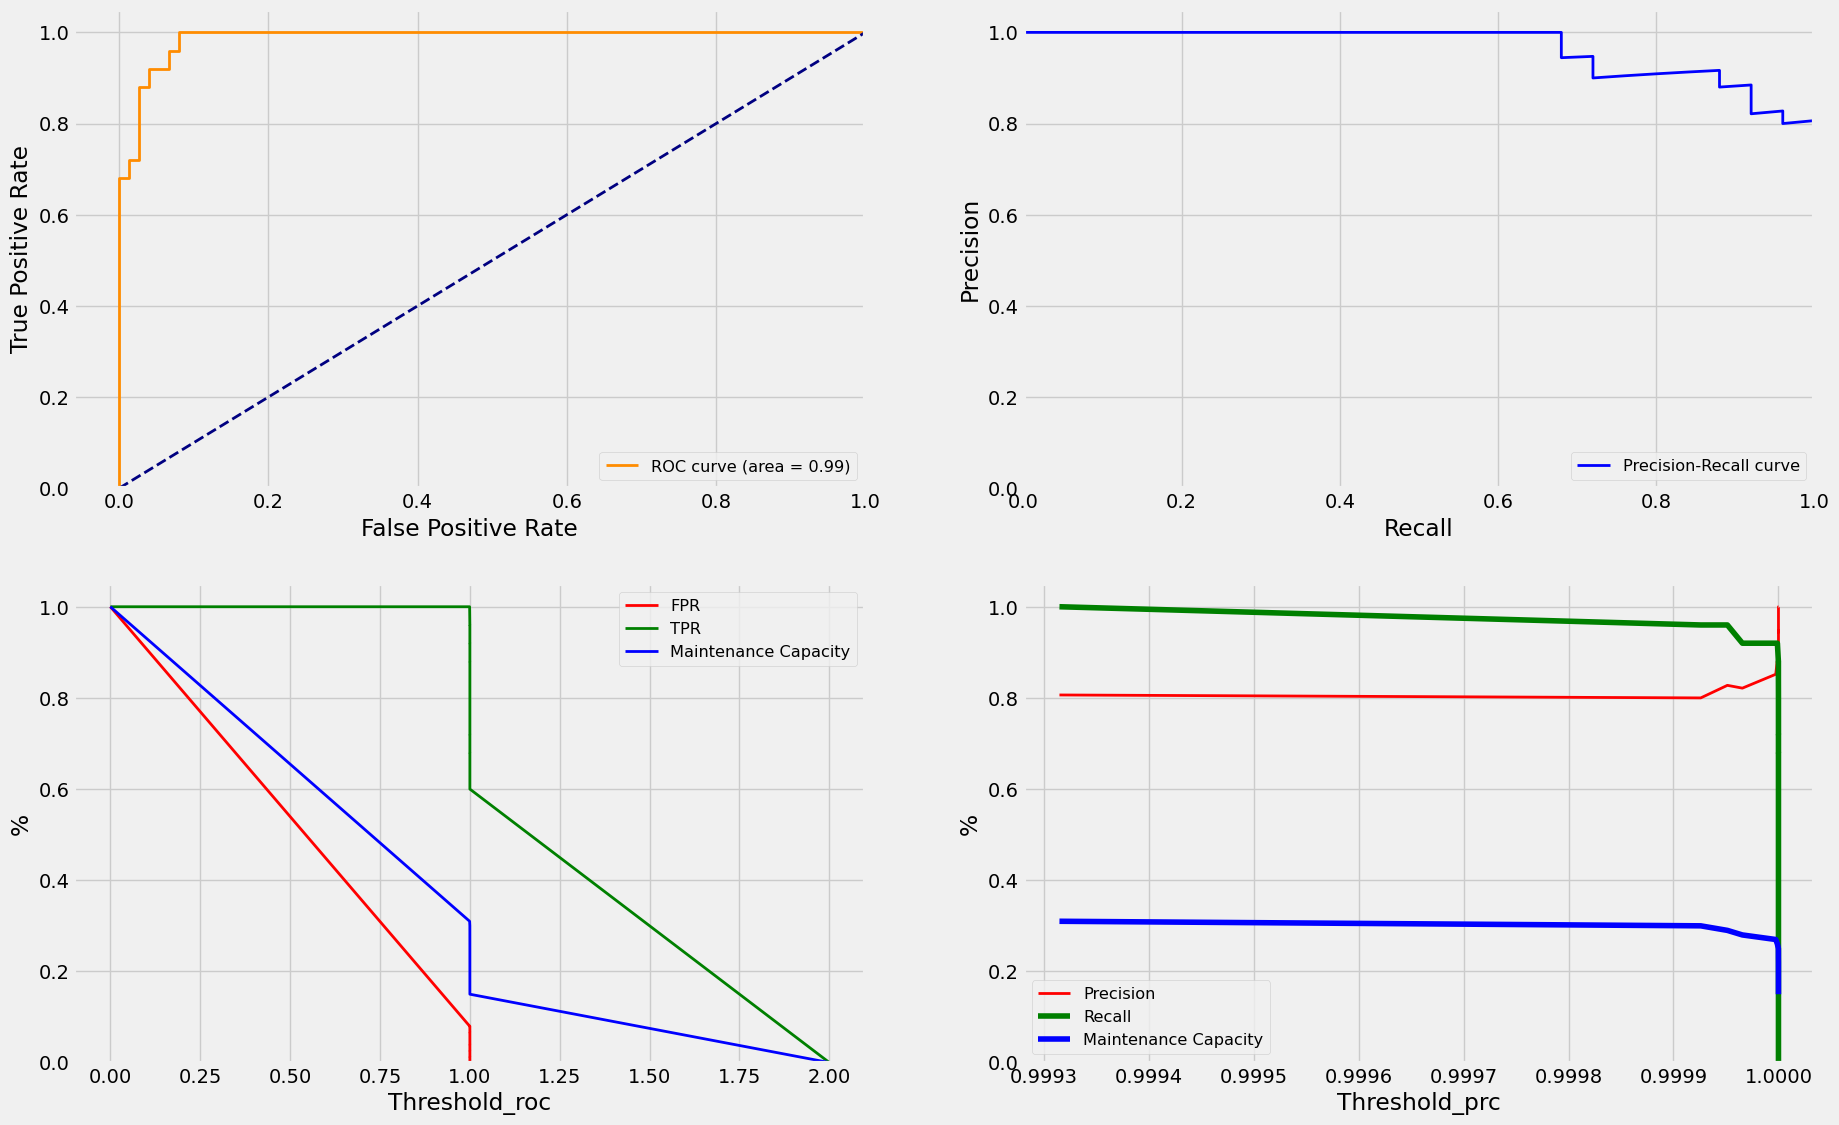

In [36]:
# GaussianNB before feature selection plot
metrics_gnbb, roc_gnbb, prc_gnbb = binary_clf_metrics('GaussianNB B', y_test_orignal, GaussianNB_df.y_score, GaussianNB_df.y_pred, plot_out=True, print_out=True)

Model: GaussianNB A

Confusion Matrix:
[[62 13]
 [ 0 25]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        75
           1       0.66      1.00      0.79        25

    accuracy                           0.87       100
   macro avg       0.83      0.91      0.85       100
weighted avg       0.91      0.87      0.88       100


Metrics:
            GaussianNB A
 Accuracy       0.870000
 Precision      0.657895
 Recall         1.000000
 F1             0.793651
 ROC AUC        0.969600

ROC Thresholds:

   thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0    2.000000e+00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1    1.000000e+00  24.0   4.0  71.0   1.0  0.96  0.053333  0.946667  0.04   
2    1.000000e+00  24.0   9.0  66.0   1.0  0.96  0.120000  0.880000  0.04   
3    1.000000e+00  25.0   9.0  66.0   0.0  1.00  0.120000  0.880000  0.00   
4    1.419251e-65  25.0  69.

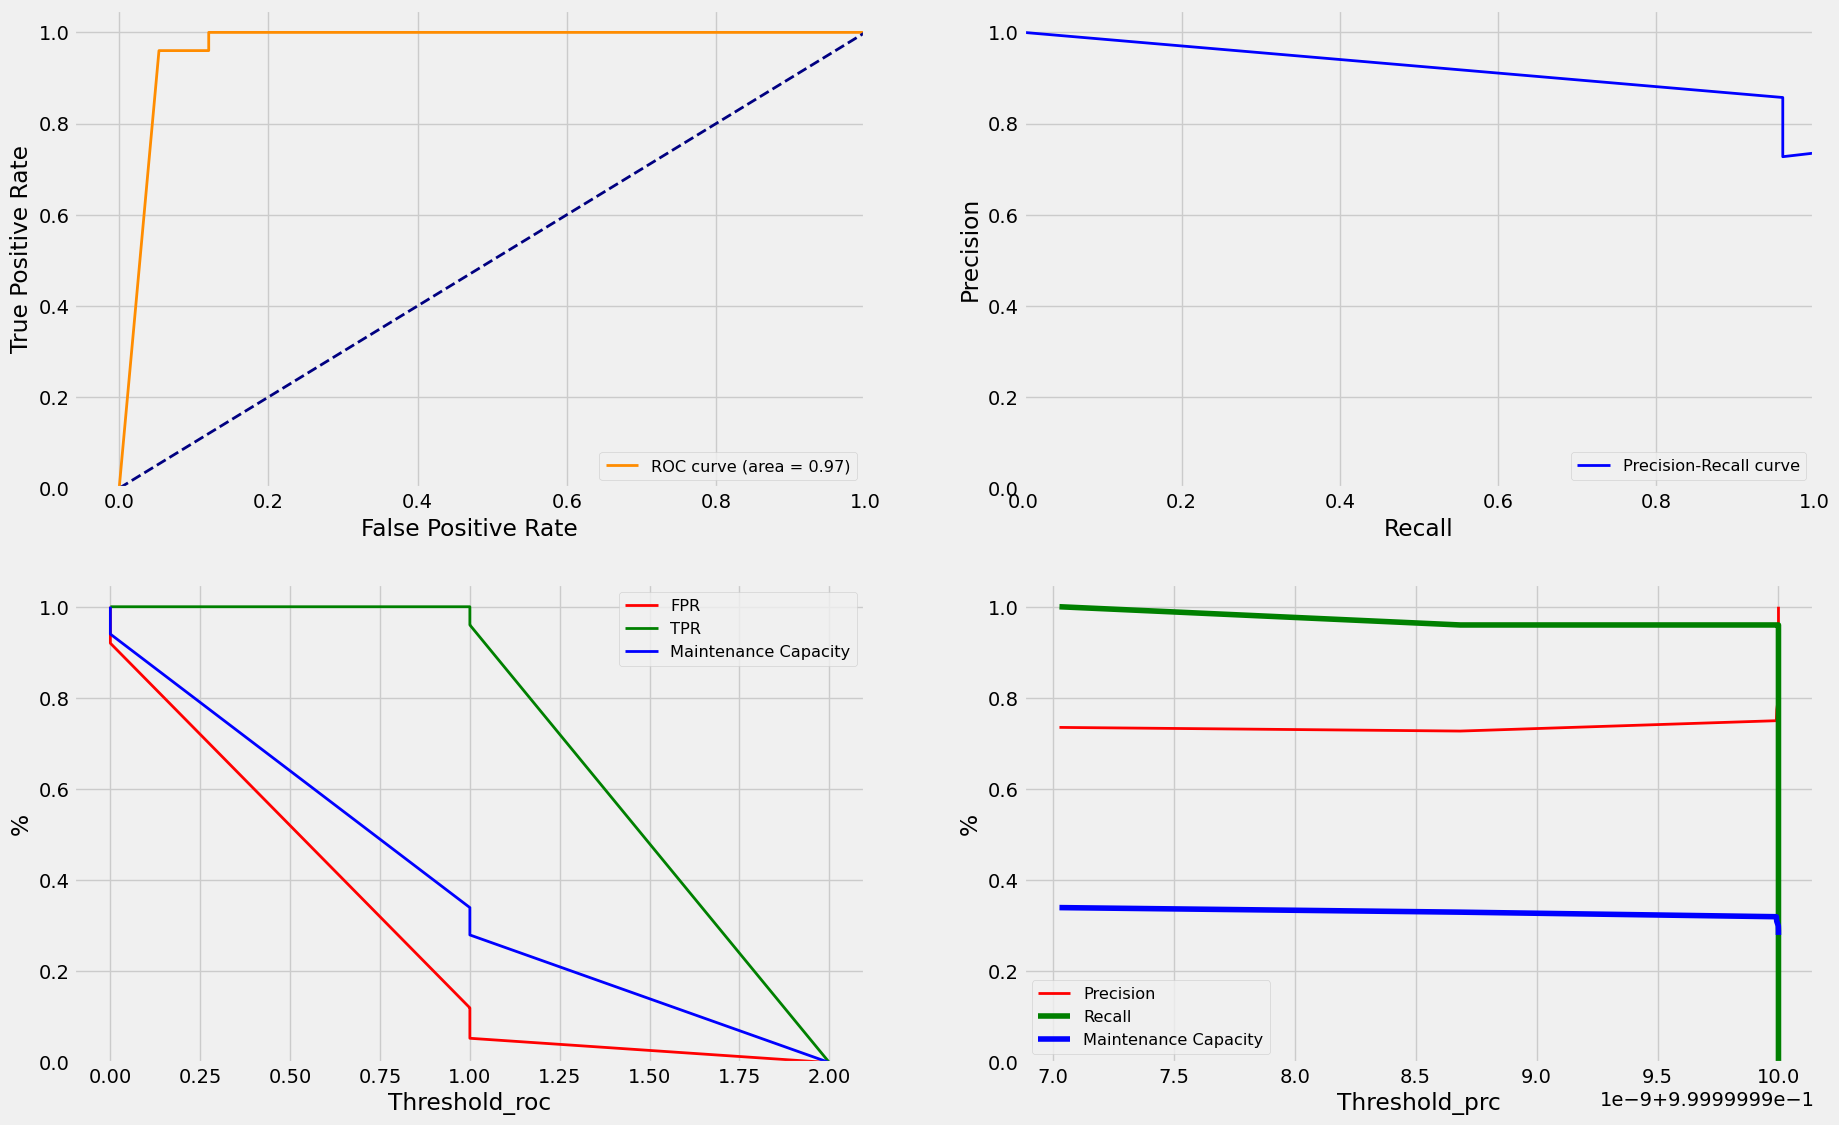

In [37]:
# GaussianNB after feature selection plot
metrics_gnna, roc_gnna, prc_gnna = binary_clf_metrics('GaussianNB A', y_test_all, GaussianNB_df1.y_score, GaussianNB_df1.y_pred, plot_out=True, print_out=True)

In [38]:
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnna], axis=1)
metrics_gnb

GaussianNB B  GaussianNB A
 Accuracy       0.870000      0.870000
 Precision      0.657895      0.657895
 Recall         1.000000      1.000000
 F1             0.793651      0.793651
 ROC AUC        0.987733      0.969600

#### LightGBM

Model: LGBMClassifier B

Confusion Matrix:
[[74  1]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        75
           1       0.94      0.64      0.76        25

    accuracy                           0.90       100
   macro avg       0.92      0.81      0.85       100
weighted avg       0.90      0.90      0.89       100


Metrics:
            LGBMClassifier B
 Accuracy           0.900000
 Precision          0.941176
 Recall             0.640000
 F1                 0.761905
 ROC AUC            0.977600

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         1.992195   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         0.992195   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2         0.759614  16.0   0.0  75.0   9.0  0.64  0.000000  1.000000  0.36   
3         0.481519  16.0   2.0  73.0   9.0  0.64  0.026667  0.973333  0.3

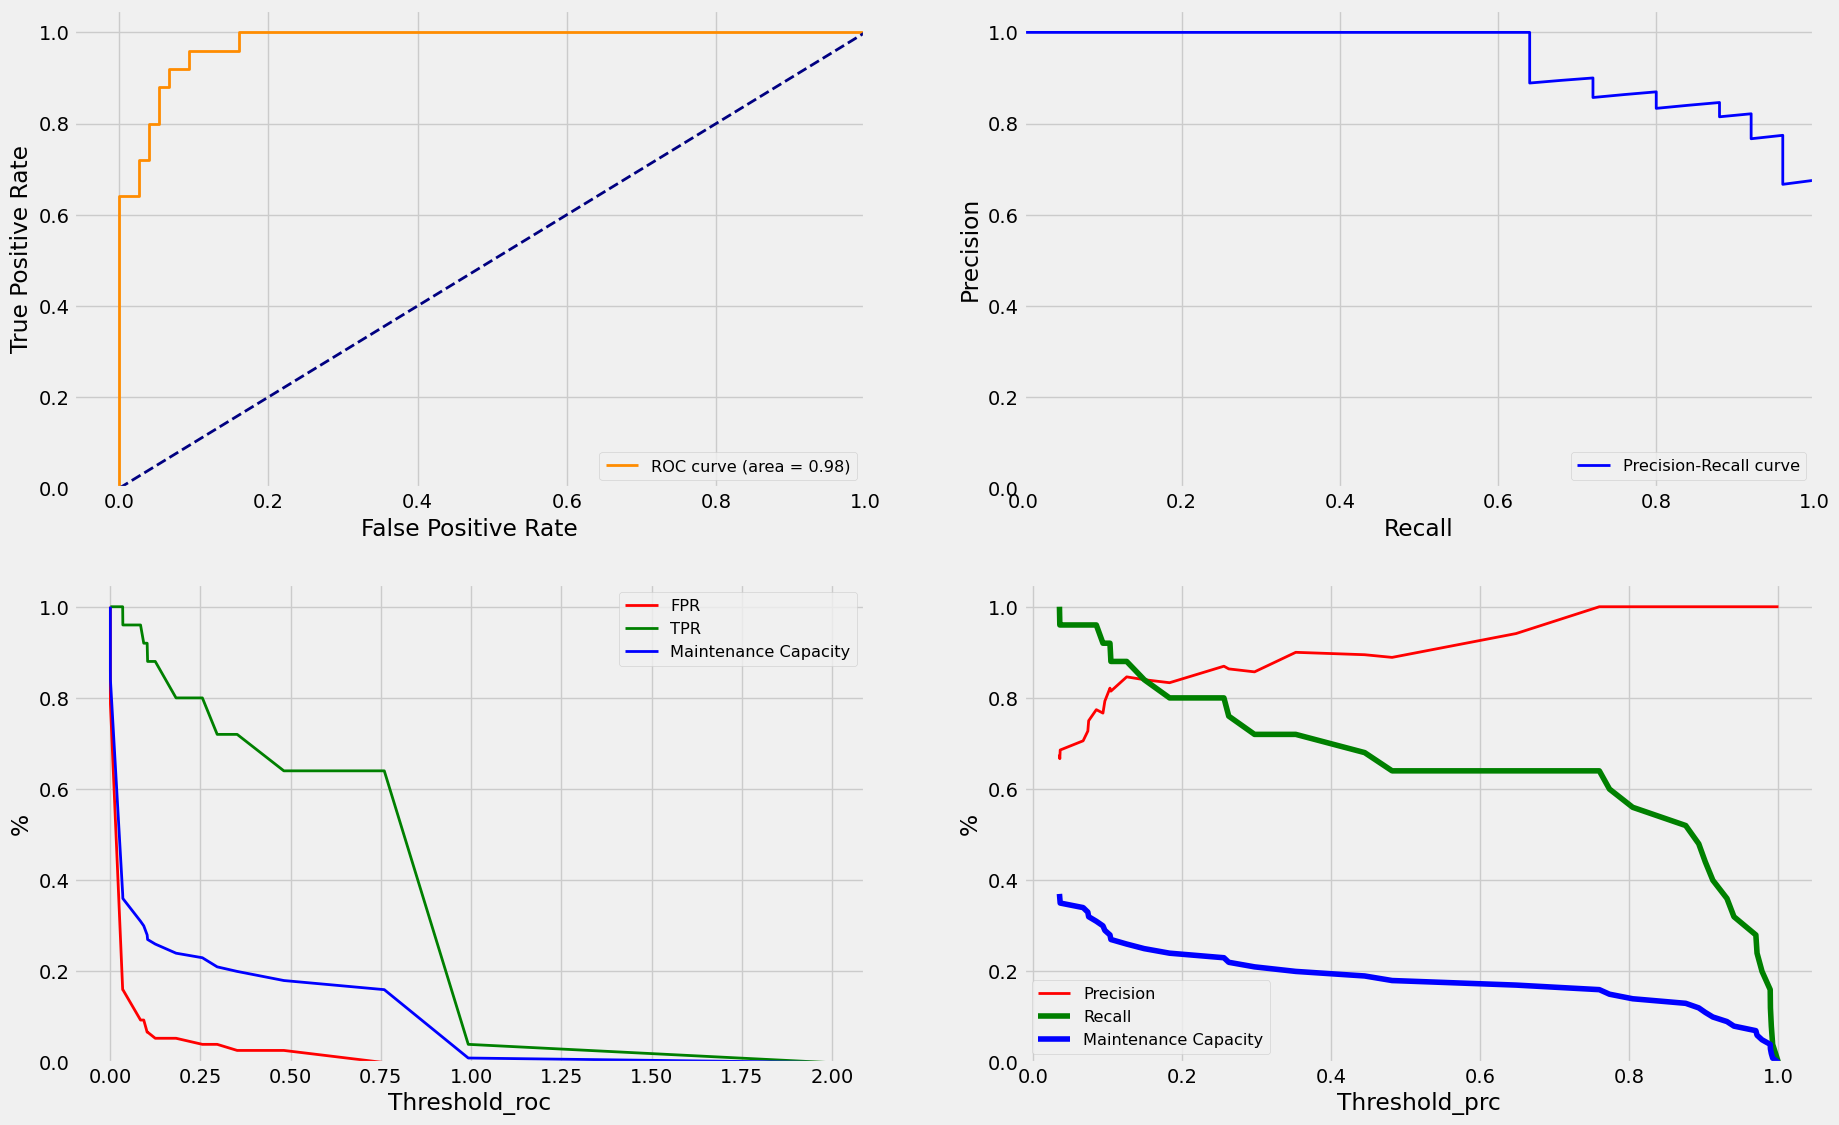

In [39]:
# LGBMClassifier before feature selection plot
metrics_lgbmb, roc_lgbmb, prc_lgbmb = binary_clf_metrics('LGBMClassifier B', y_test_orignal, LGBMClassifier_df.y_score, LGBMClassifier_df.y_pred, plot_out=True, print_out=True)

Model: LGBMClassifier A

Confusion Matrix:
[[72  3]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        75
           1       0.85      0.68      0.76        25

    accuracy                           0.89       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.89      0.89      0.89       100


Metrics:
            LGBMClassifier A
 Accuracy           0.890000
 Precision          0.850000
 Recall             0.680000
 F1                 0.755556
 ROC AUC            0.971200

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0     2.000000e+00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1     1.000000e+00   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2     9.999908e-01  13.0   0.0  75.0  12.0  0.52  0.000000  1.000000  0.48   
3     9.999707e-01  13.0   1.0  74.0  12.0  0.52  0.013333  0.986667  0.4

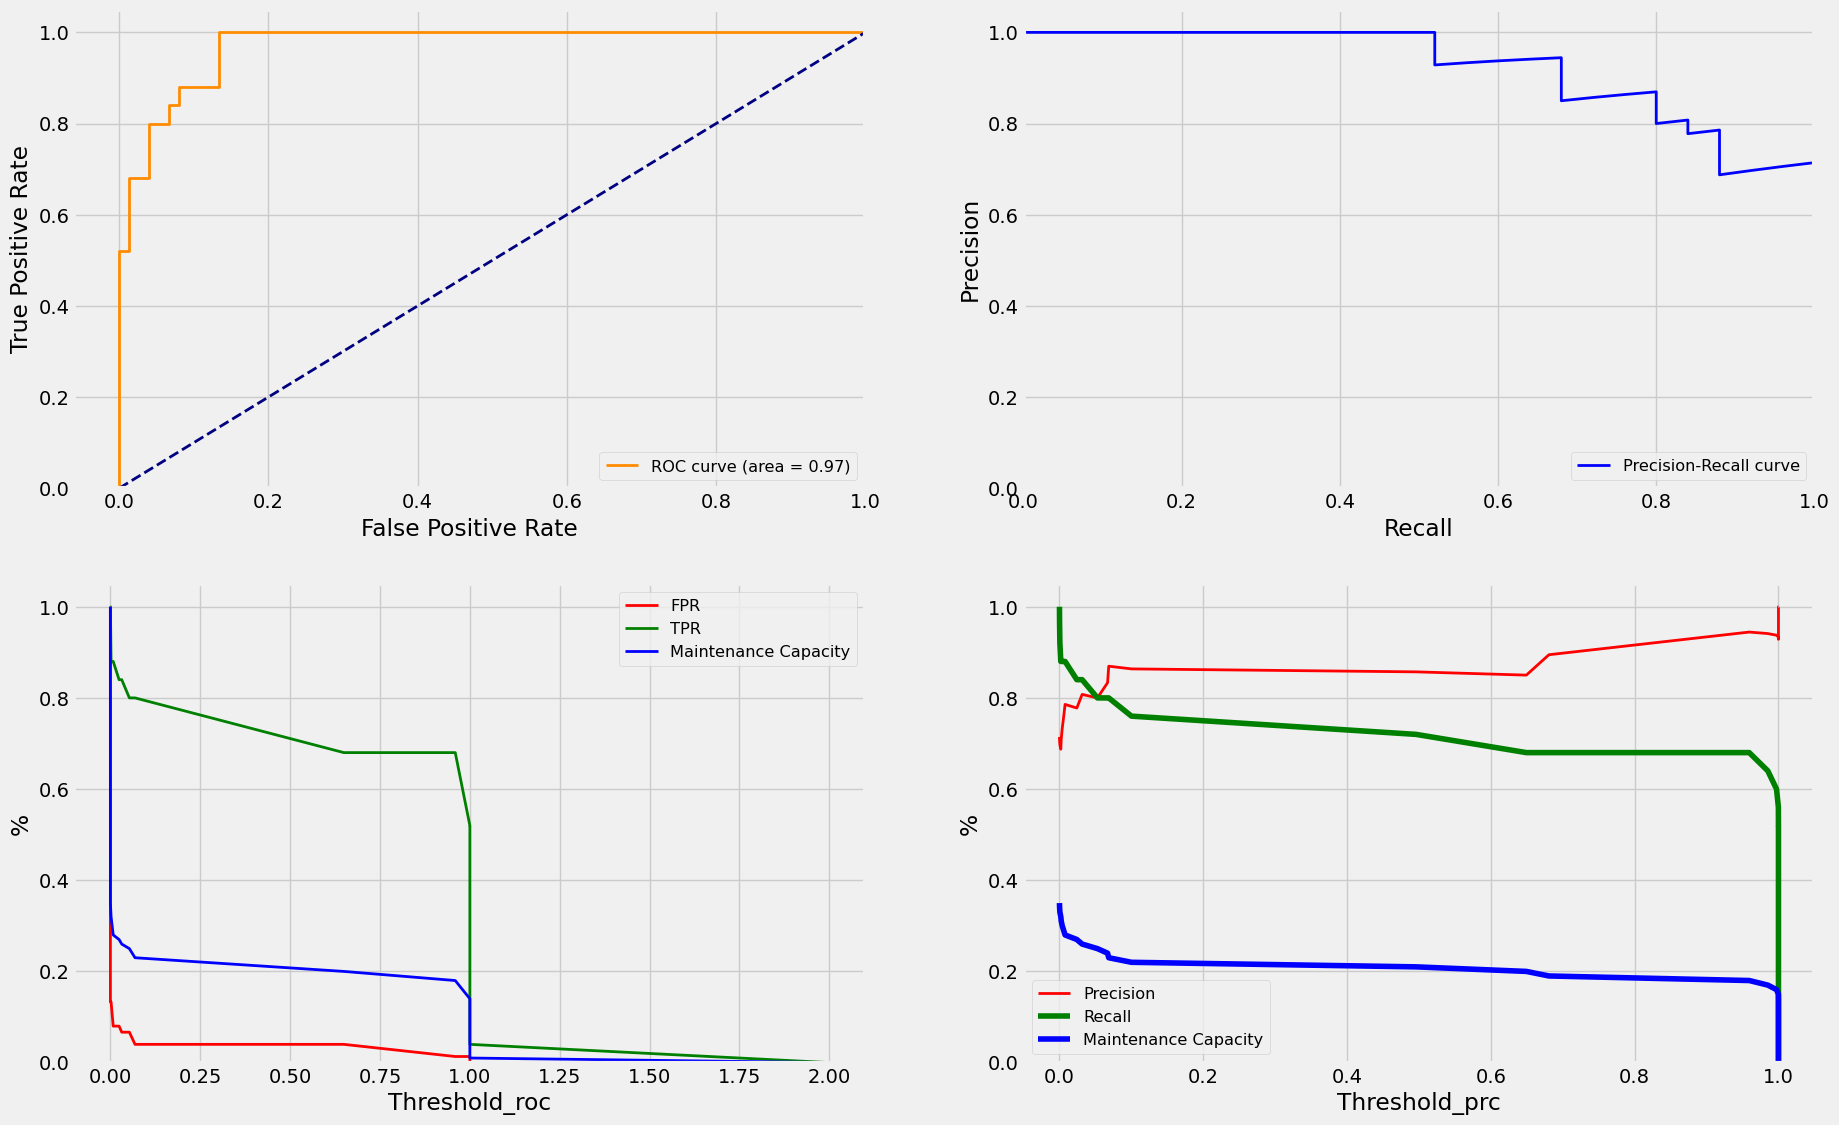

In [40]:
# LGBMClassifier after feature selection plot
metrics_lgbma, roc_lgbma, prc_lgbma = binary_clf_metrics('LGBMClassifier A', y_test_all, LGBMClassifier_df1.y_score, LGBMClassifier_df1.y_pred, plot_out=True, print_out=True)

In [41]:
metrics_lgbm = pd.concat([metrics_lgbmb, metrics_lgbma], axis=1)
metrics_lgbm

LGBMClassifier B  LGBMClassifier A
 Accuracy           0.900000          0.890000
 Precision          0.941176          0.850000
 Recall             0.640000          0.680000
 F1                 0.761905          0.755556
 ROC AUC            0.977600          0.971200

#### XGBClassifier

Model: XGBClassifier B

Confusion Matrix:
[[75  0]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       1.00      0.68      0.81        25

    accuracy                           0.92       100
   macro avg       0.95      0.84      0.88       100
weighted avg       0.93      0.92      0.91       100


Metrics:
            XGBClassifier B
 Accuracy          0.920000
 Precision         1.000000
 Recall            0.680000
 F1                0.809524
 ROC AUC           0.980267

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0         1.977780   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1         0.977780   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2         0.959787   2.0   0.0  75.0  23.0  0.08  0.000000  1.000000  0.92   
3         0.956308   4.0   0.0  75.0  21.0  0.16  0.000000  1.000000  0.84   
4 

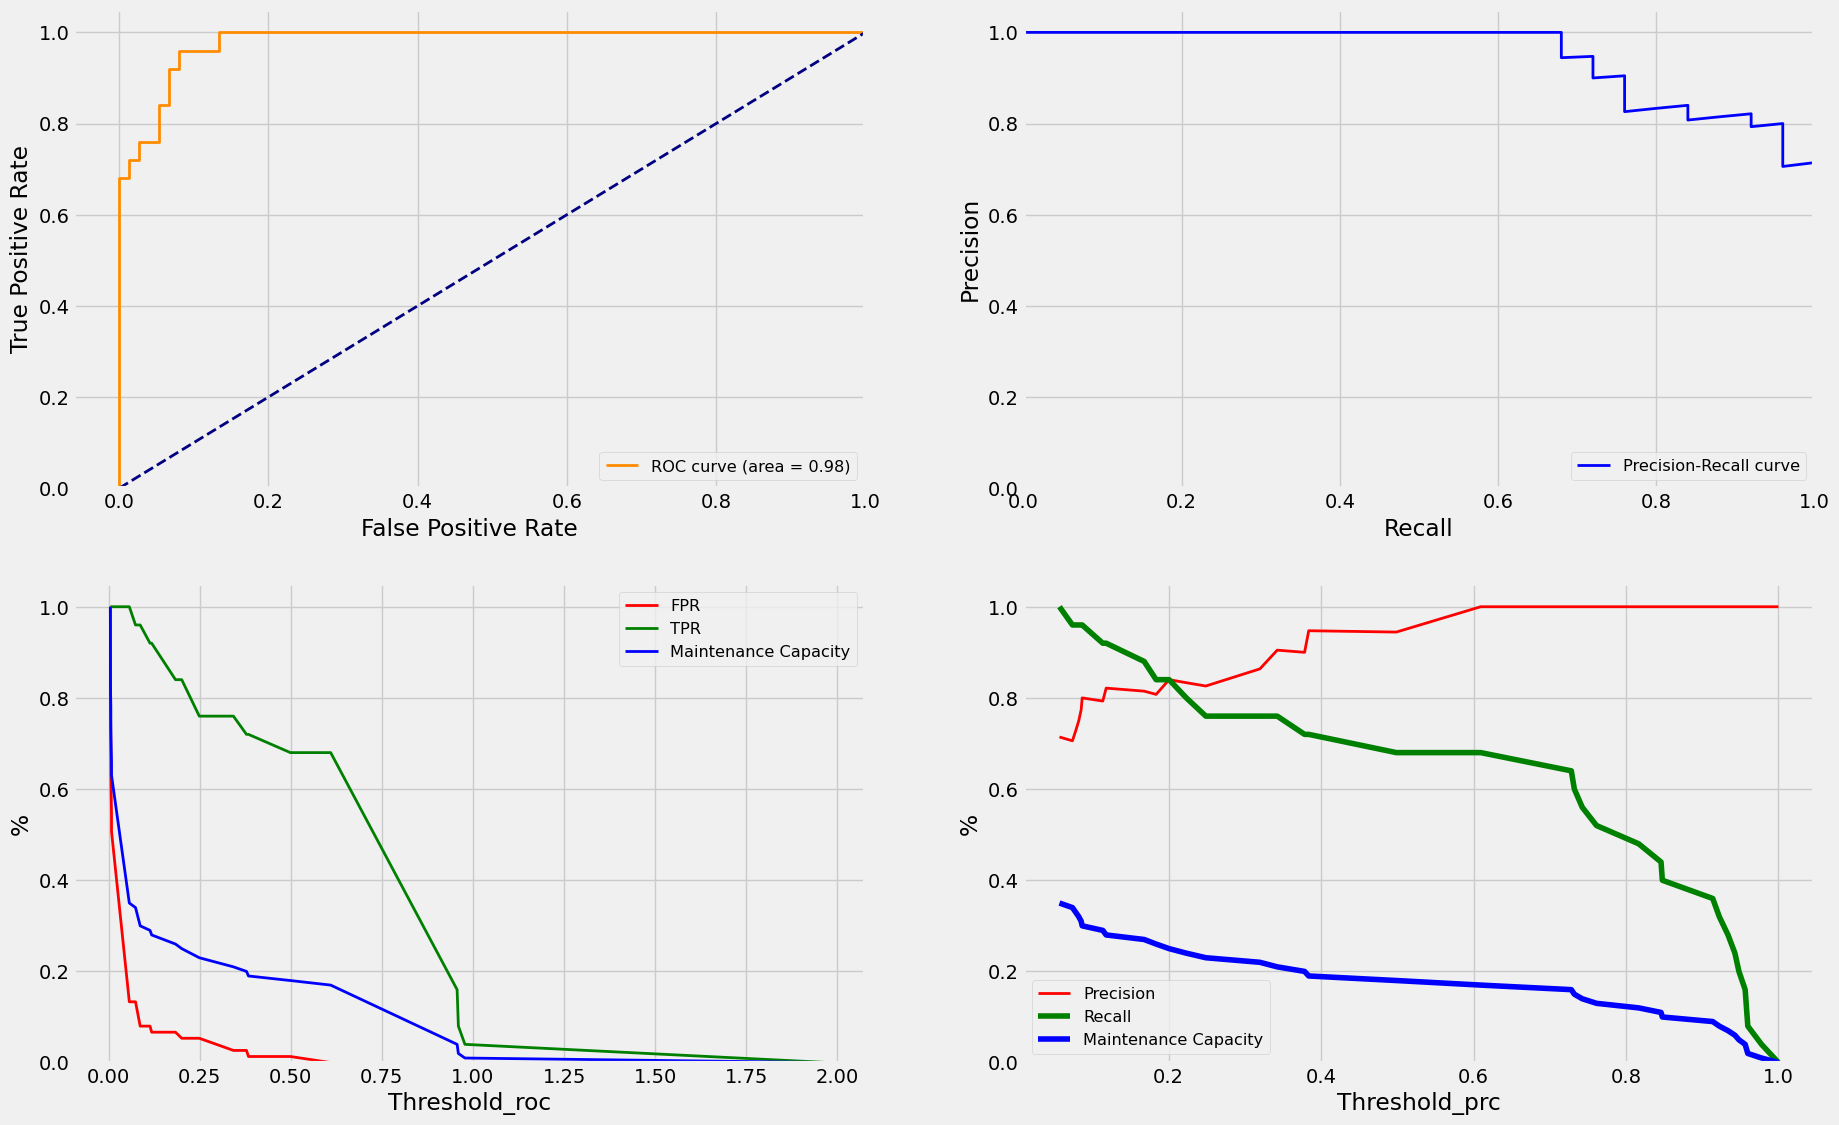

In [42]:
# XGBClassifier before feature selection plot
metrics_xgbcb, roc_xgbcb, prc_xgbcb = binary_clf_metrics('XGBClassifier B', y_test_orignal, XGBClassifier_df.y_score, XGBClassifier_df.y_pred, plot_out=True, print_out=True)

Model: XGBClassifier A

Confusion Matrix:
[[73  2]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        75
           1       0.89      0.68      0.77        25

    accuracy                           0.90       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.90      0.90      0.90       100


Metrics:
            XGBClassifier A
 Accuracy          0.900000
 Precision         0.894737
 Recall            0.680000
 F1                0.772727
 ROC AUC           0.974400

ROC Thresholds:

    thresholds_roc    TP    FP    TN    FN   TPR       FPR       TNR   FNR  \
0     1.999995e+00   0.0   0.0  75.0  25.0  0.00  0.000000  1.000000  1.00   
1     9.999946e-01   1.0   0.0  75.0  24.0  0.04  0.000000  1.000000  0.96   
2     9.994844e-01  13.0   0.0  75.0  12.0  0.52  0.000000  1.000000  0.48   
3     9.994017e-01  13.0   1.0  74.0  12.0  0.52  0.013333  0.986667  0.48   
4 

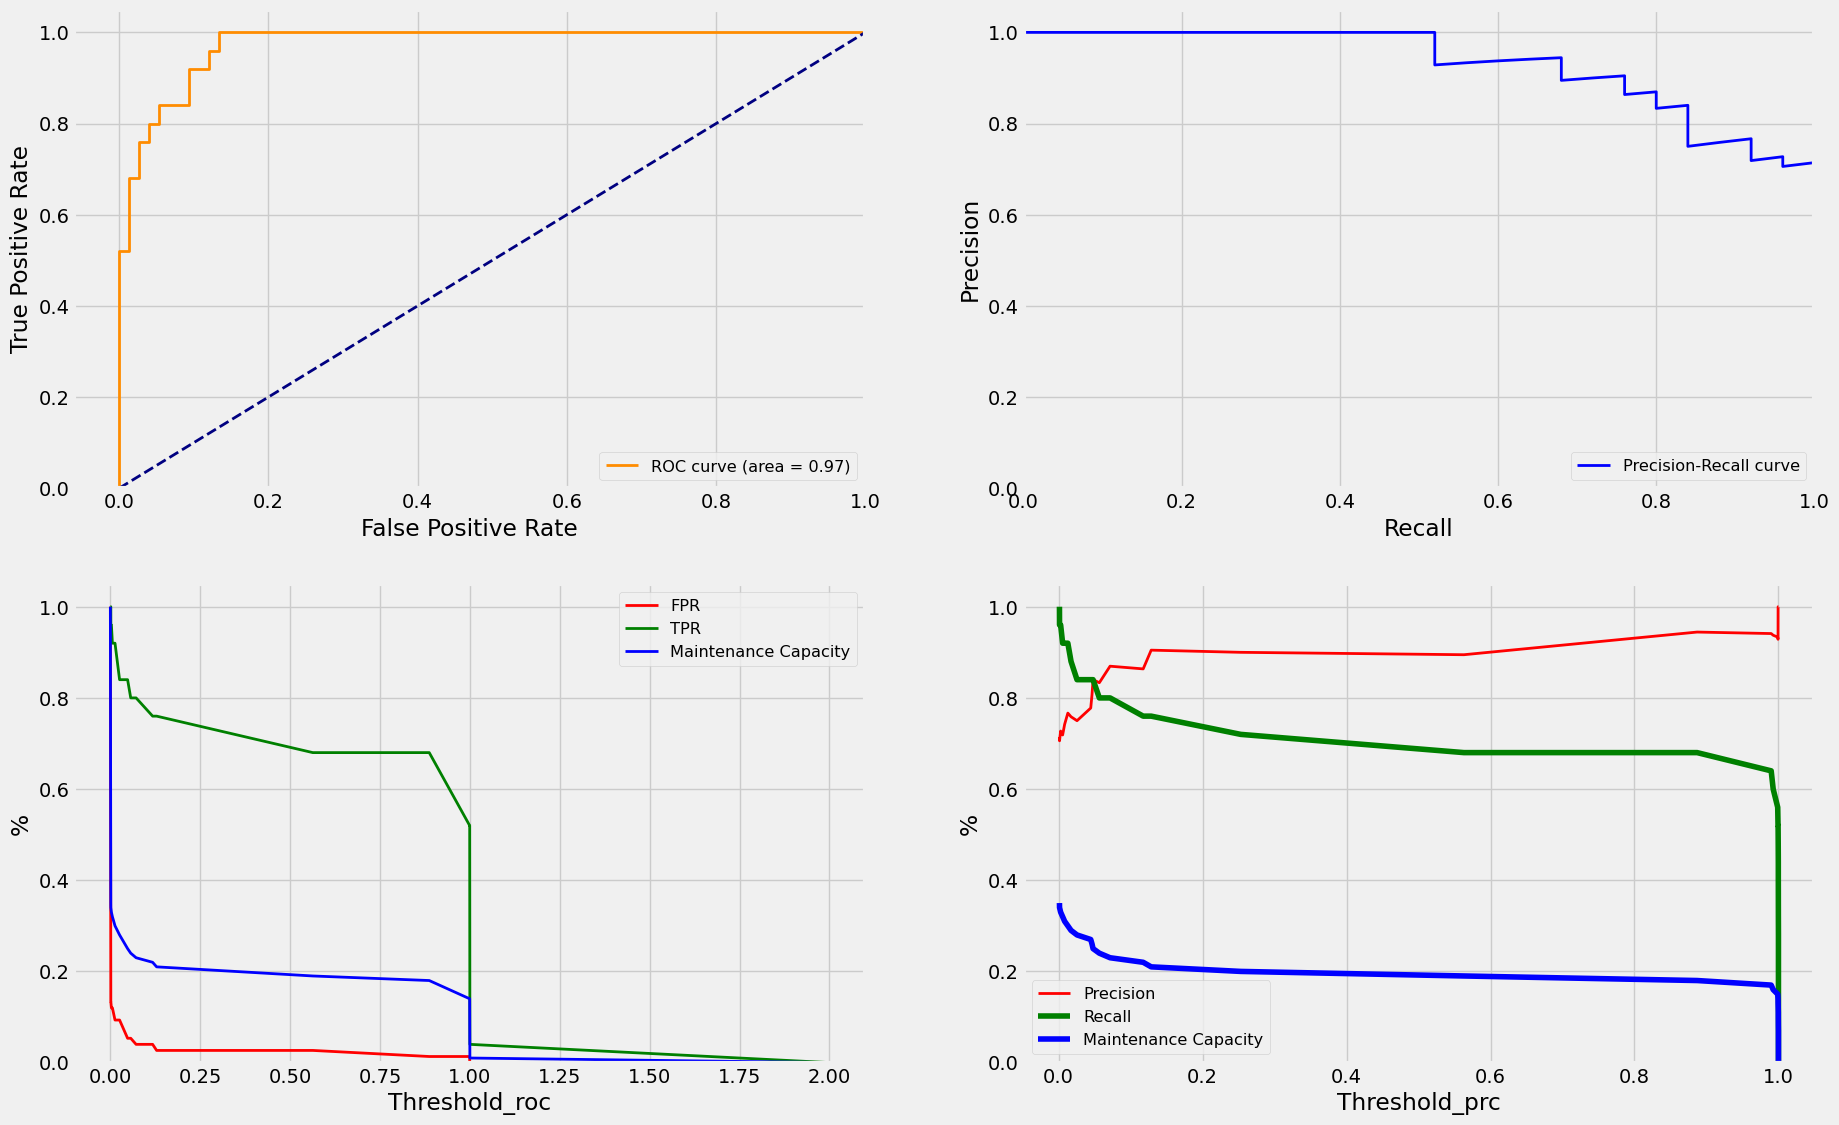

In [43]:
# XGBClassifier after feature selection plot
metrics_xgbca, roc_xgbca, prc_xgbca = binary_clf_metrics('XGBClassifier A', y_test_all, XGBClassifier_df1.y_score, XGBClassifier_df1.y_pred, plot_out=True, print_out=True)

In [44]:
metrics_xgbc = pd.concat([metrics_xgbcb, metrics_xgbca], axis=1)
metrics_xgbc

XGBClassifier B  XGBClassifier A
 Accuracy          0.920000         0.900000
 Precision         1.000000         0.894737
 Recall            0.680000         0.680000
 F1                0.809524         0.772727
 ROC AUC           0.980267         0.974400

### Compare all binary classification algorithms

In [45]:
# combine all metrics
binclf_metric = pd.concat([metrics_lgr, metrics_dct, metrics_rfc, metrics_knn, metrics_gnb, metrics_lgbm, metrics_xgbc], axis=1)
binclf_metric

LogisticRegression B  LogisticRegression A  DecisionTree B  \
 Accuracy               0.920000              0.920000        0.920000   
 Precision              0.947368              0.947368        0.947368   
 Recall                 0.720000              0.720000        0.720000   
 F1                     0.818182              0.818182        0.818182   
 ROC AUC                0.978133              0.983467        0.933333   

            DecisionTree A  RandomForest B  RandomForest A     KNN B  \
 Accuracy         0.910000        0.920000        0.910000  0.910000   
 Precision        0.944444        0.947368        0.944444  0.900000   
 Recall           0.680000        0.720000        0.680000  0.720000   
 F1               0.790698        0.818182        0.790698  0.800000   
 ROC AUC          0.920000        0.982933        0.981867  0.984533   

               KNN A  GaussianNB B  GaussianNB A  LGBMClassifier B  \
 Accuracy   0.900000      0.870000      0.870000          0.900000   
 Precision  0.941176      0.657895      0.657895          0.941176   
 Recall     0.640000      1.000000      1.000000          0.640000   
 F1         0.761905      0.793651      0.793651          0.761905   
 ROC AUC    0.982933      0.987733      0.969600          0.977600   

            LGBMClassifier A  XGBClassifier B  XGBClassifier A  
 Accuracy           0.890000         0.920000         0.900000  
 Precision          0.850000         1.000000         0.894737  
 Recall             0.680000         0.680000         0.680000  
 F1                 0.755556         0.809524         0.772727  
 ROC AUC            0.971200         0.980267         0.974400

- The **GaussianNB B** algorithm has the highest AUC-ROC with **0.9877**,  **KNN B** comes second with **0.9845**.
- LogisticRegression A has scored third higher with **0.9834** and it's our base model so it's prettiy good.
- all models except LogisticRegression after feature selection have less score than before feature selection.

In [ ]:
metrics_dcta.loc[' ROC AUC'].values.tolist()[0]

0.9199999999999999

In [92]:
metrics_dcta.columns.values.tolist()[0]

'DecisionTree A'

Text(0.5, 1.0, 'Precision Recall Curve')

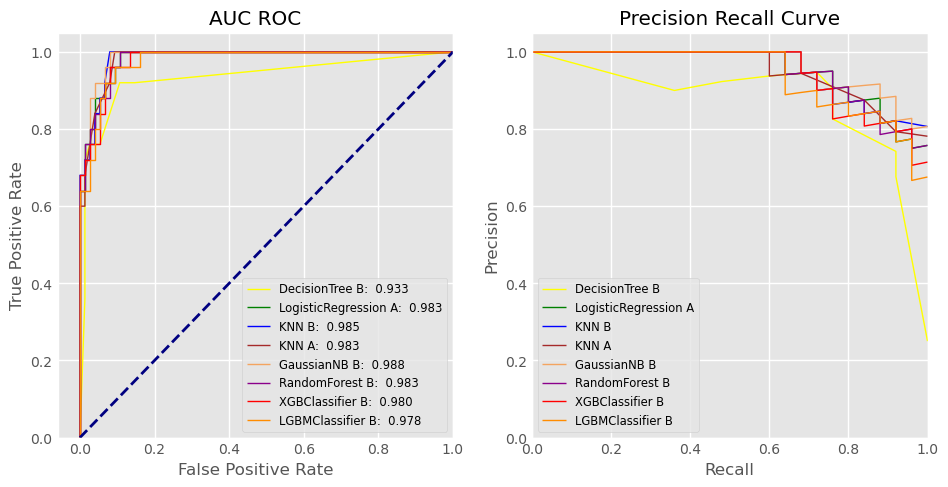

In [46]:
# Plot AUC-ROC and precision-recall curves for best models
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_dctb.FPR, roc_dctb.TPR, color='yellow', lw=1, label= metrics_dctb.columns.values.tolist()[0] + ':  %.3f' % metrics_dctb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_lgra.FPR, roc_lgra.TPR, color='green', lw=1, label= metrics_lgra.columns.values.tolist()[0] + ':  %.3f' % metrics_lgra.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_knnb.FPR, roc_knnb.TPR, color='blue', lw=1, label= metrics_knnb.columns.values.tolist()[0] + ':  %.3f' % metrics_knnb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_knna.FPR, roc_knna.TPR, color='brown', lw=1, label= metrics_knna.columns.values.tolist()[0] + ':  %.3f' % metrics_knna.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='sandybrown', lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % metrics_gnbb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_rfcb.FPR, roc_rfcb.TPR, color='darkmagenta', lw=1, label= metrics_rfcb.columns.values.tolist()[0] + ':  %.3f' % metrics_rfcb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_xgbcb.FPR, roc_xgbcb.TPR, color='red', lw=1, label= metrics_xgbcb.columns.values.tolist()[0] + ':  %.3f' % metrics_xgbcb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot(roc_lgbmb.FPR, roc_lgbmb.TPR, color='darkorange', lw=1, label= metrics_lgbmb.columns.values.tolist()[0] + ':  %.3f' % metrics_lgbmb.loc[' ROC AUC'].values.tolist()[0])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.06, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_dctb.Recall, prc_dctb.Precision, color='yellow', lw=1, label= metrics_dctb.columns.values.tolist()[0])
ax2.plot(prc_lgra.Recall, prc_lgra.Precision, color='green', lw=1, label= metrics_lgra.columns.values.tolist()[0])
ax2.plot(prc_knnb.Recall, prc_knnb.Precision, color='blue', lw=1, label= metrics_knnb.columns.values.tolist()[0])
ax2.plot(prc_knna.Recall, prc_knna.Precision, color='brown', lw=1, label= metrics_knna.columns.values.tolist()[0])
ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='sandybrown', lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfcb.Recall, prc_rfcb.Precision, color='darkmagenta', lw=1, label= metrics_rfcb.columns.values.tolist()[0])
ax2.plot(prc_xgbcb.Recall, prc_xgbcb.Precision, color='red', lw=1, label= metrics_xgbcb.columns.values.tolist()[0])
ax2.plot(prc_lgbmb.Recall, prc_lgbmb.Precision, color='darkorange', lw=1, label= metrics_lgbmb.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')
        

**Binary Classification Summary:**


* All of the binary classifiers except Logistic Regression showed better performance metrics without the addition of new features.  

* Logistic Regression and Naive Bayes showed same performance before and after feature engineering with all metrics except AUC. 
 
* Naive Bayes scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision. 

* XGBClassifier (before feature engineering) scored better than other classifier in Precision.

* Logistic Regression B\A, DecisionTree B, and RandomForest B showed same performance in Precision and F1-Score, which is the highest in all f1scores.

* The GaussianNB B algorithm has the highest AUC-ROC with 0.9877,  KNN B comes second with 0.9845.

* Logistic Regression B has precision-recall curve operating at threshold 0.57, giving  %100 precision and %76 recall, targeting %19 of the engines.

* KNN A has precision-recall curve operating at threshold 0.8, giving  %100 precision and %60 recall, targeting %17 of the engines.

* The graphs for TPR, FPR, and Engines should be linked to cost matrix of (TP, FP, TN, FN) to calculate the expected value at different operating points (thresholds) to help optimizing business decisions.


## Expected Value Calculation

Based on the book: [Data Science for Business](https://www.amazon.com/Data-Science-Business-Data-Analytic-Thinking/dp/1449361323), Expected Value is a method to compare different classification models by constructing cost-benefit matrix in line with the confusion matrix, and then convert model performance to a single monetary value by multiplying confusion matrix into the cost-benefit matrix.  

**Expected Profit = Prop(+ve) x [TPR x benefit(TP) + FNR x cost(FN)] + Prob(-ve) x [TNR x benefit(TN) + FPR x cost(FP)].**


Cost-benefit matrix should be designed by domain expert. Let us assume the following:  

- True Positive (TP) has benefit of USD 300K:  engines that need maintenance and correctly selected by the model.  
- True Negative (TN) has benefit of USD 0K: engines that are OK and not selected by the model.
- False Positive (FP) has cost of USD -100K: engines that are OK but selected by the model.
- False Negative (FN) has cost of USD -200K: engines that need maintenance but not selected by the model.

No. of positive class instances in the test data = 25  
No. of negative class instances in the test data = 75

In [47]:
TPb = 300
TNb = 0
FPc = -100
FNc = -200

prob_positive = 0.25 
prop_negative = 0.75

In [49]:
df_max_profit = pd.DataFrame()

roc_dfs = [roc_lgrb, roc_lgra, roc_dctb, roc_dcta, roc_rfcb, roc_rfca, roc_knnb, roc_knna, roc_gnbb, roc_gnna, roc_lgbmb, roc_lgbma, roc_xgbcb, roc_xgbca]

for df in roc_dfs:
    df['Profit'] = prob_positive * (df.TPR * TPb + df.FNR * FNc) + prop_negative * (df.TNR * TNb + df.FPR * FPc)
    df_max = df[df.Profit == df.Profit.max()]
    df_max.sort_values(by=['maintenance_capacity_roc'], ascending=True, inplace=True)
    df_max = df_max.head(1)
    df_max_profit = pd.concat([df_max_profit, df_max], ignore_index=True)

df_max_profit

thresholds_roc   TPR       FPR  maintenance_capacity_roc    TP    FP  \
0         0.028371  1.00  0.160000                      0.37  25.0  12.0   
1         0.031909  1.00  0.106667                      0.33  25.0   8.0   
2         0.142703  0.92  0.106667                      0.31  23.0   8.0   
3         0.186567  0.84  0.053333                      0.25  21.0   4.0   
4         0.087504  1.00  0.106667                      0.33  25.0   8.0   
5         0.028361  1.00  0.133333                      0.35  25.0  10.0   
6         0.100000  1.00  0.080000                      0.31  25.0   6.0   
7         0.100000  1.00  0.093333                      0.32  25.0   7.0   
8         0.999315  1.00  0.080000                      0.31  25.0   6.0   
9         1.000000  0.96  0.053333                      0.28  24.0   4.0   
10        0.084652  0.96  0.093333                      0.31  24.0   7.0   
11        0.000078  1.00  0.133333                      0.35  25.0  10.0   
12        0.056875  1.00  0.133333                      0.35  25.0  10.0   
13        0.001251  1.00  0.133333                      0.35  25.0  10.0   

      TN   FN       TNR   FNR                 Model  Profit  
0   63.0  0.0  0.840000  0.00  LogisticRegression B    63.0  
1   67.0  0.0  0.893333  0.00  LogisticRegression A    67.0  
2   67.0  2.0  0.893333  0.08        DecisionTree B    57.0  
3   71.0  4.0  0.946667  0.16        DecisionTree A    51.0  
4   67.0  0.0  0.893333  0.00        RandomForest B    67.0  
5   65.0  0.0  0.866667  0.00        RandomForest A    65.0  
6   69.0  0.0  0.920000  0.00                 KNN B    69.0  
7   68.0  0.0  0.906667  0.00                 KNN A    68.0  
8   69.0  0.0  0.920000  0.00          GaussianNB B    69.0  
9   71.0  1.0  0.946667  0.04          GaussianNB A    66.0  
10  68.0  1.0  0.906667  0.04      LGBMClassifier B    63.0  
11  65.0  0.0  0.866667  0.00      LGBMClassifier A    65.0  
12  65.0  0.0  0.866667  0.00       XGBClassifier B    65.0  
13  65.0  0.0  0.866667  0.00       XGBClassifier A    65.0

In [50]:
colnames = ['Profit', 'Model', 'maintenance_capacity_roc', 'thresholds_roc', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR', 'FNR']

# sort results by Profit
df_max_profit = df_max_profit[colnames].sort_values(by='Profit', ascending=False).reset_index(drop=True)
df_max_profit


Profit                 Model  maintenance_capacity_roc  thresholds_roc  \
0     69.0                 KNN B                      0.31        0.100000   
1     69.0          GaussianNB B                      0.31        0.999315   
2     68.0                 KNN A                      0.32        0.100000   
3     67.0  LogisticRegression A                      0.33        0.031909   
4     67.0        RandomForest B                      0.33        0.087504   
5     66.0          GaussianNB A                      0.28        1.000000   
6     65.0        RandomForest A                      0.35        0.028361   
7     65.0      LGBMClassifier A                      0.35        0.000078   
8     65.0       XGBClassifier B                      0.35        0.056875   
9     65.0       XGBClassifier A                      0.35        0.001251   
10    63.0  LogisticRegression B                      0.37        0.028371   
11    63.0      LGBMClassifier B                      0.31        0.084652   
12    57.0        DecisionTree B                      0.31        0.142703   
13    51.0        DecisionTree A                      0.25        0.186567   

      TP    FP    TN   FN   TPR       FPR       TNR   FNR  
0   25.0   6.0  69.0  0.0  1.00  0.080000  0.920000  0.00  
1   25.0   6.0  69.0  0.0  1.00  0.080000  0.920000  0.00  
2   25.0   7.0  68.0  0.0  1.00  0.093333  0.906667  0.00  
3   25.0   8.0  67.0  0.0  1.00  0.106667  0.893333  0.00  
4   25.0   8.0  67.0  0.0  1.00  0.106667  0.893333  0.00  
5   24.0   4.0  71.0  1.0  0.96  0.053333  0.946667  0.04  
6   25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
7   25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
8   25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
9   25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
10  25.0  12.0  63.0  0.0  1.00  0.160000  0.840000  0.00  
11  24.0   7.0  68.0  1.0  0.96  0.093333  0.906667  0.04  
12  23.0   8.0  67.0  2.0  0.92  0.106667  0.893333  0.08  
13  21.0   4.0  71.0  4.0  0.84  0.053333  0.946667  0.16

- **GaussianNB B** and **KNN B** has the best profit per engine (USD 69K per engine) if the company has the capacity to maintain **%31** of the engines per period.

In [51]:
# sort the results by maintenance capacity and Profit

df_max_profit = df_max_profit[colnames].sort_values(by=['maintenance_capacity_roc', 'Profit'], ascending=[True, False]).reset_index(drop=True)
df_max_profit

Profit                 Model  maintenance_capacity_roc  thresholds_roc  \
0     51.0        DecisionTree A                      0.25        0.186567   
1     66.0          GaussianNB A                      0.28        1.000000   
2     69.0                 KNN B                      0.31        0.100000   
3     69.0          GaussianNB B                      0.31        0.999315   
4     63.0      LGBMClassifier B                      0.31        0.084652   
5     57.0        DecisionTree B                      0.31        0.142703   
6     68.0                 KNN A                      0.32        0.100000   
7     67.0  LogisticRegression A                      0.33        0.031909   
8     67.0        RandomForest B                      0.33        0.087504   
9     65.0        RandomForest A                      0.35        0.028361   
10    65.0      LGBMClassifier A                      0.35        0.000078   
11    65.0       XGBClassifier B                      0.35        0.056875   
12    65.0       XGBClassifier A                      0.35        0.001251   
13    63.0  LogisticRegression B                      0.37        0.028371   

      TP    FP    TN   FN   TPR       FPR       TNR   FNR  
0   21.0   4.0  71.0  4.0  0.84  0.053333  0.946667  0.16  
1   24.0   4.0  71.0  1.0  0.96  0.053333  0.946667  0.04  
2   25.0   6.0  69.0  0.0  1.00  0.080000  0.920000  0.00  
3   25.0   6.0  69.0  0.0  1.00  0.080000  0.920000  0.00  
4   24.0   7.0  68.0  1.0  0.96  0.093333  0.906667  0.04  
5   23.0   8.0  67.0  2.0  0.92  0.106667  0.893333  0.08  
6   25.0   7.0  68.0  0.0  1.00  0.093333  0.906667  0.00  
7   25.0   8.0  67.0  0.0  1.00  0.106667  0.893333  0.00  
8   25.0   8.0  67.0  0.0  1.00  0.106667  0.893333  0.00  
9   25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
10  25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
11  25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
12  25.0  10.0  65.0  0.0  1.00  0.133333  0.866667  0.00  
13  25.0  12.0  63.0  0.0  1.00  0.160000  0.840000  0.00

For constrained operations:

- Working at capacity of %25: Best proft per engine is 51K USD (DecisionTree A)
- Working at capacity of %28: Best profit per engine is 66K USD (GaussianNB A)

**Summary:**

With the use of __Expected Value__ method to calculate business gain in monetary units, we were able to compare different classification models and support decision-making in different operating conditions.
